In [21]:
#importing necessary liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from tabulate import tabulate
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error

In [5]:
# Loading dataset 
df = pd.read_csv("household_data_1min_singleindex.csv")

# Cleaning, modern CSS styling with horizontal scroll
styles = """
<style>
    .dataframe-container {
        overflow-x: auto;
        padding: 10px 0;
    }
    table {
        border-collapse: collapse;
        width: max-content;
        min-width: 100%;
        font-family: 'Arial', sans-serif;
        font-size: 16px;
        border-radius: 8px;
        overflow: hidden;
        box-shadow: 0 4px 20px rgba(0,0,0,0.05);
        margin-top: 20px;
        table-layout: auto;
        word-wrap: break-word;
    }
    th, td {
        border: 1px solid #ddd;
        text-align: left;
        padding: 14px 20px;
        line-height: 1.5;
        vertical-align: middle;
    }
    th {
        background-color: #4CAF50;
        color: white;
        font-size: 16px;
        font-weight: bold;
    }
    tr:nth-child(even) {
        background-color: #f9f9f9;
    }
    tr:hover {
        background-color: #f1faff;
    }
</style>
"""

# Converting DataFrame to HTML
html_table = df.head(5).to_html(index=False, escape=False)

# Wraping the table in a div with horizontal scrolling
html_output = f"""
<div class="dataframe-container">
    {html_table}
</div>
"""

# Displaying styled, scrollable table
display(HTML(styles + html_output))

C:\Users\oppor\AppData\Local\Temp\ipykernel_9548\2746518353.py:2: DtypeWarning: Columns (70) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("household_data_1min_singleindex.csv")


In [7]:
# Data types and non-null counts (replicating df.info())
info_df = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": [df[col].notnull().sum() for col in df.columns],
    "Dtype": [df[col].dtype for col in df.columns]
})

# adding Missing values summary
missing_df = pd.DataFrame({
    "Column": df.columns,
    "Missing Values": df.isnull().sum(),
    "Percentage (%)": round((df.isnull().sum() / len(df)) * 100, 2)
})

#styling CSS for  — improved, centered and compact
styles = """
<style>
    .dataframe-container {
        overflow-x: auto;
        margin: 20px auto;
        padding: 10px;
        max-width: 95%;
        text-align: center;
    }
    table {
        border-collapse: collapse;
        margin: 0 auto;
        font-family: 'Arial', sans-serif;
        font-size: 15px;
        border-radius: 8px;
        overflow: hidden;
        box-shadow: 0 2px 8px rgba(0,0,0,0.08);
        table-layout: auto;
        word-wrap: break-word;
    }
    th, td {
        border: 1px solid #ddd;
        text-align: center;
        padding: 10px 14px;
        line-height: 1.3;
        vertical-align: middle;
    }
    th {
        background-color: #4CAF50;
        color: white;
        font-size: 15px;
        font-weight: bold;
    }
    tr:nth-child(even) {
        background-color: #f9f9f9;
    }
    tr:hover {
        background-color: #f1faff;
    }
    h2 {
        text-align: center;
        font-family: 'Arial', sans-serif;
        margin-top: 30px;
        color: #333;
    }
</style>
"""

# Converting info_df to HTML
info_html = info_df.to_html(index=False, escape=False)
info_output = f"""
<h2>DataFrame Info Summary</h2>
<div class="dataframe-container">
    {info_html}
</div>
"""

# Converting missing_df to HTML
missing_html = missing_df.to_html(index=False, escape=False)
missing_output = f"""
<h2>Missing Values Summary</h2>
<div class="dataframe-container">
    {missing_html}
</div>
"""

# Displaying both styled, centered, balanced tables
display(HTML(styles + info_output + missing_output))

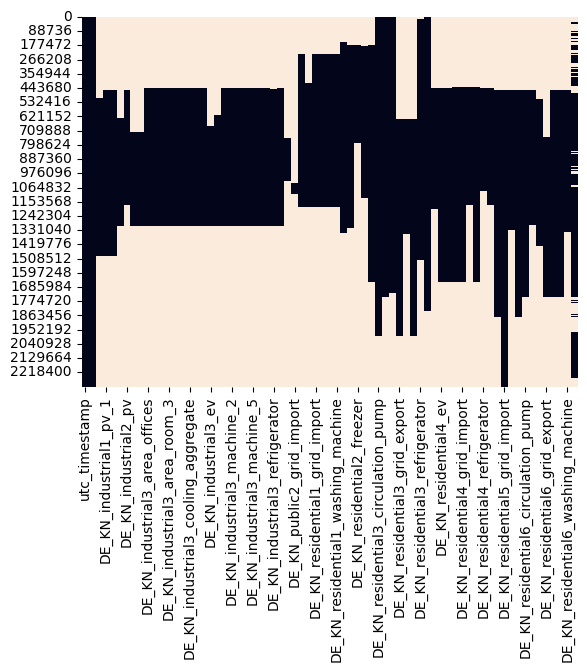

In [9]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [11]:
(df.isnull().mean() * 100).sort_values(ascending=False)

DE_KN_public2_grid_import              97.080229
DE_KN_public1_grid_import              88.170253
DE_KN_industrial2_storage_charge       74.638437
DE_KN_industrial2_storage_decharge     74.638437
DE_KN_residential2_freezer             73.344103
                                         ...    
DE_KN_residential3_washing_machine     20.563487
DE_KN_residential5_grid_import         19.893608
DE_KN_residential3_circulation_pump    13.634108
cet_cest_timestamp                      0.000000
utc_timestamp                           0.000000
Length: 71, dtype: float64

In [15]:
# Step 1: Interprate missing values ONLY on numeric columns
df1 = df.copy()

numeric_cols = df1.select_dtypes(include='number').columns
df1[numeric_cols] = df1[numeric_cols].interpolate(method='linear', axis=0, limit_direction='both')

# Step 2: Forward-filling any remaining NaNs
df1 = df1.ffill(axis=0)

# Step 3: Backward-filling any remaining NaNs
df1 = df1.bfill(axis=0)

# Step 4: Fill remaining NaNs (if any) with zero
df1 = df1.fillna(0)

# Optional: Removing 'interpolated' column if it exists
if 'interpolated' in df1.columns:
    df1 = df1.drop(columns=['interpolated'])
df1.infer_objects(copy=False)
# Cleaning, modern CSS styling with horizontal scrolling
styles = """
<style>
    .dataframe-container {
        overflow-x: auto;
        padding: 10px 0;
    }
    table {
        border-collapse: collapse;
        width: max-content;
        min-width: 100%;
        font-family: 'Arial', sans-serif;
        font-size: 16px;
        border-radius: 8px;
        overflow: hidden;
        box-shadow: 0 4px 20px rgba(0,0,0,0.05);
        margin-top: 20px;
        table-layout: auto;
        word-wrap: break-word;
    }
    th, td {
        border: 1px solid #ddd;
        text-align: left;
        padding: 14px 20px;
        line-height: 1.5;
        vertical-align: middle;
    }
    th {
        background-color: #4CAF50;
        color: white;
        font-size: 16px;
        font-weight: bold;
    }
    tr:nth-child(even) {
        background-color: #f9f9f9;
    }
    tr:hover {
        background-color: #f1faff;
    }
</style>
"""

# Converting DataFrame to HTML
html_table = df1.head(5).to_html(index=False, escape=False)

# Wraping the table in a div with horizontal scrolling
html_output = f"""
<div class="dataframe-container">
    {html_table}
</div>
"""

# Displaying styled, scrollable table
display(HTML(styles + html_output))

In [7]:
# Industrial columns
industrial_cols = [col for col in df1.columns if 'industrial' in col]

# Residential columns
residential_cols = [col for col in df1.columns if 'residential' in col]

# Keep timestamps too if you want to align them later
timestamps = ['utc_timestamp', 'cet_cest_timestamp']

# Creating separate DataFrames
industrial_df = df1[timestamps + industrial_cols]
residential_df = df1[timestamps + residential_cols]

# Previewing
display(industrial_df.head())
display(residential_df.head())

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:59:00Z  2014-12-11T18:59:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T18:01:00Z  2014-12-11T19:01:00+0100   
3  2014-12-11T18:02:00Z  2014-12-11T19:02:00+0100   
4  2014-12-11T18:03:00Z  2014-12-11T19:03:00+0100   

   DE_KN_industrial1_grid_import  DE_KN_industrial1_pv_1  \
0                           0.25                   0.003   
1                           0.25                   0.003   
2                           0.25                   0.003   
3                           0.25                   0.003   
4                           0.25                   0.003   

   DE_KN_industrial1_pv_2  DE_KN_industrial2_grid_import  \
0                   0.003                          0.026   
1                   0.003                          0.026   
2                   0.003                          0.026   
3                   0.003                          0.026   
4                   0.003                          0.026   

   DE_KN_industrial2_pv  DE_KN_industrial2_storage_charge  \
0                  0.01                               0.0   
1                  0.01                               0.0   
2                  0.01                               0.0   
3                  0.01                               0.0   
4                  0.01                               0.0   

   DE_KN_industrial2_storage_decharge  DE_KN_industrial3_area_offices  ...  \
0                                 0.0                           1.838  ...   
1                                 0.0                           1.838  ...   
2                                 0.0                           1.838  ...   
3                                 0.0                           1.838  ...   
4                                 0.0                           1.838  ...   

   DE_KN_industrial3_grid_import  DE_KN_industrial3_machine_1  \
0                           1.75                       15.406   
1                           1.75                       15.406   
2                           1.75                       15.406   
3                           1.75                       15.406   
4                           1.75                       15.406   

   DE_KN_industrial3_machine_2  DE_KN_industrial3_machine_3  \
0                        8.234                        8.375   
1                        8.234                        8.375   
2                        8.234                        8.375   
3                        8.234                        8.375   
4                        8.234                        8.375   

   DE_KN_industrial3_machine_4  DE_KN_industrial3_machine_5  \
0                          0.0                        0.003   
1                          0.0                        0.003   
2                          0.0                        0.003   
3                          0.0                        0.003   
4                          0.0                        0.003   

   DE_KN_industrial3_pv_facade  DE_KN_industrial3_pv_roof  \
0                        0.039                      0.201   
1                        0.039                      0.201   
2                        0.039                      0.201   
3                        0.039                      0.201   
4                        0.039                      0.201   

   DE_KN_industrial3_refrigerator  DE_KN_industrial3_ventilation  
0                             0.0                         11.547  
1                             0.0                         11.547  
2                             0.0                         11.547  
3                             0.0                         11.547  
4                             0.0                         11.547  

[5 rows x 29 columns]

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:59:00Z  2014-12-11T18:59:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T18:01:00Z  2014-12-11T19:01:00+0100   
3  2014-12-11T18:02:00Z  2014-12-11T19:02:00+0100   
4  2014-12-11T18:03:00Z  2014-12-11T19:03:00+0100   

   DE_KN_residential1_dishwasher  DE_KN_residential1_freezer  \
0                            0.0                       0.001   
1                            0.0                       0.001   
2                            0.0                       0.001   
3                            0.0                       0.001   
4                            0.0                       0.001   

   DE_KN_residential1_grid_import  DE_KN_residential1_heat_pump  \
0                           0.003                           0.0   
1                           0.003                           0.0   
2                           0.003                           0.0   
3                           0.003                           0.0   
4                           0.003                           0.0   

   DE_KN_residential1_pv  DE_KN_residential1_washing_machine  \
0                   0.01                                 0.0   
1                   0.01                                 0.0   
2                   0.01                                 0.0   
3                   0.01                                 0.0   
4                   0.01                                 0.0   

   DE_KN_residential2_circulation_pump  DE_KN_residential2_dishwasher  ...  \
0                                0.001                            0.0  ...   
1                                0.001                            0.0  ...   
2                                0.001                            0.0  ...   
3                                0.001                            0.0  ...   
4                                0.001                            0.0  ...   

   DE_KN_residential5_grid_import  DE_KN_residential5_refrigerator  \
0                           0.003                              0.0   
1                           0.003                              0.0   
2                           0.003                              0.0   
3                           0.003                              0.0   
4                           0.003                              0.0   

   DE_KN_residential5_washing_machine  DE_KN_residential6_circulation_pump  \
0                                 0.0                                0.031   
1                                 0.0                                0.031   
2                                 0.0                                0.031   
3                                 0.0                                0.031   
4                                 0.0                                0.031   

   DE_KN_residential6_dishwasher  DE_KN_residential6_freezer  \
0                            0.0                       0.001   
1                            0.0                       0.001   
2                            0.0                       0.001   
3                            0.0                       0.001   
4                            0.0                       0.001   

   DE_KN_residential6_grid_export  DE_KN_residential6_grid_import  \
0                           0.005                            0.91   
1                           0.005                            0.91   
2                           0.005                            0.91   
3                           0.005                            0.91   
4                           0.005                            0.91   

   DE_KN_residential6_pv  DE_KN_residential6_washing_machine  
0                    0.0                                 0.0  
1                    0.0                                 0.0  
2                    0.0                                 0.0  
3                    0.0                                 0.0  
4                    0.0                    

In [8]:
# Industrial 1 columns
industrial1_cols = [col for col in industrial_df.columns if 'industrial1' in col]

# Industrial 2 columns
industrial2_cols = [col for col in industrial_df.columns if 'industrial2' in col]

# Industrial 3 columns
industrial3_cols = [col for col in industrial_df.columns if 'industrial3' in col]

# Timestamps to retain in each
timestamps = ['utc_timestamp', 'cet_cest_timestamp']

# Createing separate DataFrames
industrial1_df = industrial_df[timestamps + industrial1_cols]
industrial2_df = industrial_df[timestamps + industrial2_cols]
industrial3_df = industrial_df[timestamps + industrial3_cols]

# Quick previews
display(industrial1_df.head())
display(industrial2_df.head())
display(industrial3_df.head())

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:59:00Z  2014-12-11T18:59:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T18:01:00Z  2014-12-11T19:01:00+0100   
3  2014-12-11T18:02:00Z  2014-12-11T19:02:00+0100   
4  2014-12-11T18:03:00Z  2014-12-11T19:03:00+0100   

   DE_KN_industrial1_grid_import  DE_KN_industrial1_pv_1  \
0                           0.25                   0.003   
1                           0.25                   0.003   
2                           0.25                   0.003   
3                           0.25                   0.003   
4                           0.25                   0.003   

   DE_KN_industrial1_pv_2  
0                   0.003  
1                   0.003  
2                   0.003  
3                   0.003  
4                   0.003

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:59:00Z  2014-12-11T18:59:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T18:01:00Z  2014-12-11T19:01:00+0100   
3  2014-12-11T18:02:00Z  2014-12-11T19:02:00+0100   
4  2014-12-11T18:03:00Z  2014-12-11T19:03:00+0100   

   DE_KN_industrial2_grid_import  DE_KN_industrial2_pv  \
0                          0.026                  0.01   
1                          0.026                  0.01   
2                          0.026                  0.01   
3                          0.026                  0.01   
4                          0.026                  0.01   

   DE_KN_industrial2_storage_charge  DE_KN_industrial2_storage_decharge  
0                               0.0                                 0.0  
1                               0.0                                 0.0  
2                               0.0                                 0.0  
3                               0.0                                 0.0  
4                               0.0                                 0.0

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:59:00Z  2014-12-11T18:59:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T18:01:00Z  2014-12-11T19:01:00+0100   
3  2014-12-11T18:02:00Z  2014-12-11T19:02:00+0100   
4  2014-12-11T18:03:00Z  2014-12-11T19:03:00+0100   

   DE_KN_industrial3_area_offices  DE_KN_industrial3_area_room_1  \
0                           1.838                           0.56   
1                           1.838                           0.56   
2                           1.838                           0.56   
3                           1.838                           0.56   
4                           1.838                           0.56   

   DE_KN_industrial3_area_room_2  DE_KN_industrial3_area_room_3  \
0                          1.503                          0.012   
1                          1.503                          0.012   
2                          1.503                          0.012   
3                          1.503                          0.012   
4                          1.503                          0.012   

   DE_KN_industrial3_area_room_4  DE_KN_industrial3_compressor  \
0                          0.215                         4.492   
1                          0.215                         4.492   
2                          0.215                         4.492   
3                          0.215                         4.492   
4                          0.215                         4.492   

   DE_KN_industrial3_cooling_aggregate  DE_KN_industrial3_cooling_pumps  ...  \
0                                0.094                             7.25  ...   
1                                0.094                             7.25  ...   
2                                0.094                             7.25  ...   
3                                0.094                             7.25  ...   
4                                0.094                             7.25  ...   

   DE_KN_industrial3_grid_import  DE_KN_industrial3_machine_1  \
0                           1.75                       15.406   
1                           1.75                       15.406   
2                           1.75                       15.406   
3                           1.75                       15.406   
4                           1.75                       15.406   

   DE_KN_industrial3_machine_2  DE_KN_industrial3_machine_3  \
0                        8.234                        8.375   
1                        8.234                        8.375   
2                        8.234                        8.375   
3                        8.234                        8.375   
4                        8.234                        8.375   

   DE_KN_industrial3_machine_4  DE_KN_industrial3_machine_5  \
0                          0.0                        0.003   
1                          0.0                        0.003   
2                          0.0                        0.003   
3                          0.0                        0.003   
4                          0.0                        0.003   

   DE_KN_industrial3_pv_facade  DE_KN_industrial3_pv_roof  \
0                        0.039                      0.201   
1                        0.039                      0.201   
2                        0.039                      0.201   
3                        0.039                      0.201   
4                        0.039                      0.201   

   DE_KN_industrial3_refrigerator  DE_KN_industrial3_ventilation  
0                             0.0                         11.547  
1                             0.0                         11.547  
2                             0.0                         11.547  
3                             0.0                         11.547  
4                             0.0                         11.547  

[5 rows x 22 columns]

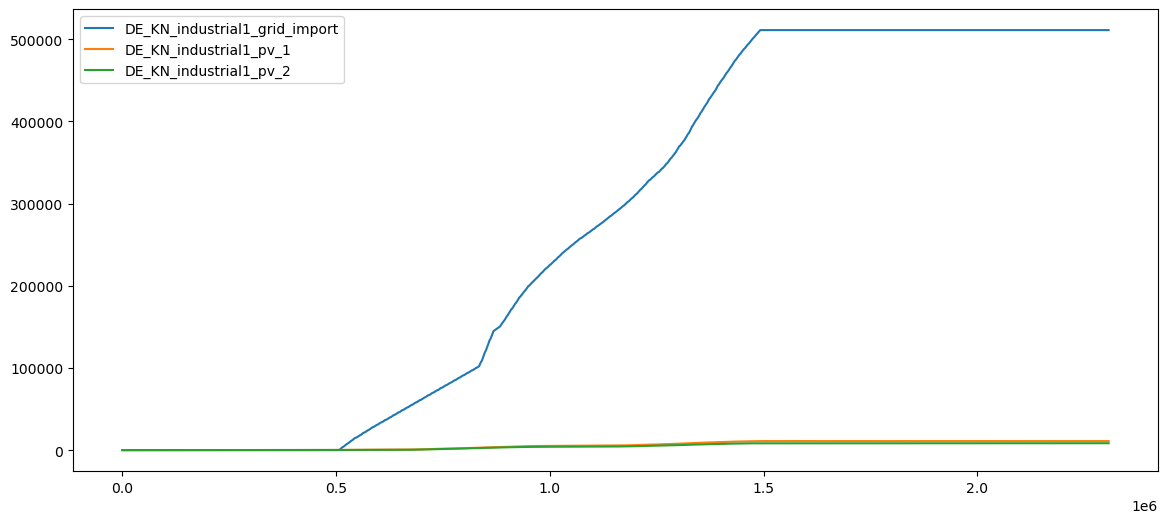

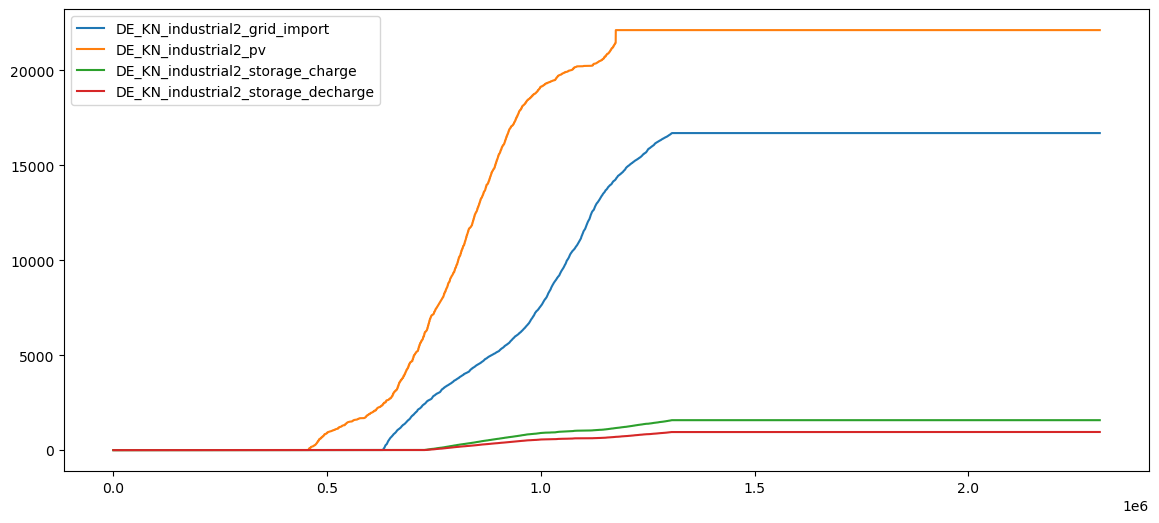

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


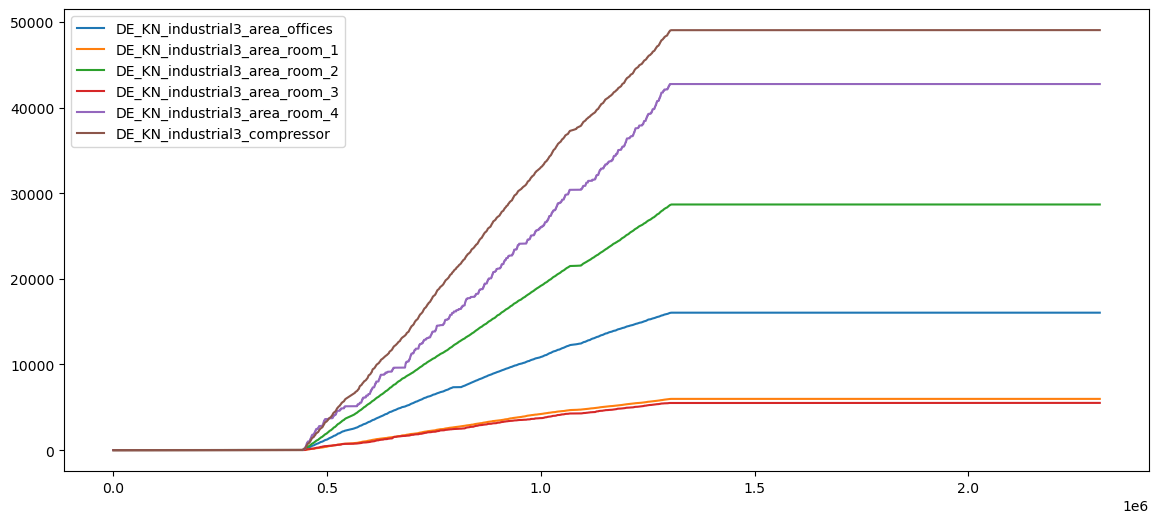

In [9]:
## Using Matplotlib Vectorized Plotting (without melt) as data is too big to get normal plot
plt.figure(figsize=(14, 6))
for col in industrial1_df.columns[2:8]:
    plt.plot(industrial1_df.index, industrial1_df[col], label=col)
plt.legend()
plt.show()


plt.figure(figsize=(14, 6))
for col in industrial2_df.columns[2:8]:
    plt.plot(industrial2_df.index, industrial2_df[col], label=col)
plt.legend()
plt.show()


plt.figure(figsize=(14, 6))
for col in industrial3_df.columns[2:8]:
    plt.plot(industrial3_df.index, industrial3_df[col], label=col)
plt.legend()
plt.show()

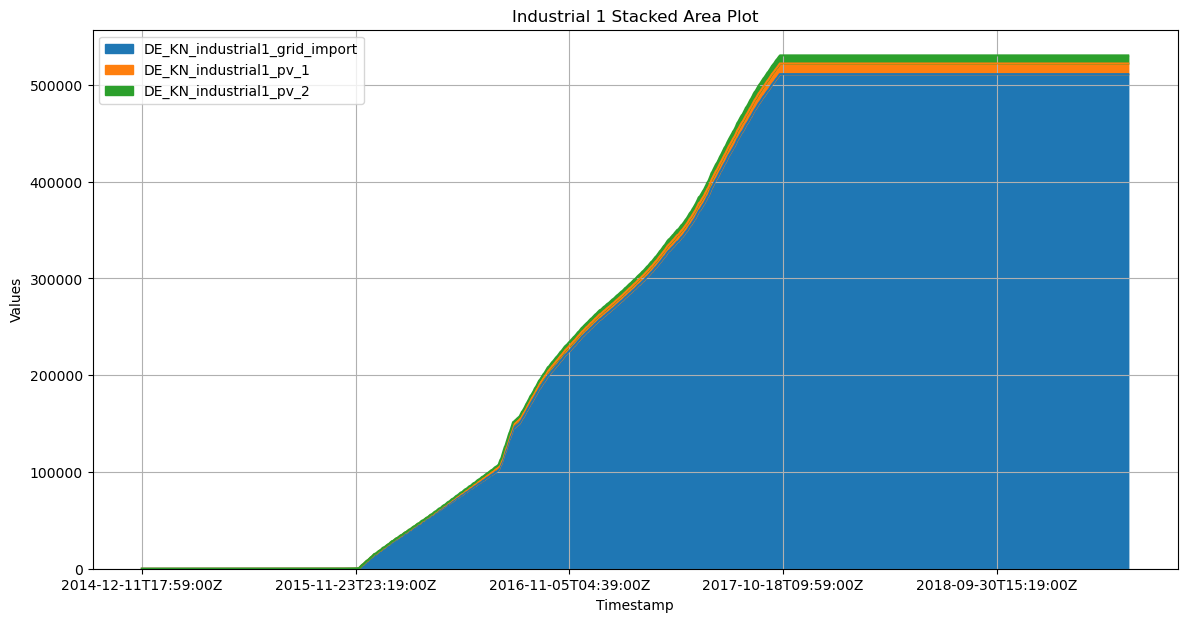

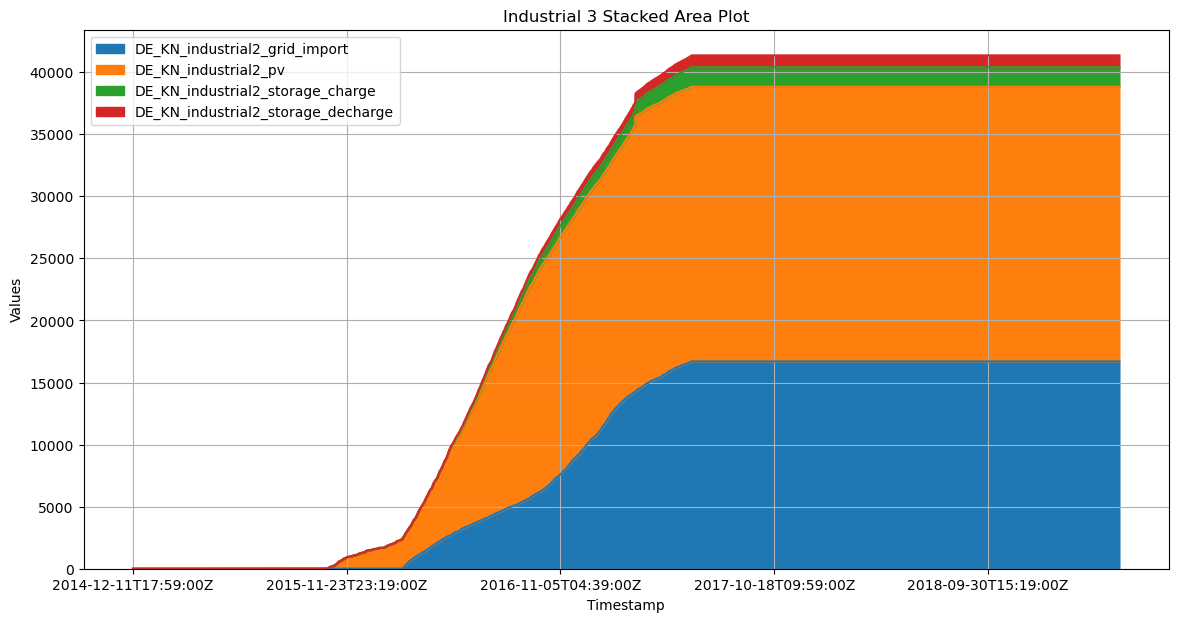

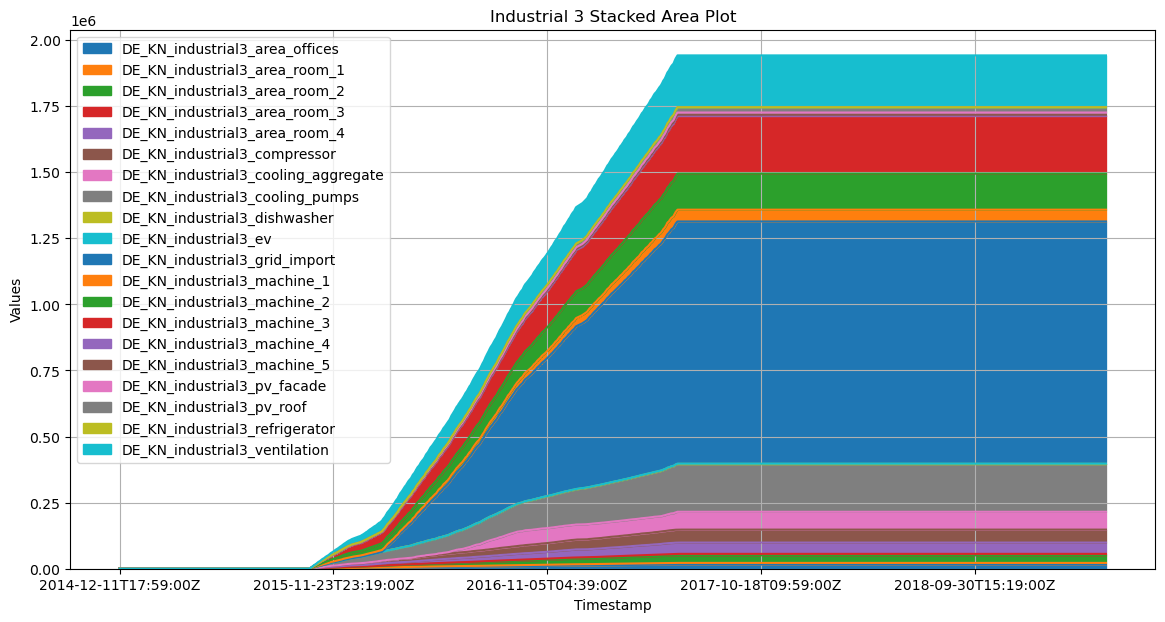

In [10]:
industrial1_df.set_index('utc_timestamp')[industrial1_df.columns[2:]].plot.area(stacked=True, figsize=(14,7))
plt.title('Industrial 1 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

industrial2_df.set_index('utc_timestamp')[industrial2_df.columns[2:]].plot.area(stacked=True, figsize=(14,7))
plt.title('Industrial 3 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

industrial3_df.set_index('utc_timestamp')[industrial3_df.columns[2:]].plot.area(stacked=True, figsize=(14,7))
plt.title('Industrial 3 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()


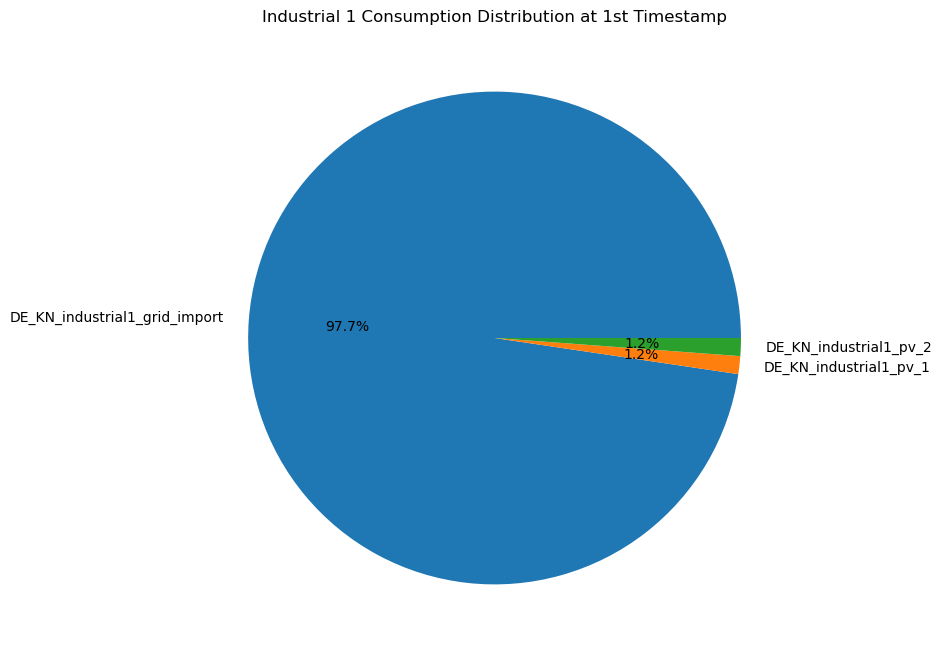

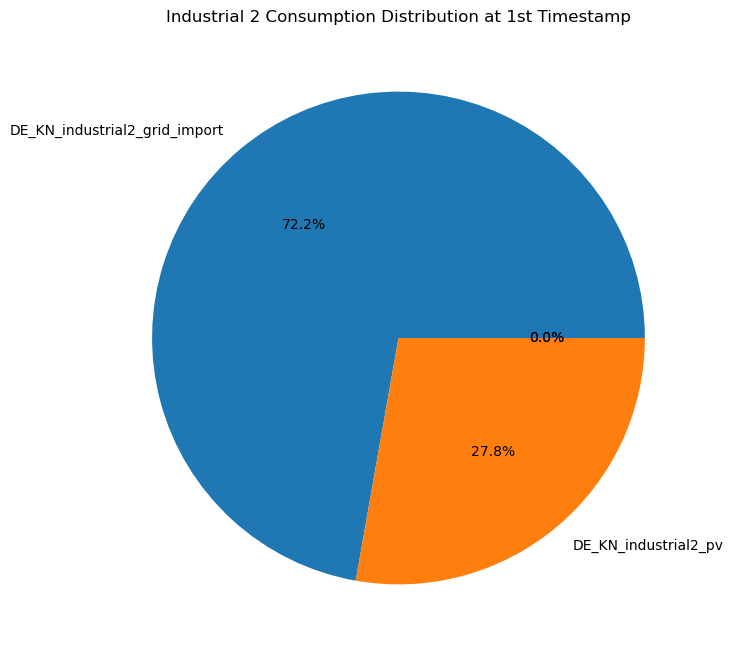

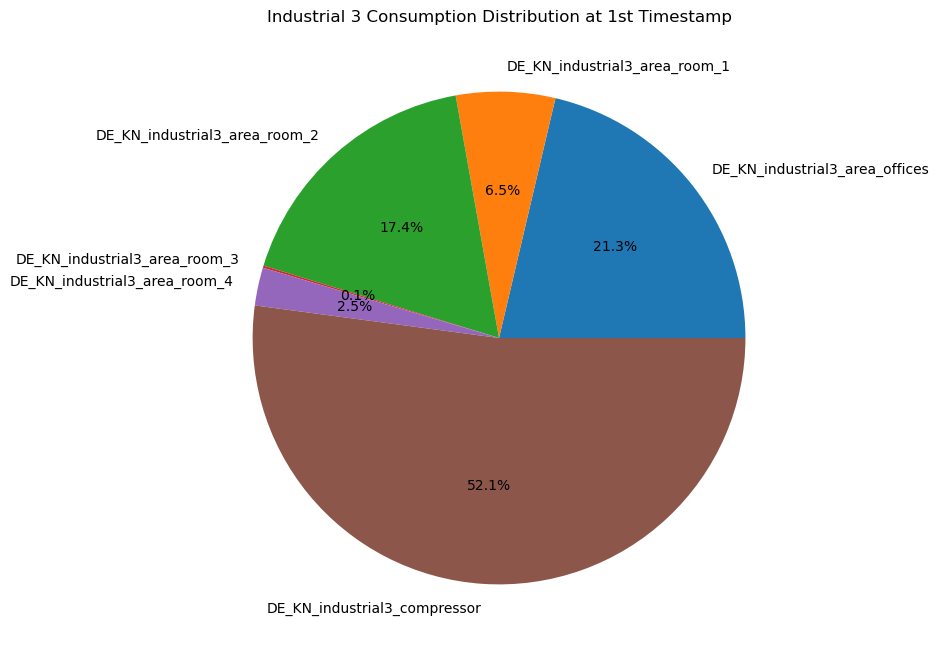

In [11]:
industrial1_df.iloc[0, 2:8] = pd.to_numeric(industrial1_df.iloc[0, 2:8], errors='coerce')
industrial1_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Industrial 1 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()


industrial2_df.iloc[0, 2:8] = pd.to_numeric(industrial2_df.iloc[0, 2:8], errors='coerce')
industrial2_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Industrial 2 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()

industrial3_df.iloc[0, 2:8] = pd.to_numeric(industrial3_df.iloc[0, 2:8], errors='coerce')
industrial3_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Industrial 3 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()


In [12]:
# --------------- Pre-existing Industrial Columns Extraction ---------------
industrial1_cols = [col for col in industrial_df.columns if 'industrial1' in col]
industrial2_cols = [col for col in industrial_df.columns if 'industrial2' in col]
industrial3_cols = [col for col in industrial_df.columns if 'industrial3' in col]

timestamps = ['utc_timestamp', 'cet_cest_timestamp']

# Separateing DataFrames for each industry
industrial1_df = industrial_df[timestamps + industrial1_cols].copy()
industrial2_df = industrial_df[timestamps + industrial2_cols].copy()
industrial3_df = industrial_df[timestamps + industrial3_cols].copy()

# --------------- Ensureing 'utc_timestamp' is datetime (safe with errors='coerce') ---------------
for df in [industrial1_df, industrial2_df, industrial3_df]:
    df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'], errors='coerce')

# --------------- Adding 'hour', 'day', 'month' Columns ---------------
for df in [industrial1_df, industrial2_df, industrial3_df]:
    df['hour'] = df['utc_timestamp'].dt.hour
    df['day'] = df['utc_timestamp'].dt.date
    df['month'] = df['utc_timestamp'].dt.month

# --------------- Groupping by Hourly, Daily, Monthly for each industry ---------------
# Industrial 1
industrial1_hourly = industrial1_df.groupby('hour')[industrial1_cols].mean()
industrial1_daily  = industrial1_df.groupby('day')[industrial1_cols].mean()
industrial1_monthly= industrial1_df.groupby('month')[industrial1_cols].mean()

# Industrial 2
industrial2_hourly = industrial2_df.groupby('hour')[industrial2_cols].mean()
industrial2_daily  = industrial2_df.groupby('day')[industrial2_cols].mean()
industrial2_monthly= industrial2_df.groupby('month')[industrial2_cols].mean()

# Industrial 3
industrial3_hourly = industrial3_df.groupby('hour')[industrial3_cols].mean()
industrial3_daily  = industrial3_df.groupby('day')[industrial3_cols].mean()
industrial3_monthly= industrial3_df.groupby('month')[industrial3_cols].mean()

# --------------- Displaying Results ---------------
print("Hourly Analysis for Industrial 1")
display(industrial1_hourly.head())

print("Hourly Analysis for Industrial 2")
display(industrial2_hourly.head())

print("Hourly Analysis for Industrial 3")
display(industrial3_hourly.head())

print("Daily Analysis for Industrial 1")
display(industrial1_daily.head())

print("Daily Analysis for Industrial 2")
display(industrial2_daily.head())

print("Daily Analysis for Industrial 3")
display(industrial3_daily.head())

print("Monthly Analysis for Industrial 1")
display(industrial1_monthly.head())

print("Monthly Analysis for Industrial 2")
display(industrial2_monthly.head())

print("Monthly Analysis for Industrial 3")
display(industrial3_monthly.head())

Hourly Analysis for Industrial 1


DE_KN_industrial1_grid_import  DE_KN_industrial1_pv_1  \
hour                                                          
0                     275145.625098             5916.419539   
1                     275157.162935             5916.419539   
2                     275166.653313             5916.419539   
3                     275175.696314             5916.419549   
4                     275184.538659             5916.422610   

      DE_KN_industrial1_pv_2  
hour                          
0                4551.651002  
1                4551.651002  
2                4551.651002  
3                4551.651002  
4                4551.651148

Hourly Analysis for Industrial 2


DE_KN_industrial2_grid_import  DE_KN_industrial2_pv  \
hour                                                        
0                       9585.223524          14200.839034   
1                       9585.721728          14200.839034   
2                       9586.217610          14200.839034   
3                       9586.710856          14200.839107   
4                       9587.203231          14200.847173   

      DE_KN_industrial2_storage_charge  DE_KN_industrial2_storage_decharge  
hour                                                                        
0                           893.067769                          541.694862  
1                           893.072924                          541.697064  
2                           893.078088                          541.698090  
3                           893.083206                          541.698195  
4                           893.088290                          541.698200

Hourly Analysis for Industrial 3


DE_KN_industrial3_area_offices  DE_KN_industrial3_area_room_1  \
hour                                                                  
0                       10138.465360                    3772.851737   
1                       10138.679834                    3772.915028   
2                       10138.898790                    3772.978448   
3                       10139.116733                    3773.041820   
4                       10139.351510                    3773.104843   

      DE_KN_industrial3_area_room_2  DE_KN_industrial3_area_room_3  \
hour                                                                 
0                      17924.751536                    3474.834147   
1                      17925.237657                    3474.848701   
2                      17925.723815                    3474.863268   
3                      17926.207062                    3474.877820   
4                      17926.684199                    3474.892402   

      DE_KN_industrial3_area_room_4  DE_KN_industrial3_compressor  \
hour                                                                
0                      26129.759109                  30670.079496   
1                      26129.773518                  30670.826650   
2                      26129.787865                  30671.572468   
3                      26129.802097                  30672.314862   
4                      26129.816291                  30673.057297   

      DE_KN_industrial3_cooling_aggregate  DE_KN_industrial3_cooling_pumps  \
hour                                                                         
0                            40824.817872                    111791.867138   
1                            40825.758154                    111796.330313   
2                            40826.519680                    111800.739208   
3                            40827.148715                    111805.109792   
4                            40827.697975                    111809.453839   

      DE_KN_industrial3_dishwasher  DE_KN_industrial3_ev  \
hour                                                       
0                       550.827236            569.136045   
1                       550.827293            569.143410   
2                       550.827348            569.147080   
3                       550.827407            569.148843   
4                       550.827472            569.148992   

      DE_KN_industrial3_grid_import  DE_KN_industrial3_machine_1  \
hour                                                               
0                     535273.358160                 27103.749242   
1                     535291.560054                 27103.844139   
2                     535309.535566                 27103.939076   
3                     535327.336330                 27104.037177   
4                     535345.072034                 27104.167437   

      DE_KN_industrial3_machine_2  DE_KN_industrial3_machine_3  \
hour                                                             
0                    84741.021333                134440.278329   
1                    84744.452369                134445.804893   
2                    84747.883279                134451.330354   
3                    84751.312937                134456.852999   
4                    84754.738370                134462.371841   

      DE_KN_industrial3_machine_4  DE_KN_industrial3_machine_5  \
hour                                                             
0                      287.775376                  2812.980362   
1                      287.785134                  2813.069214   
2                      287.792313                  2813.158035   
3                      287.796949                  2813.246728   
4                      287.800685                  2813.335190   

      DE_KN_industrial3_pv_facade  DE_KN_industrial3_pv_roof  \
hour                                                           
0                     5090.787680 

Daily Analysis for Industrial 1


DE_KN_industrial1_grid_import  DE_KN_industrial1_pv_1  \
day                                                                 
2014-12-11                           0.25                   0.003   
2014-12-12                           0.25                   0.003   
2014-12-13                           0.25                   0.003   
2014-12-14                           0.25                   0.003   
2014-12-15                           0.25                   0.003   

            DE_KN_industrial1_pv_2  
day                                 
2014-12-11                   0.003  
2014-12-12                   0.003  
2014-12-13                   0.003  
2014-12-14                   0.003  
2014-12-15                   0.003

Daily Analysis for Industrial 2


DE_KN_industrial2_grid_import  DE_KN_industrial2_pv  \
day                                                               
2014-12-11                          0.026                  0.01   
2014-12-12                          0.026                  0.01   
2014-12-13                          0.026                  0.01   
2014-12-14                          0.026                  0.01   
2014-12-15                          0.026                  0.01   

            DE_KN_industrial2_storage_charge  \
day                                            
2014-12-11                               0.0   
2014-12-12                               0.0   
2014-12-13                               0.0   
2014-12-14                               0.0   
2014-12-15                               0.0   

            DE_KN_industrial2_storage_decharge  
day                                             
2014-12-11                                 0.0  
2014-12-12                                 0.0  
2014-12-13                                 0.0  
2014-12-14                                 0.0  
2014-12-15                                 0.0

Daily Analysis for Industrial 3


DE_KN_industrial3_area_offices  DE_KN_industrial3_area_room_1  \
day                                                                         
2014-12-11                           1.838                           0.56   
2014-12-12                           1.838                           0.56   
2014-12-13                           1.838                           0.56   
2014-12-14                           1.838                           0.56   
2014-12-15                           1.838                           0.56   

            DE_KN_industrial3_area_room_2  DE_KN_industrial3_area_room_3  \
day                                                                        
2014-12-11                          1.503                          0.012   
2014-12-12                          1.503                          0.012   
2014-12-13                          1.503                          0.012   
2014-12-14                          1.503                          0.012   
2014-12-15                          1.503                          0.012   

            DE_KN_industrial3_area_room_4  DE_KN_industrial3_compressor  \
day                                                                       
2014-12-11                          0.215                         4.492   
2014-12-12                          0.215                         4.492   
2014-12-13                          0.215                         4.492   
2014-12-14                          0.215                         4.492   
2014-12-15                          0.215                         4.492   

            DE_KN_industrial3_cooling_aggregate  \
day                                               
2014-12-11                                0.094   
2014-12-12                                0.094   
2014-12-13                                0.094   
2014-12-14                                0.094   
2014-12-15                                0.094   

            DE_KN_industrial3_cooling_pumps  DE_KN_industrial3_dishwasher  \
day                                                                         
2014-12-11                             7.25                          0.03   
2014-12-12                             7.25                          0.03   
2014-12-13                             7.25                          0.03   
2014-12-14                             7.25                          0.03   
2014-12-15                             7.25                          0.03   

            DE_KN_industrial3_ev  DE_KN_industrial3_grid_import  \
day                                                               
2014-12-11                   0.0                           1.75   
2014-12-12                   0.0                           1.75   
2014-12-13                   0.0                           1.75   
2014-12-14                   0.0                           1.75   
2014-12-15                   0.0                           1.75   

            DE_KN_industrial3_machine_1  DE_KN_industrial3_machine_2  \
day                                                                    
2014-12-11                       15.406                        8.234   
2014-12-12                       15.406                        8.234   
2014-12-13                       15.406                        8.234   
2014-12-14                       15.406                        8.234   
2014-12-15                       15.406                        8.234   

            DE_KN_industrial3_machine_3  DE_KN_industrial3_machine_4  \
day                                                                    
2014-12-11                        8.375                          0.0   
2014-12-12                        8.375                          0.0   
2014-12-13                        8.375                          0.0   
2014-12-14                        8.375                          0.0   
2014-12-15                        8.375                          0.0   

            DE_KN_industrial3_machi

Monthly Analysis for Industrial 1


DE_KN_industrial1_grid_import  DE_KN_industrial1_pv_1  \
month                                                          
1                      263375.926470             5563.620815   
2                      267747.023771             5570.201255   
3                      275689.363772             5714.655955   
4                      282864.466865             5944.240452   
5                      236939.694191             5062.332891   

       DE_KN_industrial1_pv_2  
month                          
1                 4259.273870  
2                 4262.649544  
3                 4367.759367  
4                 4541.615744  
5                 3890.007457

Monthly Analysis for Industrial 2


DE_KN_industrial2_grid_import  DE_KN_industrial2_pv  \
month                                                        
1                        9025.908942          13231.502782   
2                        9324.947813          13356.376527   
3                        9802.177201          13907.615041   
4                       10171.362545          14303.192156   
5                        9017.921886          12946.541792   

       DE_KN_industrial2_storage_charge  DE_KN_industrial2_storage_decharge  
month                                                                        
1                            836.880753                          506.751563  
2                            841.855082                          508.683312  
3                            870.911259                          526.158588  
4                            898.801163                          543.337992  
5                            788.096466                          476.325164

Monthly Analysis for Industrial 3


DE_KN_industrial3_area_offices  DE_KN_industrial3_area_room_1  \
month                                                                  
1                         9523.311419                    3536.970063   
2                         9838.168848                    3643.445469   
3                        10216.379326                    3767.279064   
4                        10527.009863                    3890.383135   
5                         9591.420868                    3542.696837   

       DE_KN_industrial3_area_room_2  DE_KN_industrial3_area_room_3  \
month                                                                 
1                       16792.999947                    3239.798689   
2                       17298.183207                    3341.681204   
3                       17985.873258                    3484.425714   
4                       18576.790150                    3593.980784   
5                       16875.623027                    3283.265328   

       DE_KN_industrial3_area_room_4  DE_KN_industrial3_compressor  \
month                                                                
1                       24425.355447                  28802.816850   
2                       25194.709941                  29622.140251   
3                       26074.967421                  30639.947723   
4                       27019.790747                  31639.182665   
5                       24544.031268                  28794.510248   

       DE_KN_industrial3_cooling_aggregate  DE_KN_industrial3_cooling_pumps  \
month                                                                         
1                             38531.484821                    105338.317237   
2                             38323.903333                    107944.641768   
3                             38678.561846                    111700.638602   
4                             39182.340173                    115225.785541   
5                             33485.210774                    104131.085192   

       DE_KN_industrial3_dishwasher  DE_KN_industrial3_ev  \
month                                                       
1                        516.772053            536.070600   
2                        532.892779            532.268681   
3                        554.166521            540.012591   
4                        572.774228            567.893459   
5                        519.845337            510.843252   

       DE_KN_industrial3_grid_import  DE_KN_industrial3_machine_1  \
month                                                               
1                      496401.487299                 25388.678867   
2                      506430.888010                 25987.251723   
3                      531142.563671                 26820.727364   
4                      553562.553437                 27940.463098   
5                      494349.970472                 25395.988813   

       DE_KN_industrial3_machine_2  DE_KN_industrial3_machine_3  \
month                                                             
1                     79355.888200                126585.586579   
2                     81744.037244                130128.894006   
3                     84946.612712                135224.723291   
4                     87801.176657                139861.433592   
5                     79565.571893                126345.376931   

       DE_KN_industrial3_machine_4  DE_KN_industrial3_machine_5  \
month                                                             
1                       268.140898                  2670.571045   
2                       278.554277                  2728.282282   
3                       294.399263                  2787.879780   
4                       305.182146                  2842.505516   
5                       274.780561                  2609.707473   

       DE_KN_industrial3_pv_facade  DE_KN_industrial3_pv_roof  \
month                                     

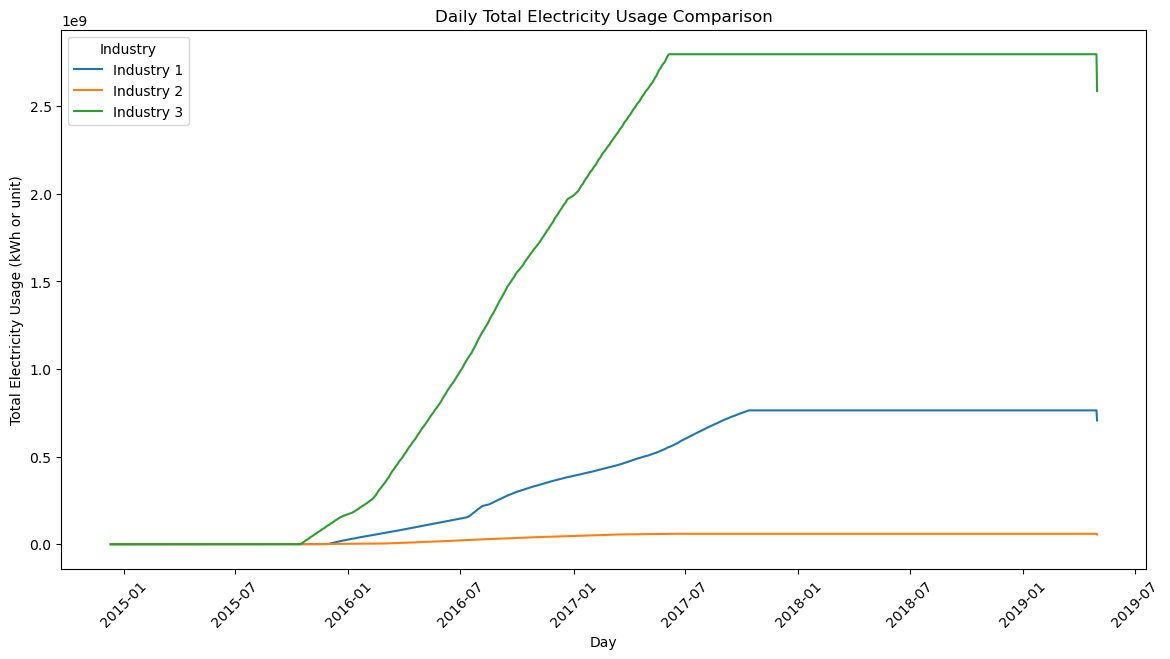

In [13]:
# Industry 1 total usage per record
industrial1_df.loc[:, 'total_usage'] = industrial1_df[['DE_KN_industrial1_grid_import', 'DE_KN_industrial1_pv_1', 'DE_KN_industrial1_pv_2']].sum(axis=1)

# Industry 2 total usage per record
industrial2_df.loc[:, 'total_usage'] = industrial2_df[['DE_KN_industrial2_grid_import', 'DE_KN_industrial2_pv', 'DE_KN_industrial2_storage_charge', 'DE_KN_industrial2_storage_decharge']].sum(axis=1)

# Industry 3 total usage per record
cols_industrial3 = [col for col in industrial3_df.columns if col.startswith('DE_KN_industrial3_')]
industrial3_df.loc[:, 'total_usage'] = industrial3_df[cols_industrial3].sum(axis=1)

# Grouping by 'day'
industrial1_daily = industrial1_df.groupby('day')['total_usage'].sum().reset_index().assign(industry='Industry 1')
industrial2_daily = industrial2_df.groupby('day')['total_usage'].sum().reset_index().assign(industry='Industry 2')
industrial3_daily = industrial3_df.groupby('day')['total_usage'].sum().reset_index().assign(industry='Industry 3')

# Combining them
daily_usage = pd.concat([industrial1_daily, industrial2_daily, industrial3_daily])

plt.figure(figsize=(14,7))
sns.lineplot(data=daily_usage, x='day', y='total_usage', hue='industry')
plt.title('Daily Total Electricity Usage Comparison')
plt.xlabel('Day')
plt.ylabel('Total Electricity Usage (kWh or unit)')
plt.xticks(rotation=45)
plt.legend(title='Industry')
plt.show()


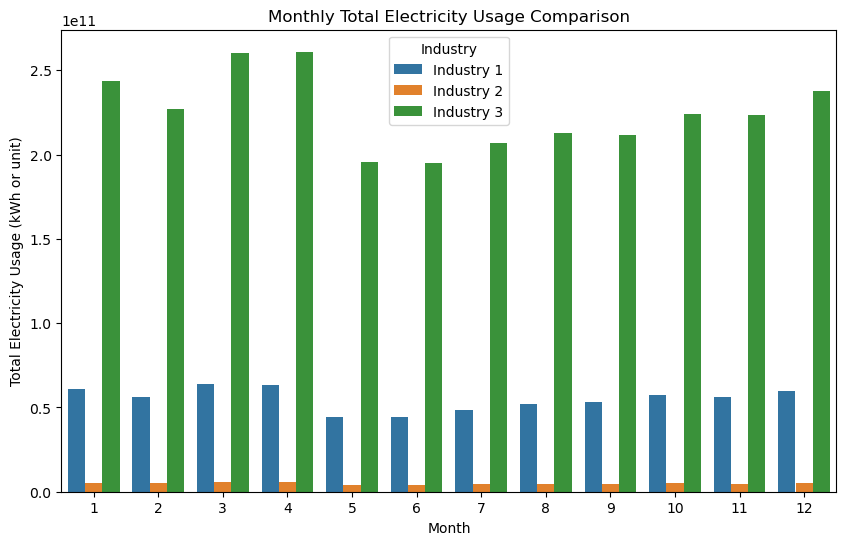

In [14]:
# Grouping by 'month'
industrial1_monthly = industrial1_df.groupby('month')['total_usage'].sum().reset_index().assign(industry='Industry 1')
industrial2_monthly = industrial2_df.groupby('month')['total_usage'].sum().reset_index().assign(industry='Industry 2')
industrial3_monthly = industrial3_df.groupby('month')['total_usage'].sum().reset_index().assign(industry='Industry 3')

# Combining
monthly_usage = pd.concat([industrial1_monthly, industrial2_monthly, industrial3_monthly])

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=monthly_usage, x='month', y='total_usage', hue='industry')
plt.title('Monthly Total Electricity Usage Comparison')
plt.xlabel('Month')
plt.ylabel('Total Electricity Usage (kWh or unit)')
plt.legend(title='Industry')
plt.show()


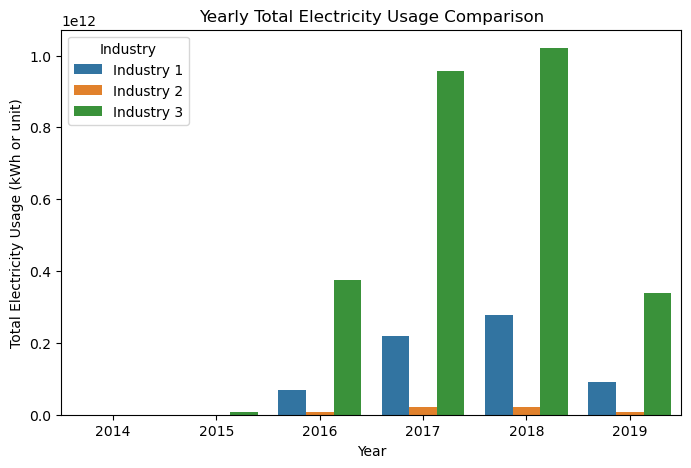

In [15]:
industrial1_df.loc[:, 'year'] = industrial1_df['utc_timestamp'].dt.year
industrial2_df.loc[:, 'year'] = industrial2_df['utc_timestamp'].dt.year
industrial3_df.loc[:, 'year'] = industrial3_df['utc_timestamp'].dt.year

industrial1_yearly = industrial1_df.groupby('year')['total_usage'].sum().reset_index().assign(industry='Industry 1')
industrial2_yearly = industrial2_df.groupby('year')['total_usage'].sum().reset_index().assign(industry='Industry 2')
industrial3_yearly = industrial3_df.groupby('year')['total_usage'].sum().reset_index().assign(industry='Industry 3')

# Combineing them
yearly_usage = pd.concat([industrial1_yearly, industrial2_yearly, industrial3_yearly])

plt.figure(figsize=(8,5))
sns.barplot(data=yearly_usage, x='year', y='total_usage', hue='industry')
plt.title('Yearly Total Electricity Usage Comparison')
plt.xlabel('Year')
plt.ylabel('Total Electricity Usage (kWh or unit)')
plt.legend(title='Industry')
plt.show()


In [16]:
# Industrial 1 columns
residential1_cols = [col for col in residential_df.columns if 'residential1' in col]

# Industrial 2 columns
residential2_cols = [col for col in residential_df.columns if 'residential2' in col]

# Industrial 3 columns
residential3_cols = [col for col in residential_df.columns if 'residential3' in col]
residential4_cols = [col for col in residential_df.columns if 'residential4' in col]
residential5_cols = [col for col in residential_df.columns if 'residential5' in col]
residential6_cols = [col for col in residential_df.columns if 'residential6' in col]


# Timestamps to retain in each
timestamps = ['utc_timestamp', 'cet_cest_timestamp']

# Creating separate DataFrames
residential1_df = residential_df[timestamps + residential1_cols]
residential2_df = residential_df[timestamps + residential2_cols]
residential3_df = residential_df[timestamps + residential3_cols]
residential4_df = residential_df[timestamps + residential4_cols]
residential5_df = residential_df[timestamps + residential5_cols]
residential6_df = residential_df[timestamps + residential6_cols]

# Quick previews
display(residential1_df.head())
display(residential2_df.head())
display(residential3_df.head())
display(residential4_df.head())
display(residential5_df.head())
display(residential6_df.head())

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:59:00Z  2014-12-11T18:59:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T18:01:00Z  2014-12-11T19:01:00+0100   
3  2014-12-11T18:02:00Z  2014-12-11T19:02:00+0100   
4  2014-12-11T18:03:00Z  2014-12-11T19:03:00+0100   

   DE_KN_residential1_dishwasher  DE_KN_residential1_freezer  \
0                            0.0                       0.001   
1                            0.0                       0.001   
2                            0.0                       0.001   
3                            0.0                       0.001   
4                            0.0                       0.001   

   DE_KN_residential1_grid_import  DE_KN_residential1_heat_pump  \
0                           0.003                           0.0   
1                           0.003                           0.0   
2                           0.003                           0.0   
3                           0.003                           0.0   
4                           0.003                           0.0   

   DE_KN_residential1_pv  DE_KN_residential1_washing_machine  
0                   0.01                                 0.0  
1                   0.01                                 0.0  
2                   0.01                                 0.0  
3                   0.01                                 0.0  
4                   0.01                                 0.0

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:59:00Z  2014-12-11T18:59:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T18:01:00Z  2014-12-11T19:01:00+0100   
3  2014-12-11T18:02:00Z  2014-12-11T19:02:00+0100   
4  2014-12-11T18:03:00Z  2014-12-11T19:03:00+0100   

   DE_KN_residential2_circulation_pump  DE_KN_residential2_dishwasher  \
0                                0.001                            0.0   
1                                0.001                            0.0   
2                                0.001                            0.0   
3                                0.001                            0.0   
4                                0.001                            0.0   

   DE_KN_residential2_freezer  DE_KN_residential2_grid_import  \
0                         0.0                             0.0   
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         0.0                             0.0   
4                         0.0                             0.0   

   DE_KN_residential2_washing_machine  
0                                 0.0  
1                                 0.0  
2                                 0.0  
3                                 0.0  
4                                 0.0

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:59:00Z  2014-12-11T18:59:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T18:01:00Z  2014-12-11T19:01:00+0100   
3  2014-12-11T18:02:00Z  2014-12-11T19:02:00+0100   
4  2014-12-11T18:03:00Z  2014-12-11T19:03:00+0100   

   DE_KN_residential3_circulation_pump  DE_KN_residential3_dishwasher  \
0                                  0.0                            0.0   
1                                  0.0                            0.0   
2                                  0.0                            0.0   
3                                  0.0                            0.0   
4                                  0.0                            0.0   

   DE_KN_residential3_freezer  DE_KN_residential3_grid_export  \
0                       0.002                             0.0   
1                       0.003                             0.0   
2                       0.006                             0.0   
3                       0.007                             0.0   
4                       0.008                             0.0   

   DE_KN_residential3_grid_import  DE_KN_residential3_pv  \
0                           0.007                    0.0   
1                           0.007                    0.0   
2                           0.007                    0.0   
3                           0.007                    0.0   
4                           0.007                    0.0   

   DE_KN_residential3_refrigerator  DE_KN_residential3_washing_machine  
0                              0.0                                 0.0  
1                              0.0                                 0.0  
2                              0.0                                 0.0  
3                              0.0                                 0.0  
4                              0.0                                 0.0

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:59:00Z  2014-12-11T18:59:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T18:01:00Z  2014-12-11T19:01:00+0100   
3  2014-12-11T18:02:00Z  2014-12-11T19:02:00+0100   
4  2014-12-11T18:03:00Z  2014-12-11T19:03:00+0100   

   DE_KN_residential4_dishwasher  DE_KN_residential4_ev  \
0                            0.0                  0.022   
1                            0.0                  0.022   
2                            0.0                  0.022   
3                            0.0                  0.022   
4                            0.0                  0.022   

   DE_KN_residential4_freezer  DE_KN_residential4_grid_export  \
0                         0.0                             0.0   
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         0.0                             0.0   
4                         0.0                             0.0   

   DE_KN_residential4_grid_import  DE_KN_residential4_heat_pump  \
0                           0.002                         0.002   
1                           0.002                         0.002   
2                           0.002                         0.002   
3                           0.002                         0.002   
4                           0.002                         0.002   

   DE_KN_residential4_pv  DE_KN_residential4_refrigerator  \
0                    0.0                              0.0   
1                    0.0                              0.0   
2                    0.0                              0.0   
3                    0.0                              0.0   
4                    0.0                              0.0   

   DE_KN_residential4_washing_machine  
0                                 0.0  
1                                 0.0  
2                                 0.0  
3                                 0.0  
4                                 0.0

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:59:00Z  2014-12-11T18:59:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T18:01:00Z  2014-12-11T19:01:00+0100   
3  2014-12-11T18:02:00Z  2014-12-11T19:02:00+0100   
4  2014-12-11T18:03:00Z  2014-12-11T19:03:00+0100   

   DE_KN_residential5_dishwasher  DE_KN_residential5_grid_import  \
0                            0.0                           0.003   
1                            0.0                           0.003   
2                            0.0                           0.003   
3                            0.0                           0.003   
4                            0.0                           0.003   

   DE_KN_residential5_refrigerator  DE_KN_residential5_washing_machine  
0                              0.0                                 0.0  
1                              0.0                                 0.0  
2                              0.0                                 0.0  
3                              0.0                                 0.0  
4                              0.0                                 0.0

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:59:00Z  2014-12-11T18:59:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T18:01:00Z  2014-12-11T19:01:00+0100   
3  2014-12-11T18:02:00Z  2014-12-11T19:02:00+0100   
4  2014-12-11T18:03:00Z  2014-12-11T19:03:00+0100   

   DE_KN_residential6_circulation_pump  DE_KN_residential6_dishwasher  \
0                                0.031                            0.0   
1                                0.031                            0.0   
2                                0.031                            0.0   
3                                0.031                            0.0   
4                                0.031                            0.0   

   DE_KN_residential6_freezer  DE_KN_residential6_grid_export  \
0                       0.001                           0.005   
1                       0.001                           0.005   
2                       0.001                           0.005   
3                       0.001                           0.005   
4                       0.001                           0.005   

   DE_KN_residential6_grid_import  DE_KN_residential6_pv  \
0                            0.91                    0.0   
1                            0.91                    0.0   
2                            0.91                    0.0   
3                            0.91                    0.0   
4                            0.91                    0.0   

   DE_KN_residential6_washing_machine  
0                                 0.0  
1                                 0.0  
2                                 0.0  
3                                 0.0  
4                                 0.0

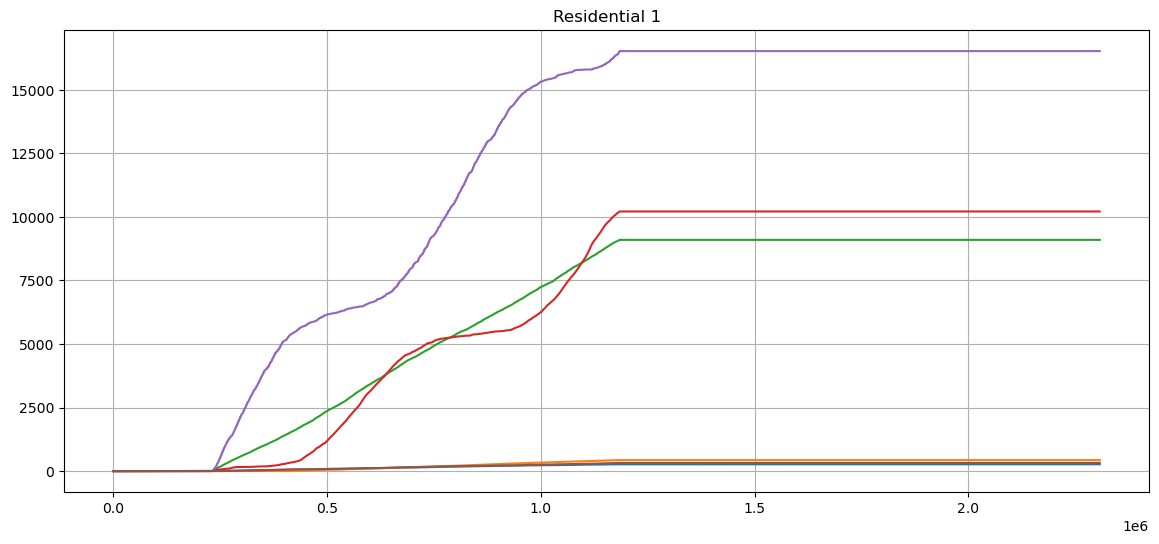

In [17]:
plt.figure(figsize=(14, 6))
plt.plot(residential1_df.index, residential1_df.iloc[:, 2:8].values)
plt.title('Residential 1')
plt.grid(True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


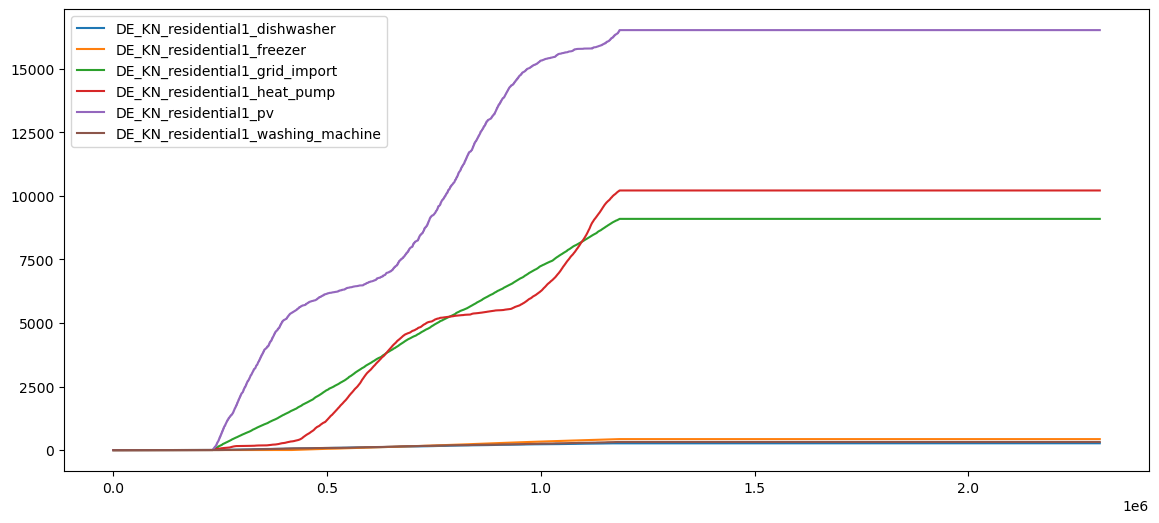

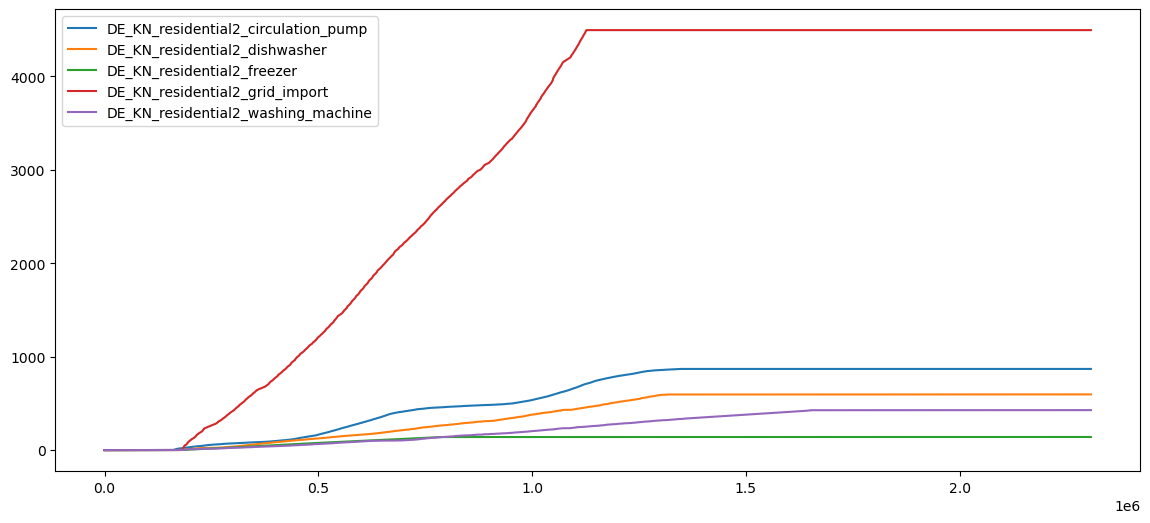

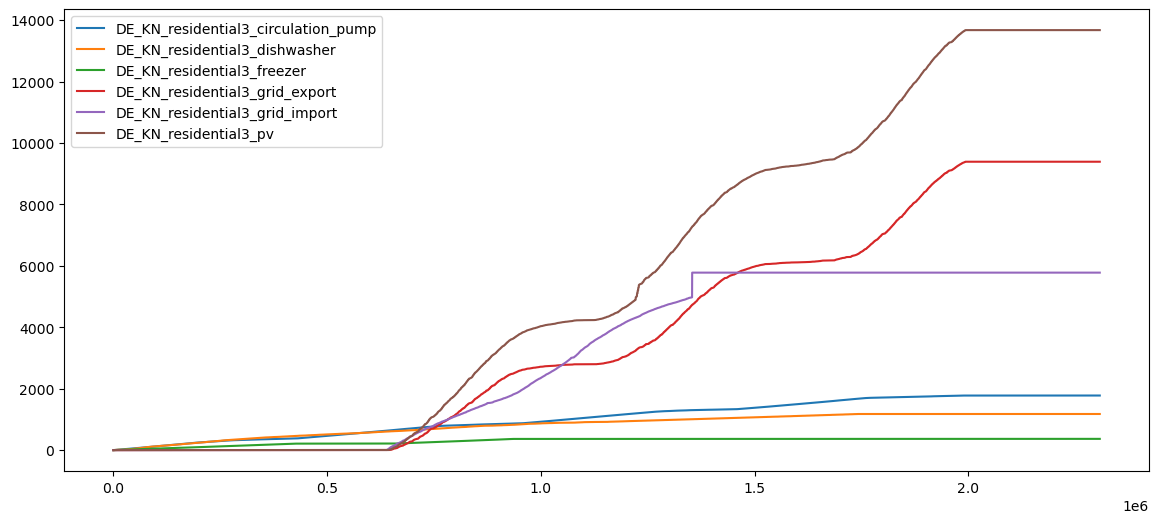

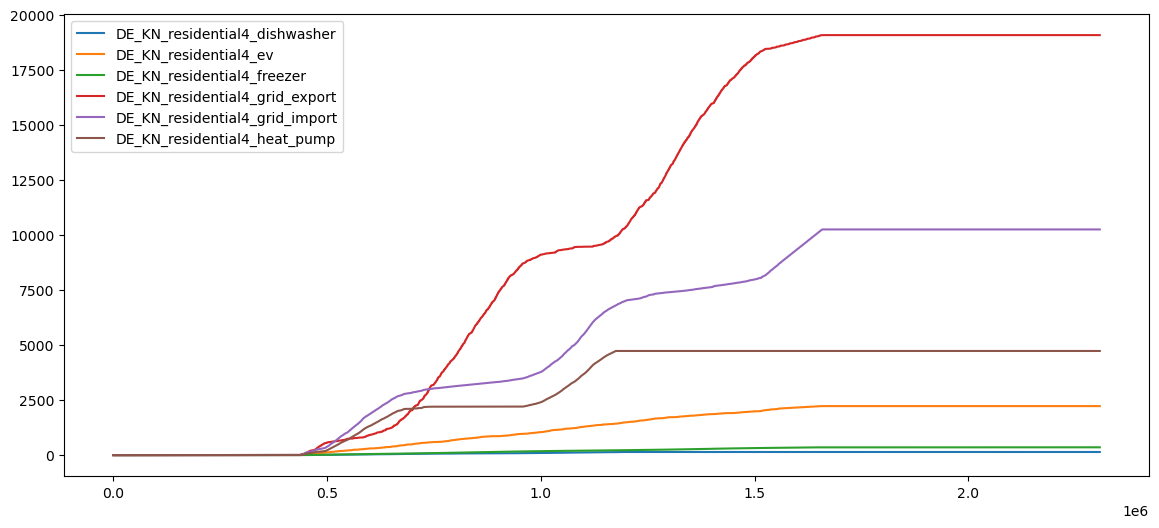

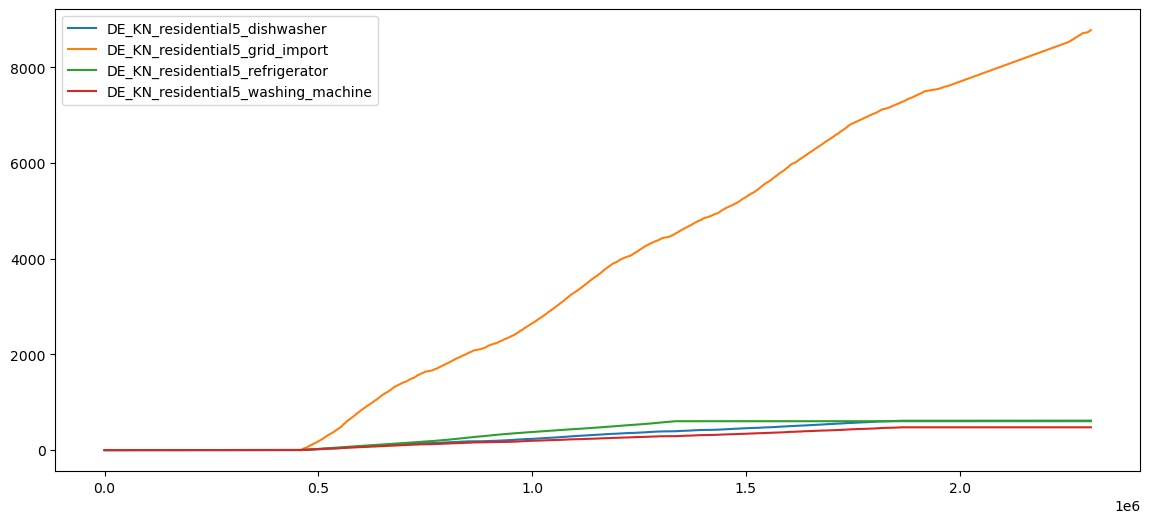

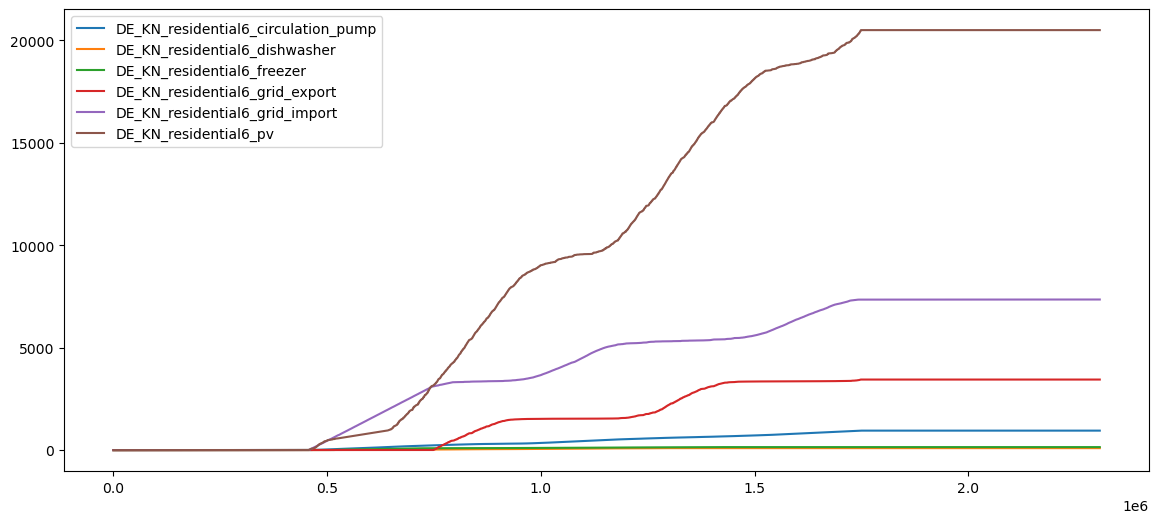

In [18]:
## Usinging Matplotlib Vectorized Plotting (without melt) as data is too big to get normal plot
plt.figure(figsize=(14, 6))
for col in residential1_df.columns[2:8]:
    plt.plot(residential1_df.index, residential1_df[col], label=col)
plt.legend()
plt.show()


plt.figure(figsize=(14, 6))
for col in residential2_df.columns[2:8]:
    plt.plot(residential2_df.index, residential2_df[col], label=col)
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
for col in residential3_df.columns[2:8]:
    plt.plot(residential3_df.index, residential3_df[col], label=col)
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
for col in residential4_df.columns[2:8]:
    plt.plot(residential4_df.index, residential4_df[col], label=col)
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
for col in residential5_df.columns[2:8]:
    plt.plot(residential5_df.index, residential5_df[col], label=col)
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
for col in residential6_df.columns[2:8]:
    plt.plot(residential6_df.index, residential6_df[col], label=col)
plt.legend()
plt.show()

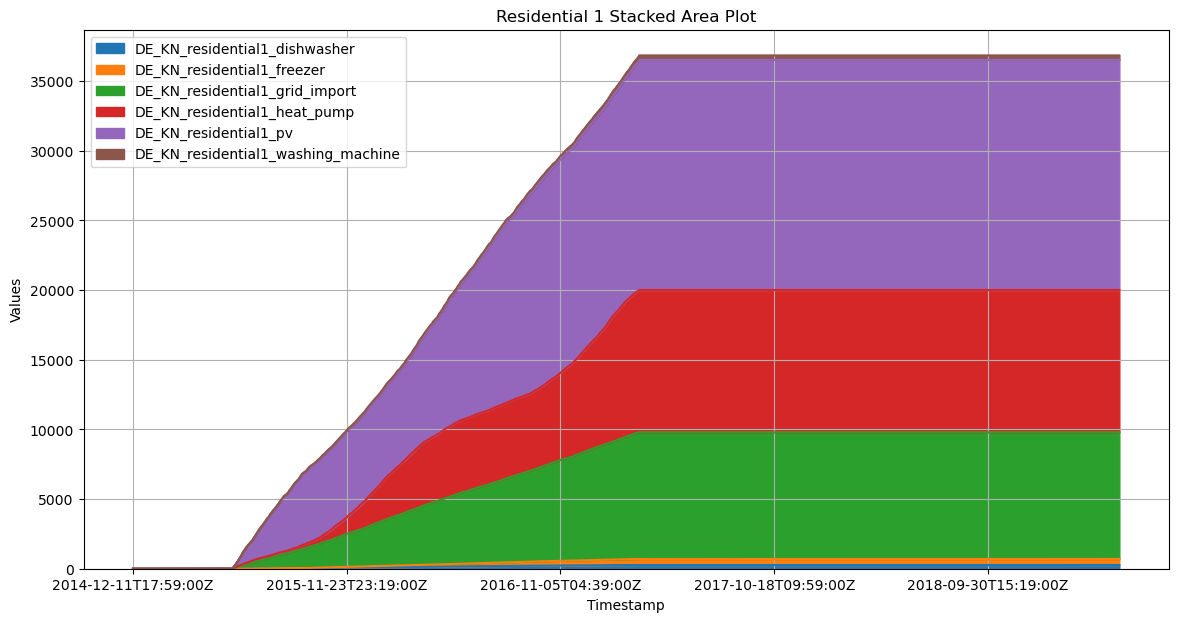

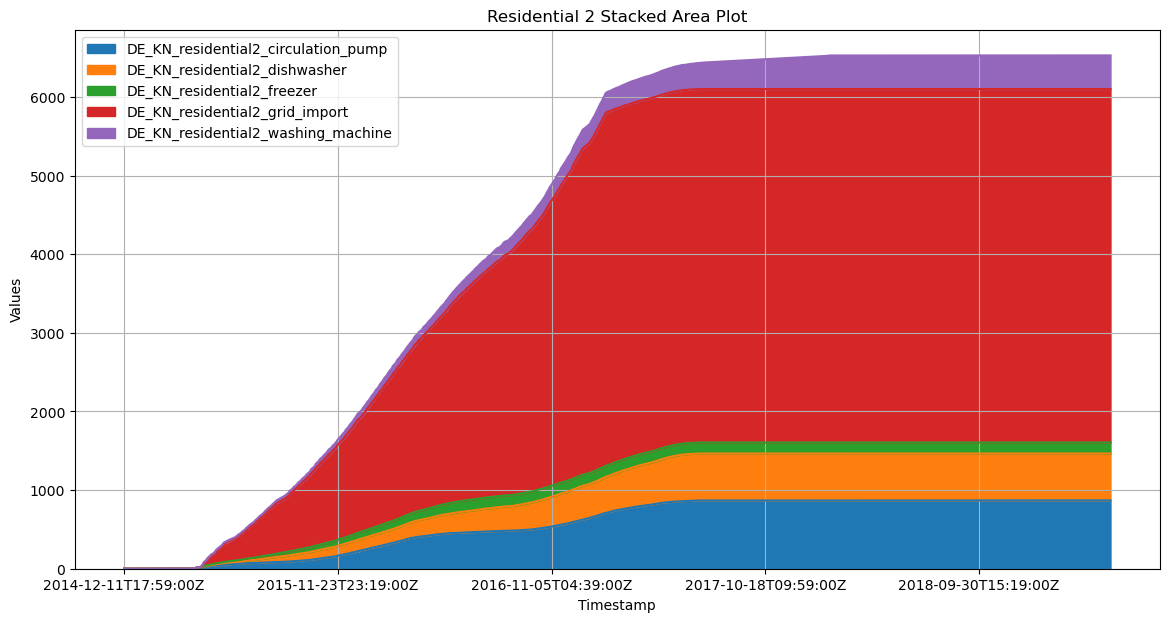

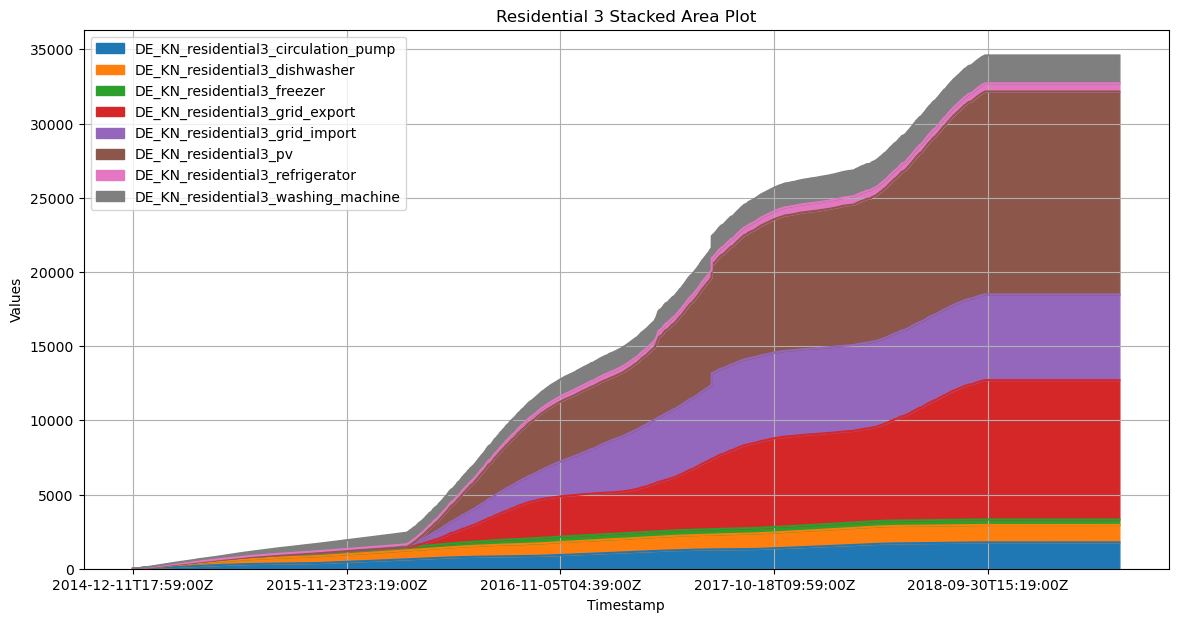

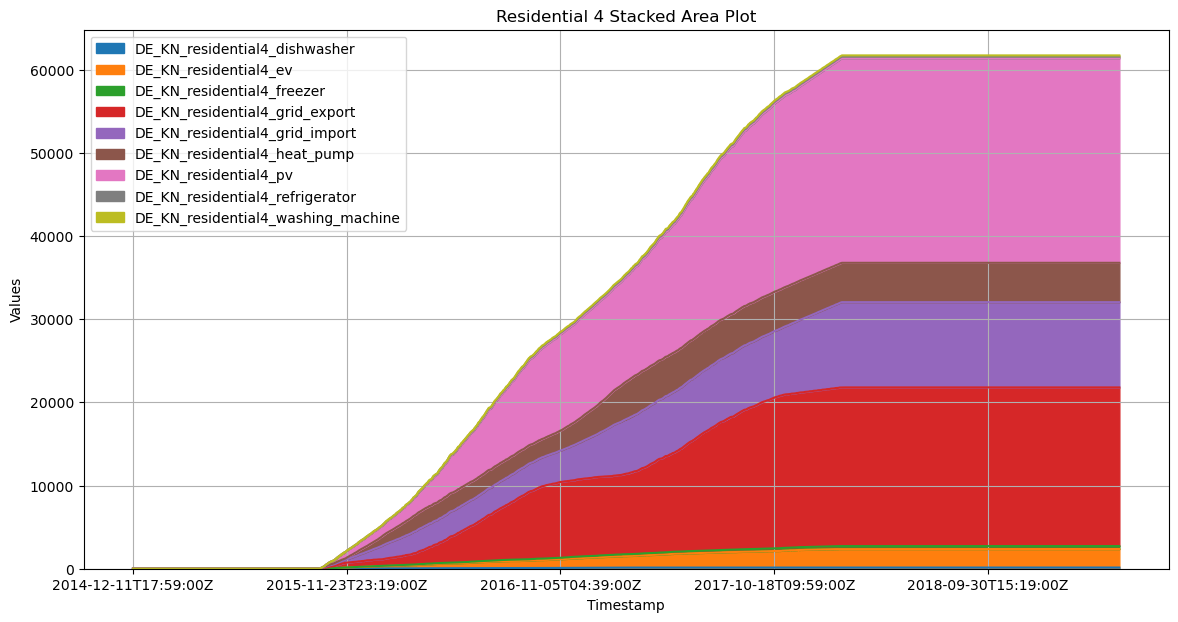

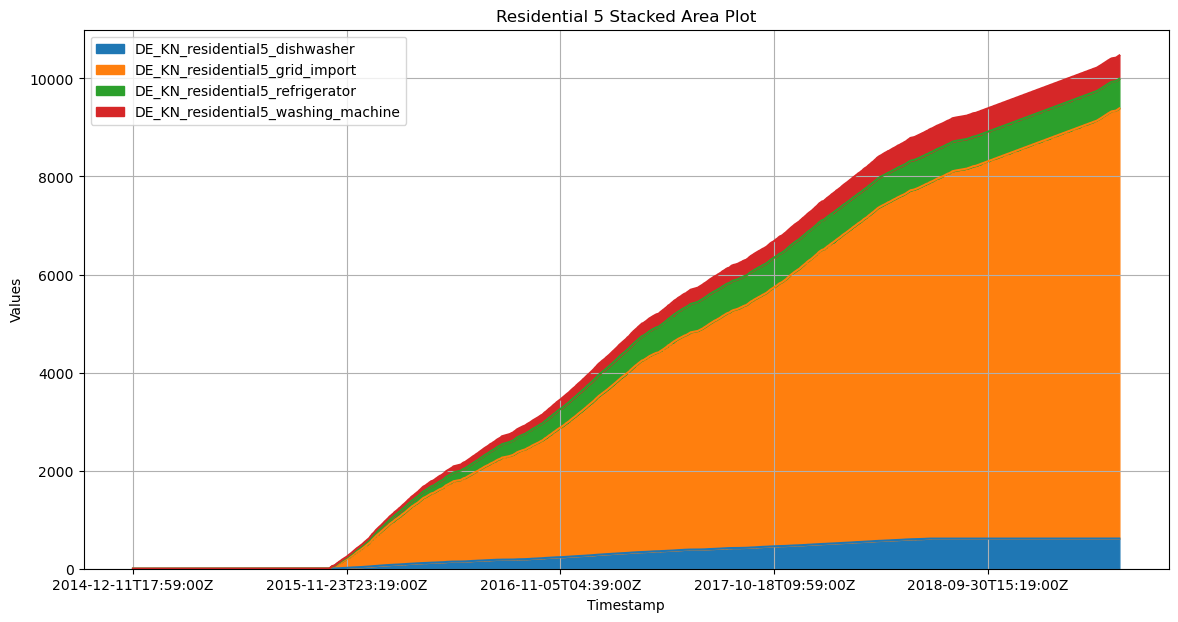

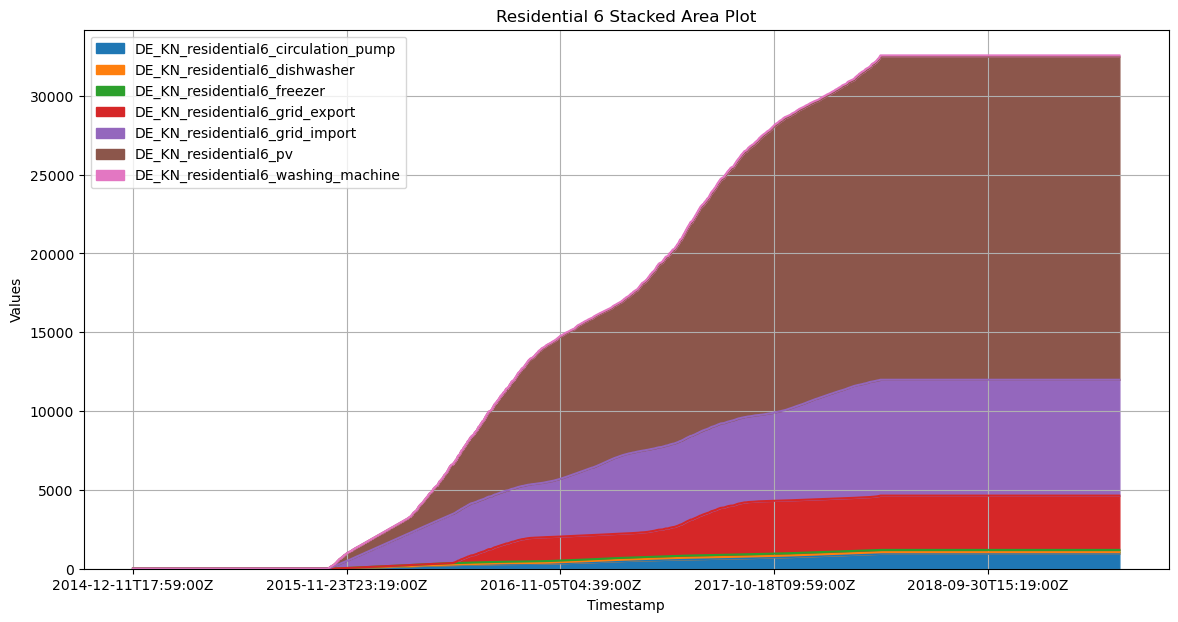

In [19]:

# Residential 1
residential1_df.set_index('utc_timestamp')[residential1_df.columns[2:]].plot.area(stacked=True, figsize=(14, 7))
plt.title('Residential 1 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Residential 2
residential2_df.set_index('utc_timestamp')[residential2_df.columns[2:]].plot.area(stacked=True, figsize=(14, 7))
plt.title('Residential 2 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Residential 3
residential3_df.set_index('utc_timestamp')[residential3_df.columns[2:]].plot.area(stacked=True, figsize=(14, 7))
plt.title('Residential 3 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Residential 4
residential4_df.set_index('utc_timestamp')[residential4_df.columns[2:]].plot.area(stacked=True, figsize=(14, 7))
plt.title('Residential 4 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Residential 5
residential5_df.set_index('utc_timestamp')[residential5_df.columns[2:]].plot.area(stacked=True, figsize=(14, 7))
plt.title('Residential 5 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Residential 6
residential6_df.set_index('utc_timestamp')[residential6_df.columns[2:]].plot.area(stacked=True, figsize=(14, 7))
plt.title('Residential 6 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()


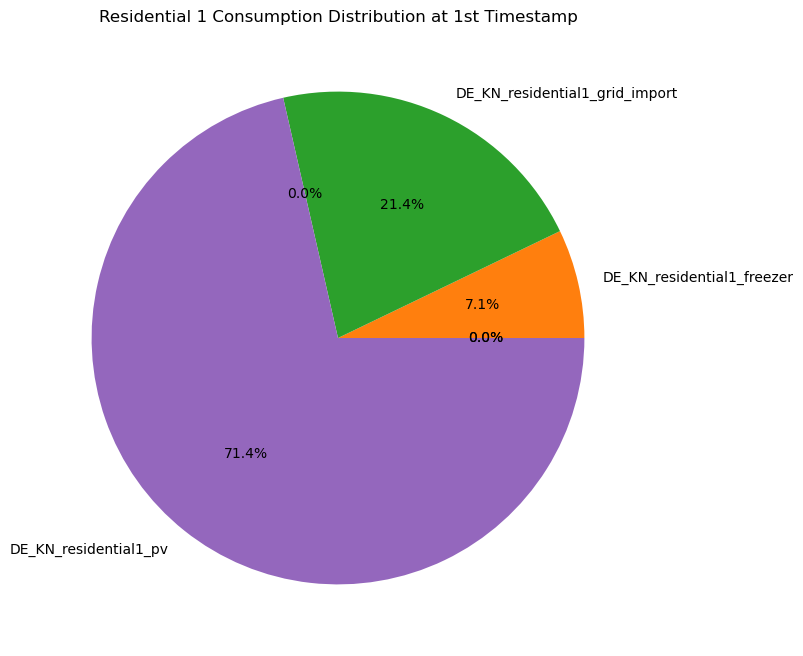

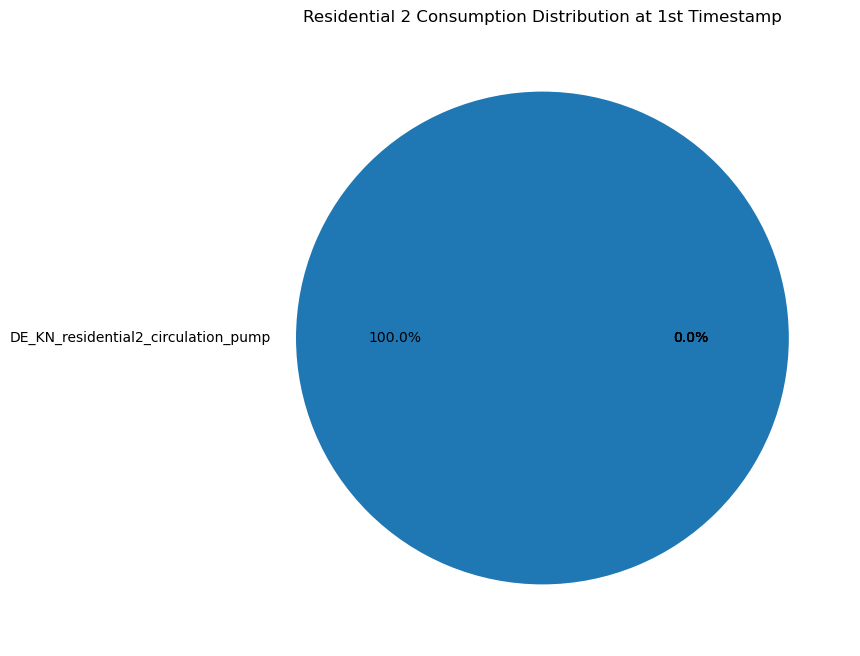

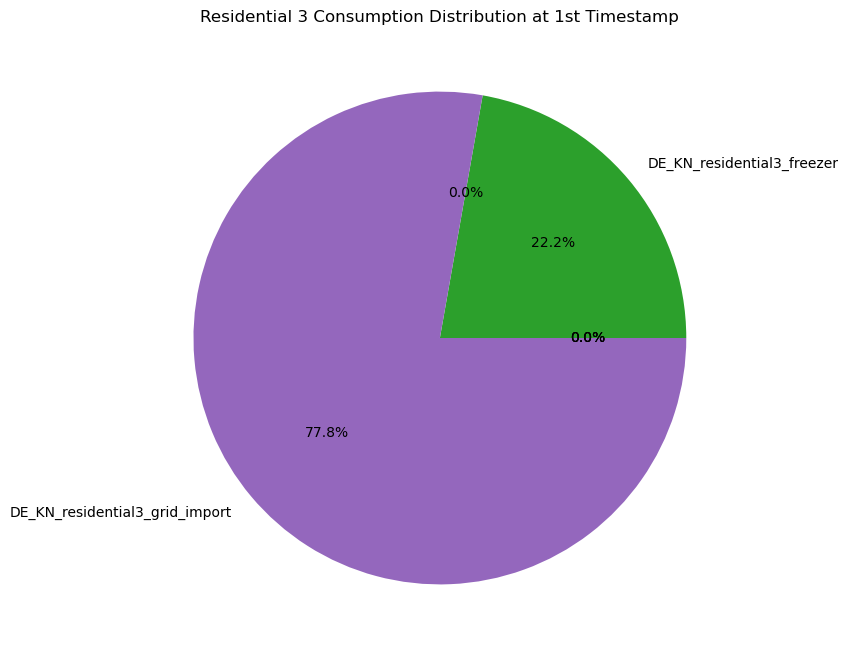

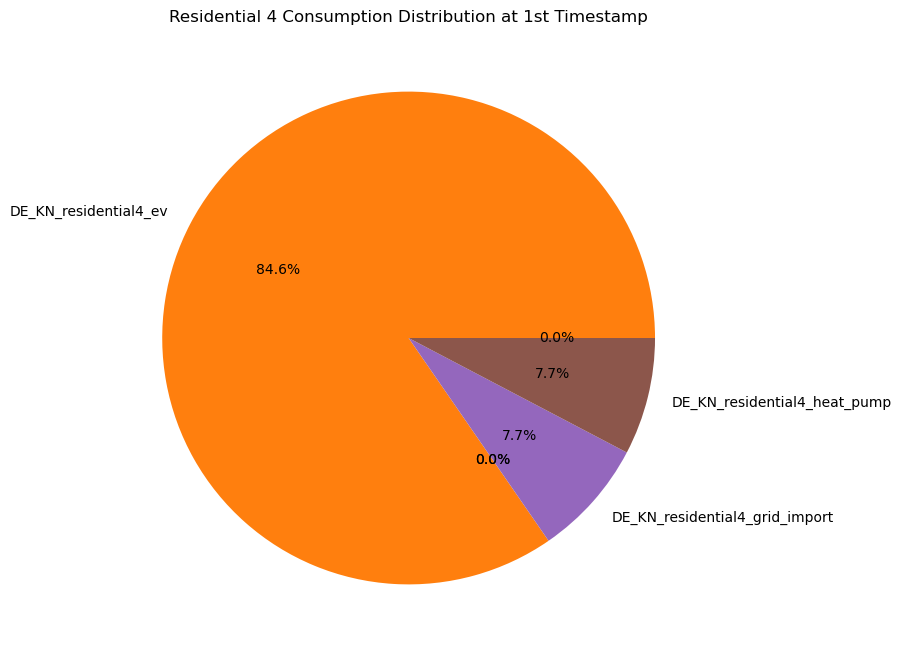

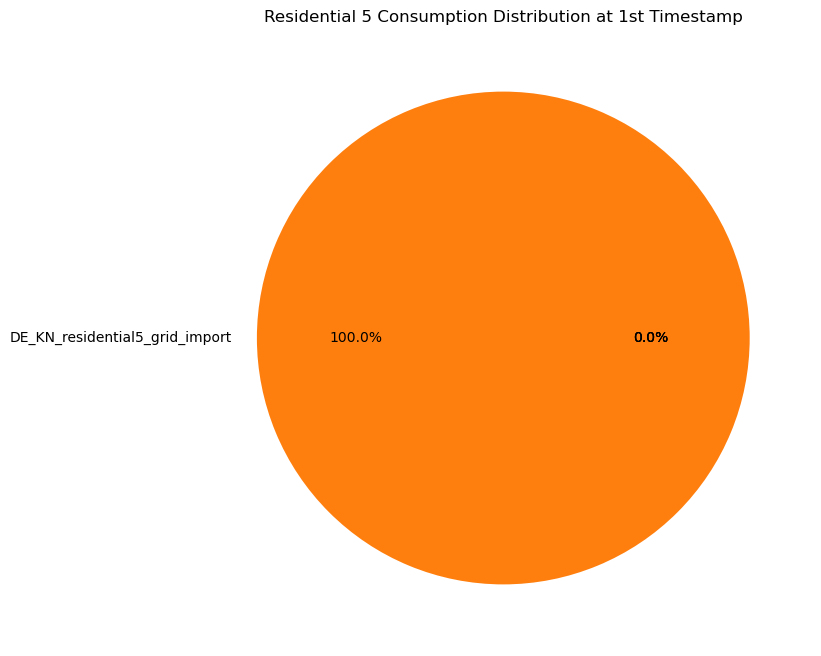

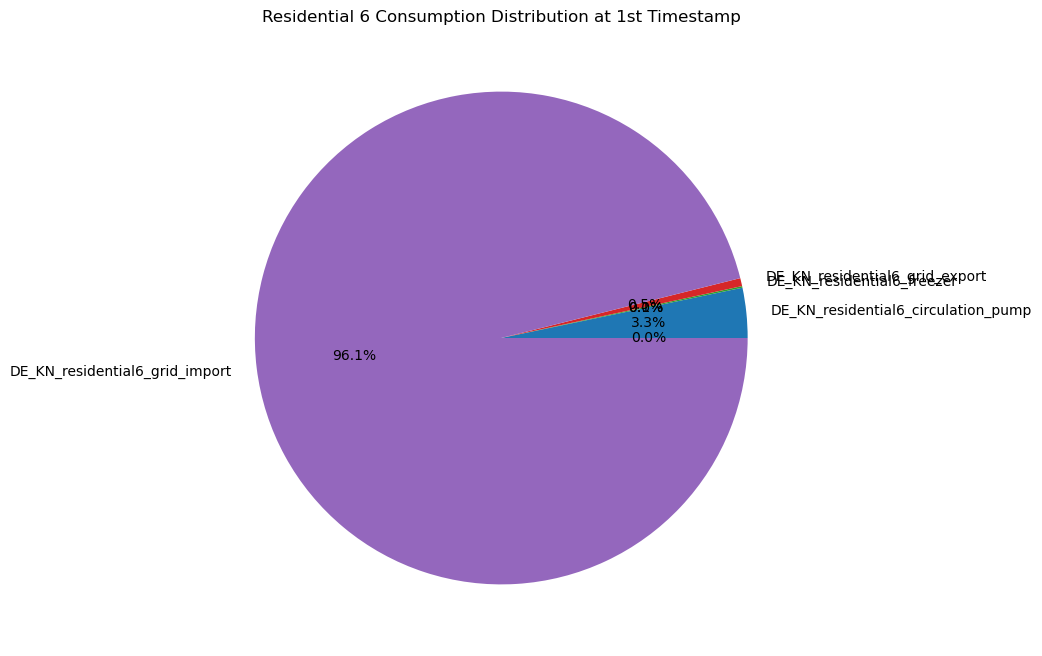

In [20]:


# Residential 1
residential1_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Residential 1 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()

# Residential 2
residential2_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Residential 2 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()

# Residential 3
residential3_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Residential 3 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()

# Residential 4
residential4_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Residential 4 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()

# Residential 5
residential5_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Residential 5 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()

# Residential 6
residential6_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Residential 6 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()


In [21]:
# Industrial 1 columns
residential1_cols = [col for col in residential_df.columns if 'residential1' in col]

# Industrial 2 columns
residential2_cols = [col for col in residential_df.columns if 'residential2' in col]

# Industrial 3 columns
residential3_cols = [col for col in residential_df.columns if 'residential3' in col]

# Industrial 1 columns
residential4_cols = [col for col in residential_df.columns if 'residential4' in col]

# Industrial 2 columns
residential5_cols = [col for col in residential_df.columns if 'residential5' in col]

# Industrial 3 columns
residential6_cols = [col for col in residential_df.columns if 'residential6' in col]

# Timestamps to retain in each
timestamps = ['utc_timestamp', 'cet_cest_timestamp']

# Creating separate DataFrames
residential1_df = residential_df[timestamps + residential1_cols]
residential2_df = residential_df[timestamps + residential2_cols]
residential3_df = residential_df[timestamps + residential3_cols]
residential4_df = residential_df[timestamps + residential4_cols]
residential5_df = residential_df[timestamps + residential5_cols]
residential6_df = residential_df[timestamps + residential6_cols]

# Quick previews
display(residential1_df.head())
display(residential2_df.head())
display(residential3_df.head())
display(residential4_df.head())
display(residential5_df.head())
display(residential6_df.head())

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:59:00Z  2014-12-11T18:59:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T18:01:00Z  2014-12-11T19:01:00+0100   
3  2014-12-11T18:02:00Z  2014-12-11T19:02:00+0100   
4  2014-12-11T18:03:00Z  2014-12-11T19:03:00+0100   

   DE_KN_residential1_dishwasher  DE_KN_residential1_freezer  \
0                            0.0                       0.001   
1                            0.0                       0.001   
2                            0.0                       0.001   
3                            0.0                       0.001   
4                            0.0                       0.001   

   DE_KN_residential1_grid_import  DE_KN_residential1_heat_pump  \
0                           0.003                           0.0   
1                           0.003                           0.0   
2                           0.003                           0.0   
3                           0.003                           0.0   
4                           0.003                           0.0   

   DE_KN_residential1_pv  DE_KN_residential1_washing_machine  
0                   0.01                                 0.0  
1                   0.01                                 0.0  
2                   0.01                                 0.0  
3                   0.01                                 0.0  
4                   0.01                                 0.0

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:59:00Z  2014-12-11T18:59:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T18:01:00Z  2014-12-11T19:01:00+0100   
3  2014-12-11T18:02:00Z  2014-12-11T19:02:00+0100   
4  2014-12-11T18:03:00Z  2014-12-11T19:03:00+0100   

   DE_KN_residential2_circulation_pump  DE_KN_residential2_dishwasher  \
0                                0.001                            0.0   
1                                0.001                            0.0   
2                                0.001                            0.0   
3                                0.001                            0.0   
4                                0.001                            0.0   

   DE_KN_residential2_freezer  DE_KN_residential2_grid_import  \
0                         0.0                             0.0   
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         0.0                             0.0   
4                         0.0                             0.0   

   DE_KN_residential2_washing_machine  
0                                 0.0  
1                                 0.0  
2                                 0.0  
3                                 0.0  
4                                 0.0

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:59:00Z  2014-12-11T18:59:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T18:01:00Z  2014-12-11T19:01:00+0100   
3  2014-12-11T18:02:00Z  2014-12-11T19:02:00+0100   
4  2014-12-11T18:03:00Z  2014-12-11T19:03:00+0100   

   DE_KN_residential3_circulation_pump  DE_KN_residential3_dishwasher  \
0                                  0.0                            0.0   
1                                  0.0                            0.0   
2                                  0.0                            0.0   
3                                  0.0                            0.0   
4                                  0.0                            0.0   

   DE_KN_residential3_freezer  DE_KN_residential3_grid_export  \
0                       0.002                             0.0   
1                       0.003                             0.0   
2                       0.006                             0.0   
3                       0.007                             0.0   
4                       0.008                             0.0   

   DE_KN_residential3_grid_import  DE_KN_residential3_pv  \
0                           0.007                    0.0   
1                           0.007                    0.0   
2                           0.007                    0.0   
3                           0.007                    0.0   
4                           0.007                    0.0   

   DE_KN_residential3_refrigerator  DE_KN_residential3_washing_machine  
0                              0.0                                 0.0  
1                              0.0                                 0.0  
2                              0.0                                 0.0  
3                              0.0                                 0.0  
4                              0.0                                 0.0

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:59:00Z  2014-12-11T18:59:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T18:01:00Z  2014-12-11T19:01:00+0100   
3  2014-12-11T18:02:00Z  2014-12-11T19:02:00+0100   
4  2014-12-11T18:03:00Z  2014-12-11T19:03:00+0100   

   DE_KN_residential4_dishwasher  DE_KN_residential4_ev  \
0                            0.0                  0.022   
1                            0.0                  0.022   
2                            0.0                  0.022   
3                            0.0                  0.022   
4                            0.0                  0.022   

   DE_KN_residential4_freezer  DE_KN_residential4_grid_export  \
0                         0.0                             0.0   
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         0.0                             0.0   
4                         0.0                             0.0   

   DE_KN_residential4_grid_import  DE_KN_residential4_heat_pump  \
0                           0.002                         0.002   
1                           0.002                         0.002   
2                           0.002                         0.002   
3                           0.002                         0.002   
4                           0.002                         0.002   

   DE_KN_residential4_pv  DE_KN_residential4_refrigerator  \
0                    0.0                              0.0   
1                    0.0                              0.0   
2                    0.0                              0.0   
3                    0.0                              0.0   
4                    0.0                              0.0   

   DE_KN_residential4_washing_machine  
0                                 0.0  
1                                 0.0  
2                                 0.0  
3                                 0.0  
4                                 0.0

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:59:00Z  2014-12-11T18:59:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T18:01:00Z  2014-12-11T19:01:00+0100   
3  2014-12-11T18:02:00Z  2014-12-11T19:02:00+0100   
4  2014-12-11T18:03:00Z  2014-12-11T19:03:00+0100   

   DE_KN_residential5_dishwasher  DE_KN_residential5_grid_import  \
0                            0.0                           0.003   
1                            0.0                           0.003   
2                            0.0                           0.003   
3                            0.0                           0.003   
4                            0.0                           0.003   

   DE_KN_residential5_refrigerator  DE_KN_residential5_washing_machine  
0                              0.0                                 0.0  
1                              0.0                                 0.0  
2                              0.0                                 0.0  
3                              0.0                                 0.0  
4                              0.0                                 0.0

utc_timestamp        cet_cest_timestamp  \
0  2014-12-11T17:59:00Z  2014-12-11T18:59:00+0100   
1  2014-12-11T18:00:00Z  2014-12-11T19:00:00+0100   
2  2014-12-11T18:01:00Z  2014-12-11T19:01:00+0100   
3  2014-12-11T18:02:00Z  2014-12-11T19:02:00+0100   
4  2014-12-11T18:03:00Z  2014-12-11T19:03:00+0100   

   DE_KN_residential6_circulation_pump  DE_KN_residential6_dishwasher  \
0                                0.031                            0.0   
1                                0.031                            0.0   
2                                0.031                            0.0   
3                                0.031                            0.0   
4                                0.031                            0.0   

   DE_KN_residential6_freezer  DE_KN_residential6_grid_export  \
0                       0.001                           0.005   
1                       0.001                           0.005   
2                       0.001                           0.005   
3                       0.001                           0.005   
4                       0.001                           0.005   

   DE_KN_residential6_grid_import  DE_KN_residential6_pv  \
0                            0.91                    0.0   
1                            0.91                    0.0   
2                            0.91                    0.0   
3                            0.91                    0.0   
4                            0.91                    0.0   

   DE_KN_residential6_washing_machine  
0                                 0.0  
1                                 0.0  
2                                 0.0  
3                                 0.0  
4                                 0.0

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


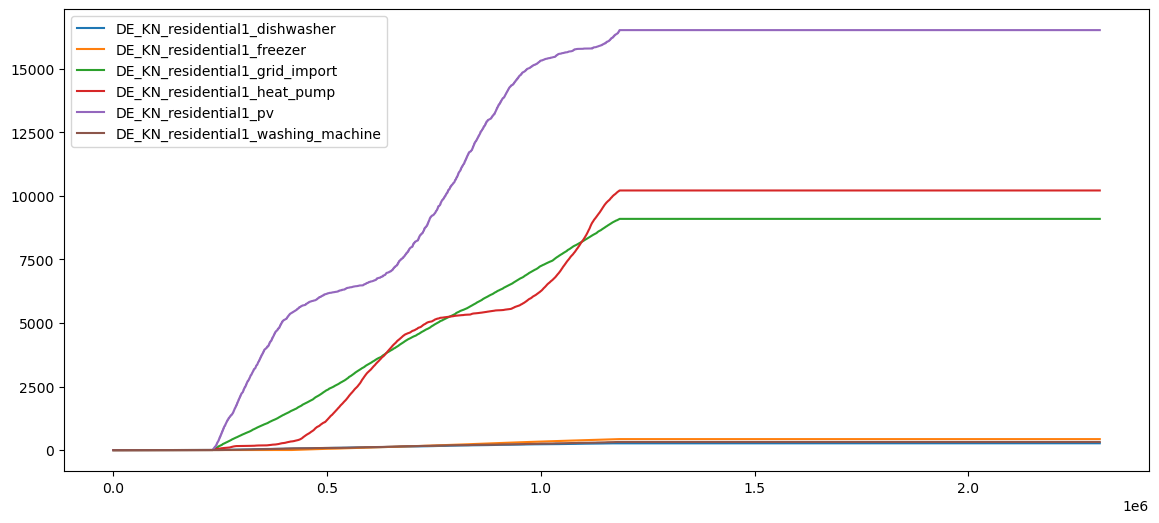

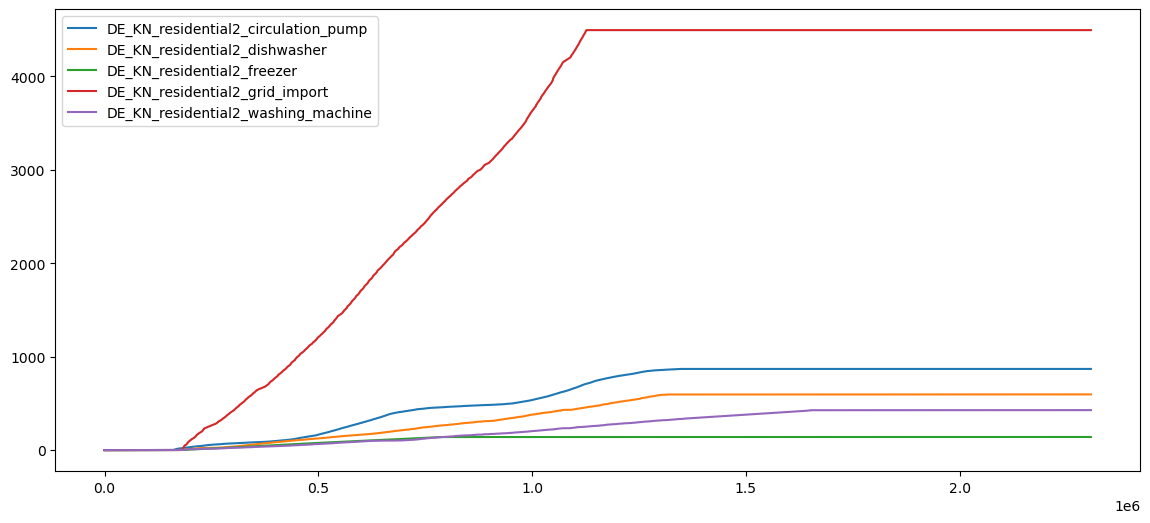

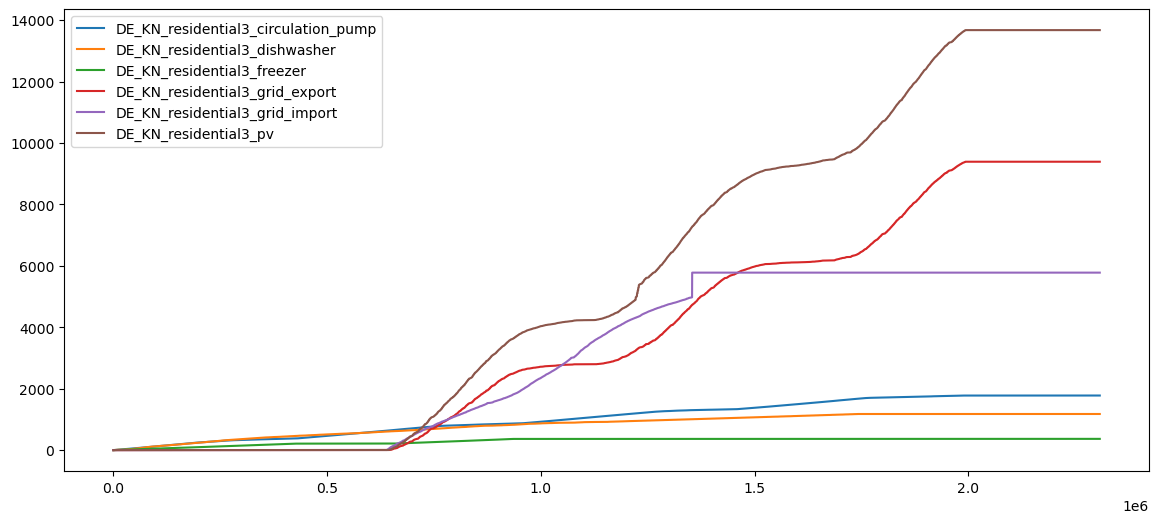

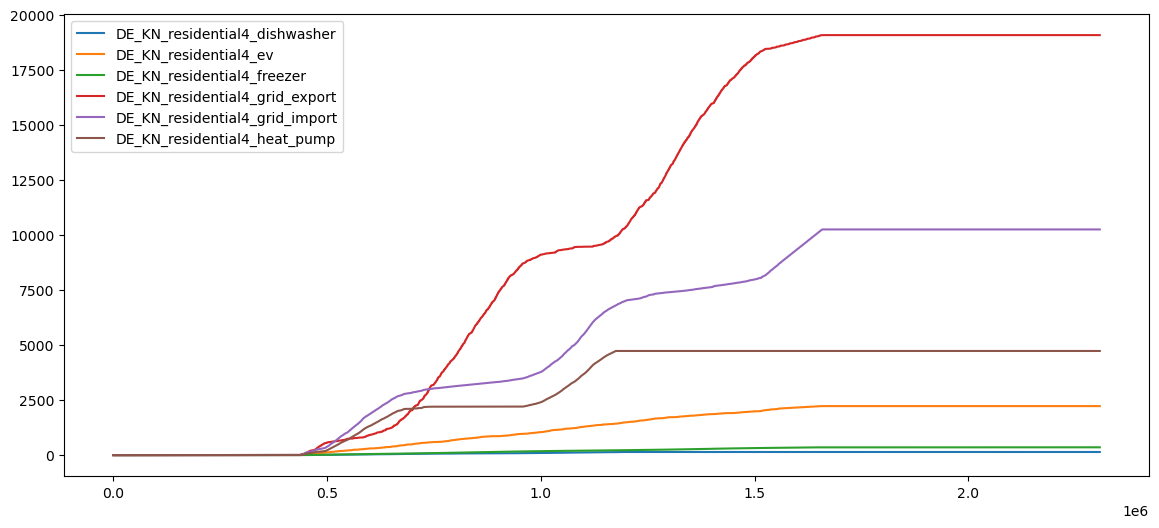

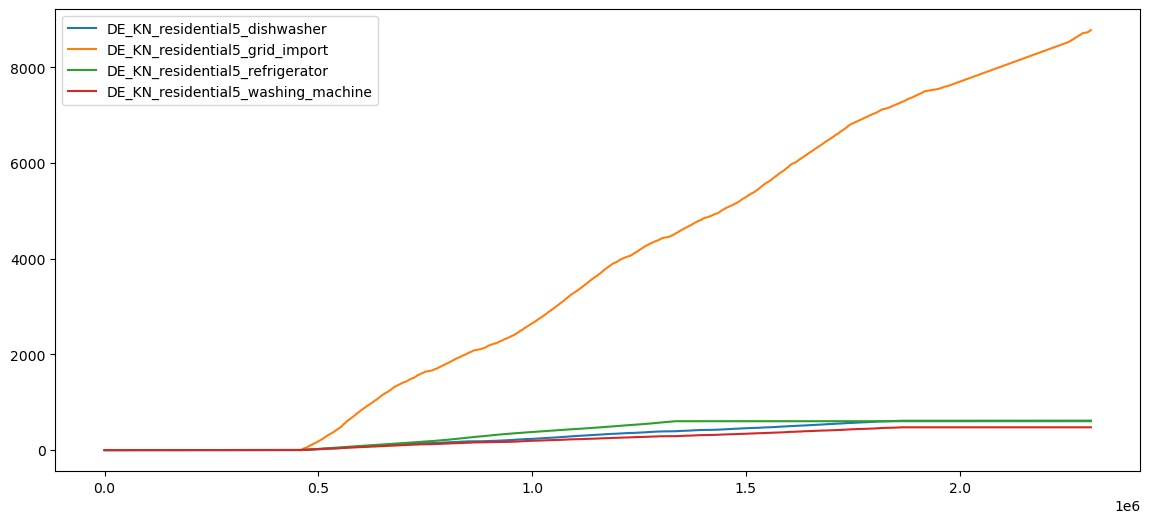

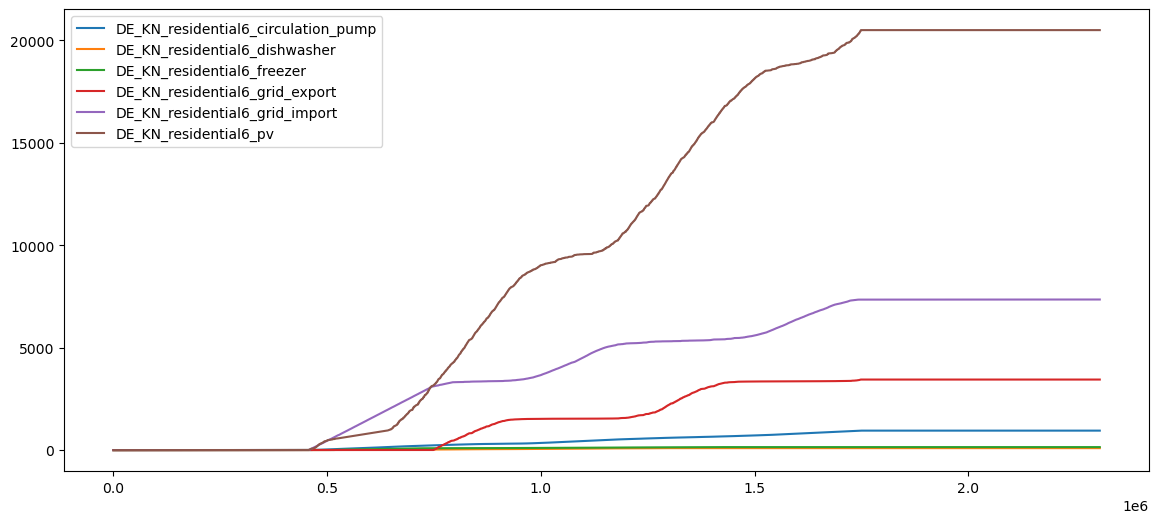

In [22]:
## Usinging Matplotlib Vectorized Plotting (without melt) as data is too big to get normal plot
plt.figure(figsize=(14, 6))
for col in residential1_df.columns[2:8]:
    plt.plot(residential1_df.index, residential1_df[col], label=col)
plt.legend()
plt.show()


plt.figure(figsize=(14, 6))
for col in residential2_df.columns[2:8]:
    plt.plot(residential2_df.index, residential2_df[col], label=col)
plt.legend()
plt.show()


plt.figure(figsize=(14, 6))
for col in residential3_df.columns[2:8]:
    plt.plot(residential3_df.index, residential3_df[col], label=col)
plt.legend()
plt.show()
## Usinging Matplotlib Vectorized Plotting (without melt) as data is too big to get normal plot
plt.figure(figsize=(14, 6))
for col in residential4_df.columns[2:8]:
    plt.plot(residential4_df.index, residential4_df[col], label=col)
plt.legend()
plt.show()


plt.figure(figsize=(14, 6))
for col in residential5_df.columns[2:8]:
    plt.plot(residential5_df.index, residential5_df[col], label=col)
plt.legend()
plt.show()


plt.figure(figsize=(14, 6))
for col in residential6_df.columns[2:8]:
    plt.plot(residential6_df.index, residential6_df[col], label=col)
plt.legend()
plt.show()

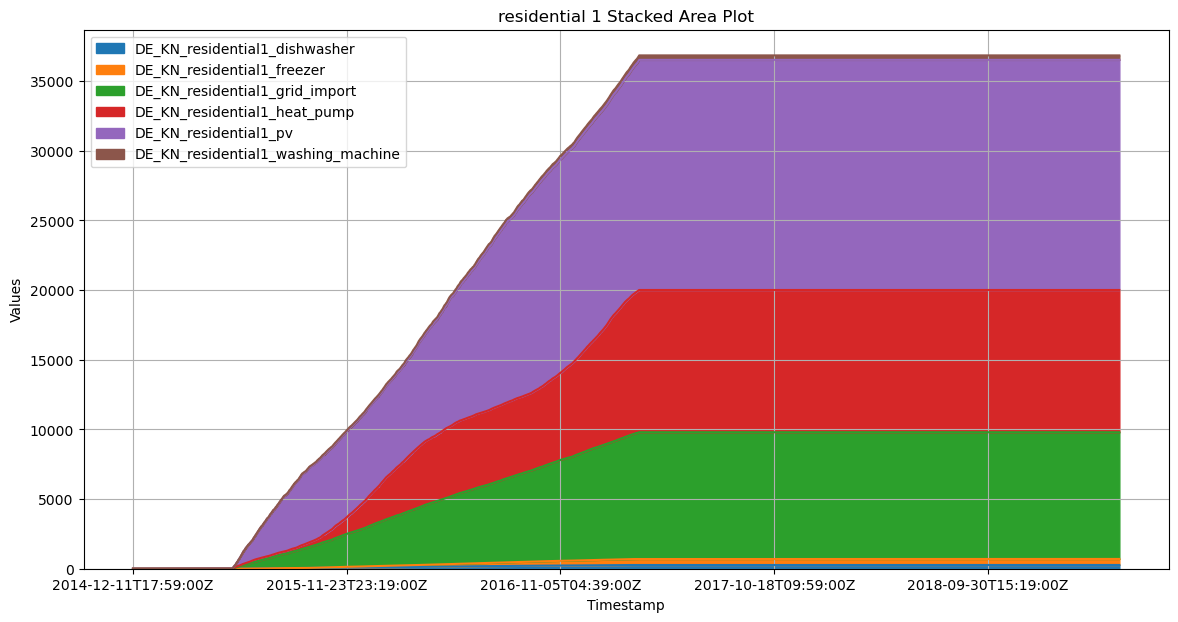

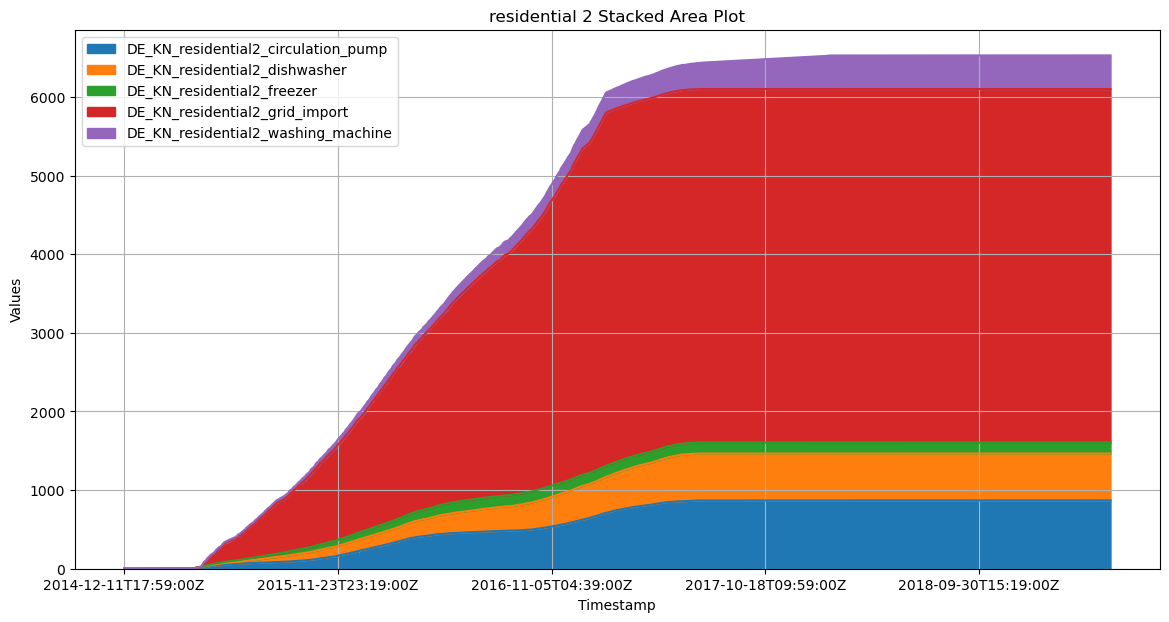

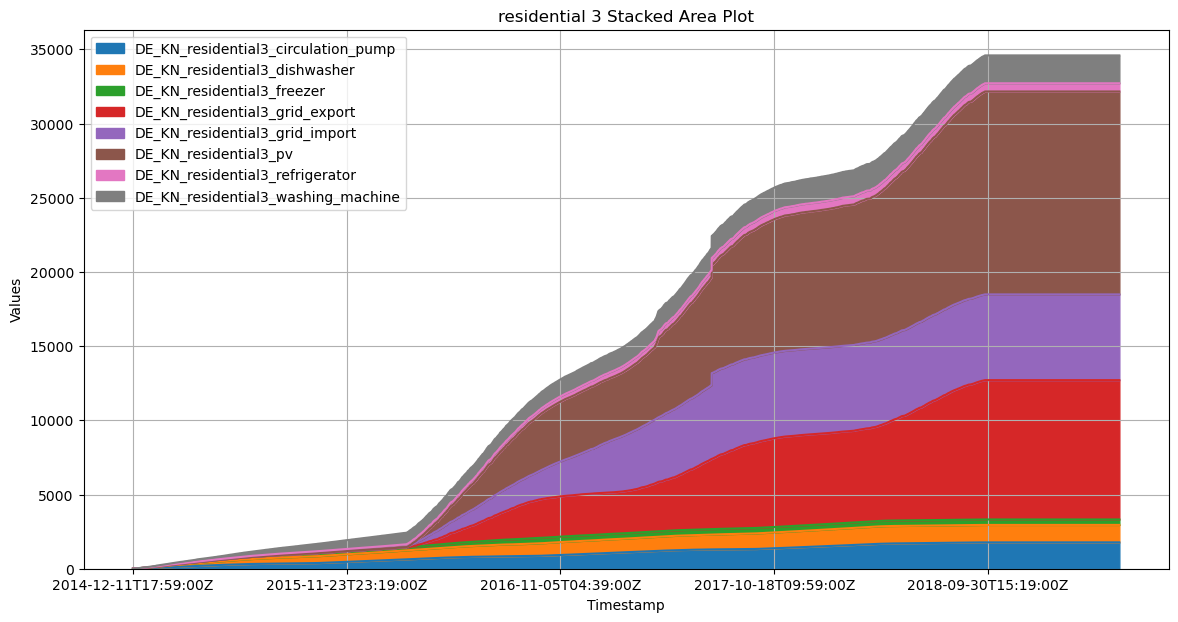

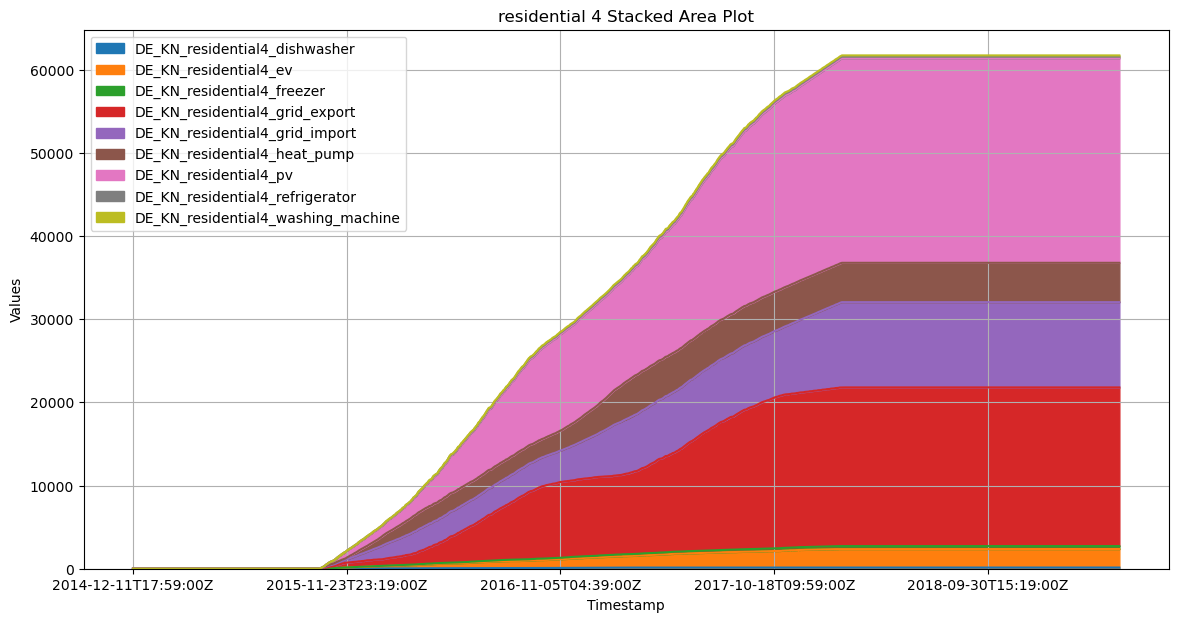

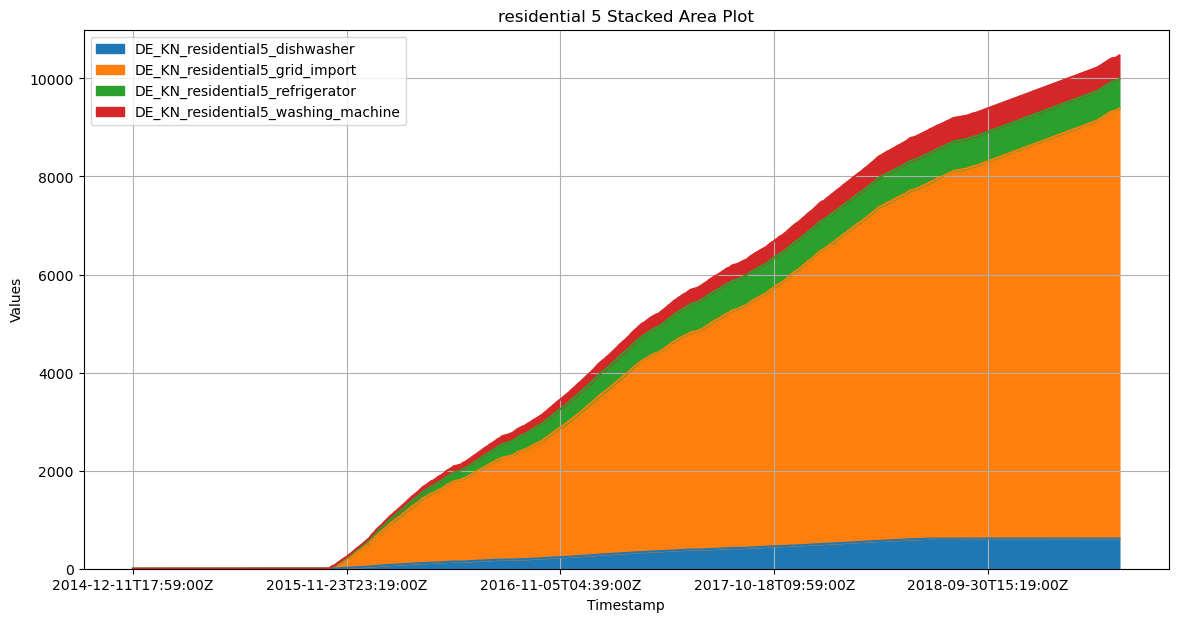

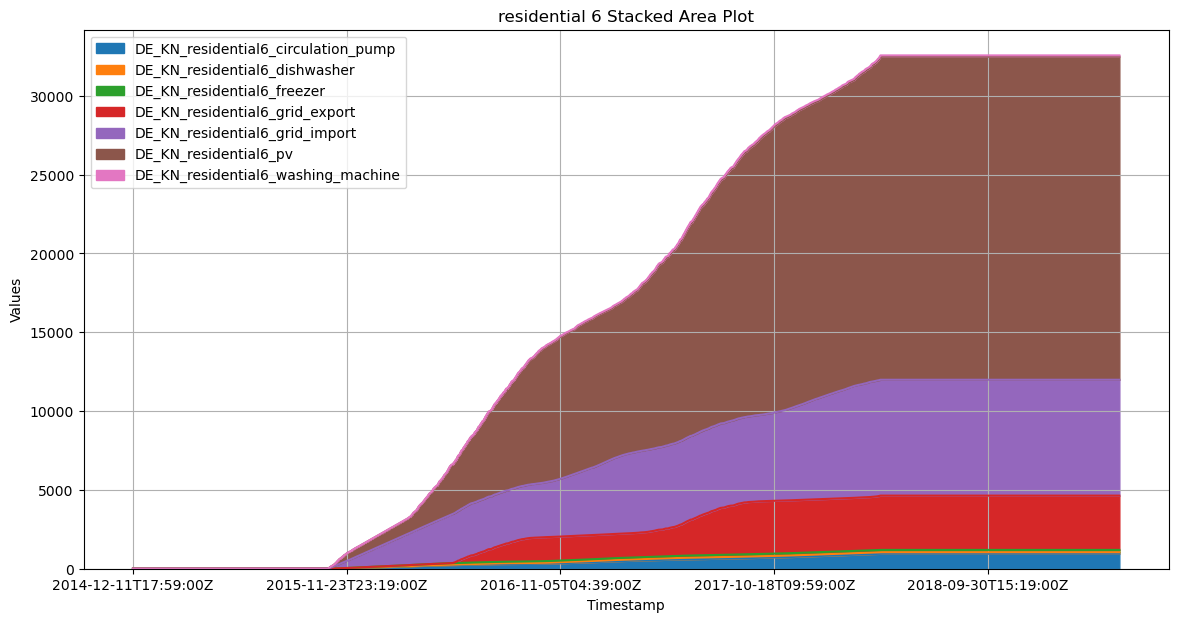

In [23]:
residential1_df.set_index('utc_timestamp')[residential1_df.columns[2:]].plot.area(stacked=True, figsize=(14,7))
plt.title('residential 1 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

residential2_df.set_index('utc_timestamp')[residential2_df.columns[2:]].plot.area(stacked=True, figsize=(14,7))
plt.title('residential 2 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

residential3_df.set_index('utc_timestamp')[residential3_df.columns[2:]].plot.area(stacked=True, figsize=(14,7))
plt.title('residential 3 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

residential4_df.set_index('utc_timestamp')[residential4_df.columns[2:]].plot.area(stacked=True, figsize=(14,7))
plt.title('residential 4 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

residential5_df.set_index('utc_timestamp')[residential5_df.columns[2:]].plot.area(stacked=True, figsize=(14,7))
plt.title('residential 5 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()

residential6_df.set_index('utc_timestamp')[residential6_df.columns[2:]].plot.area(stacked=True, figsize=(14,7))
plt.title('residential 6 Stacked Area Plot')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid(True)
plt.show()


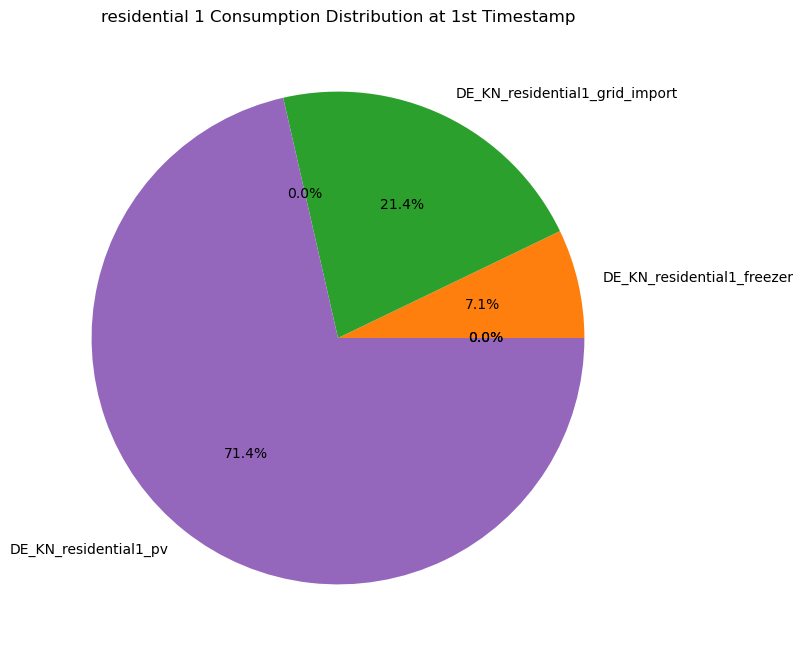

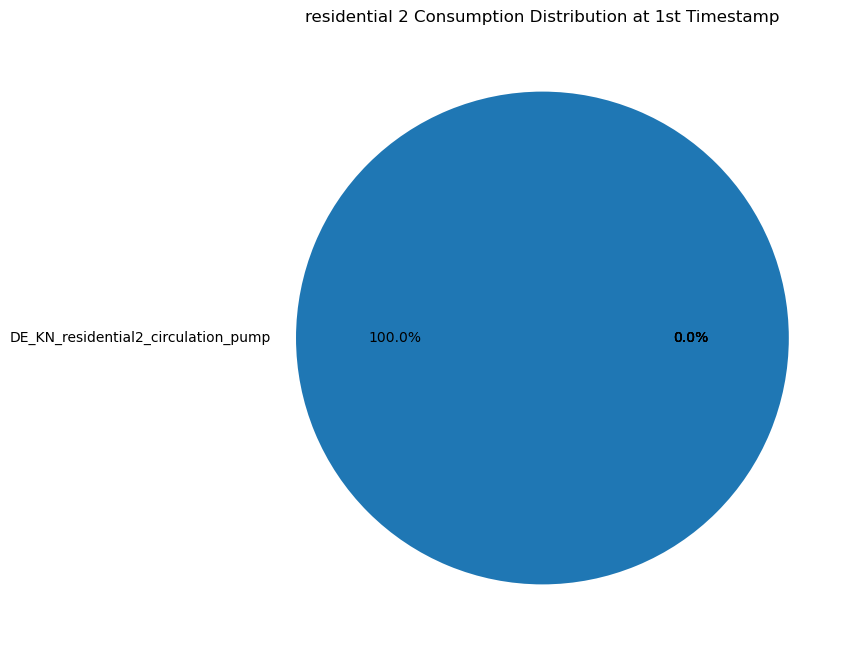

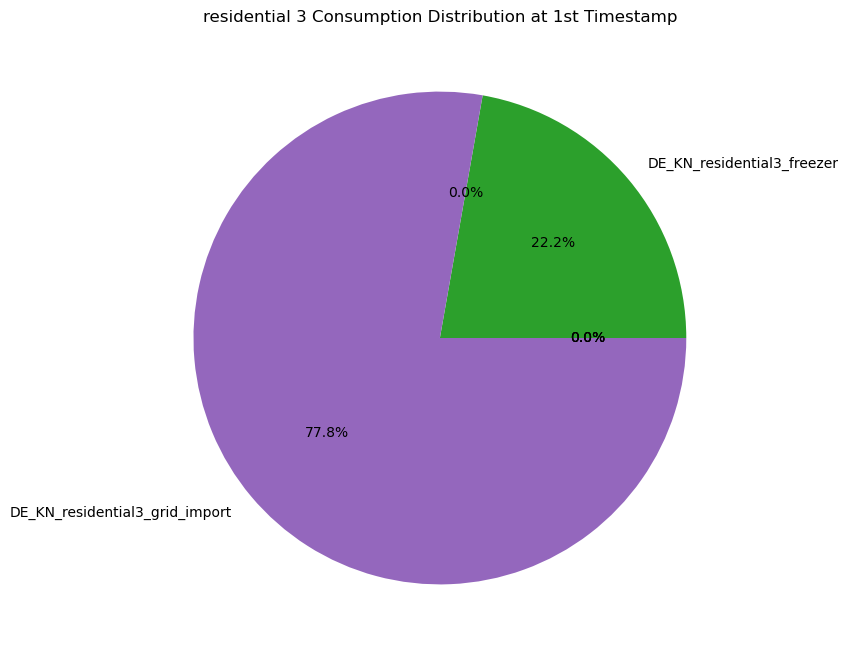

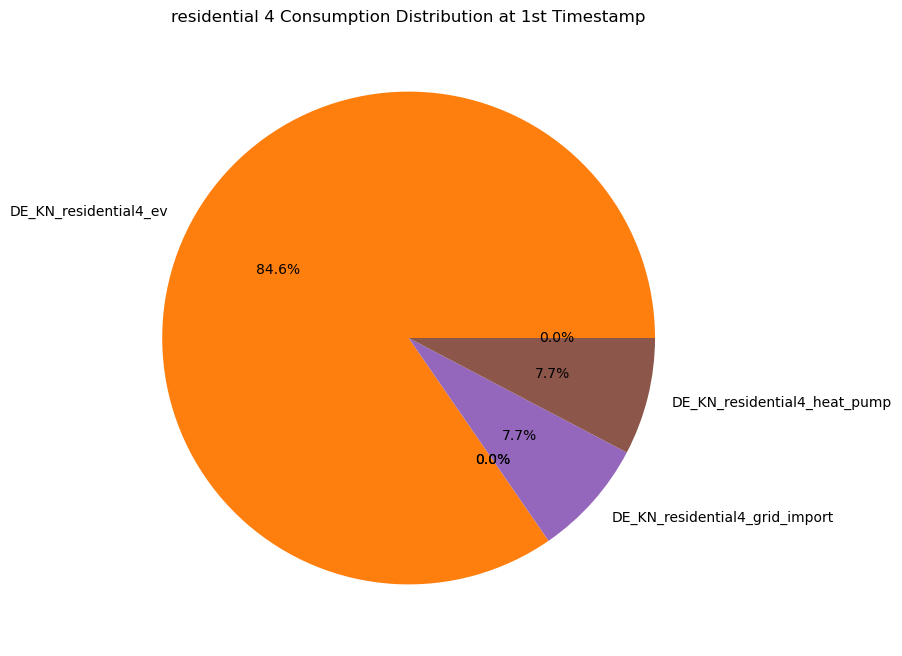

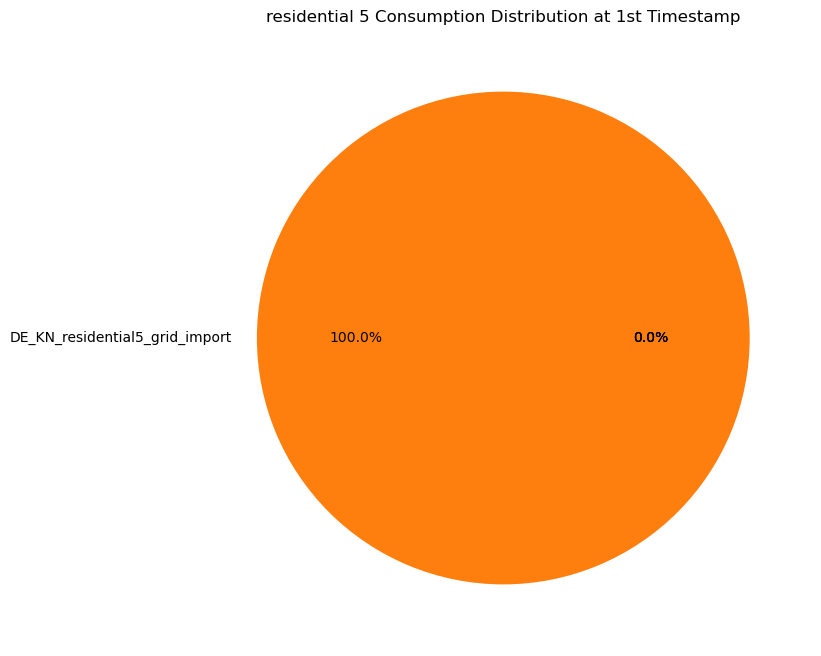

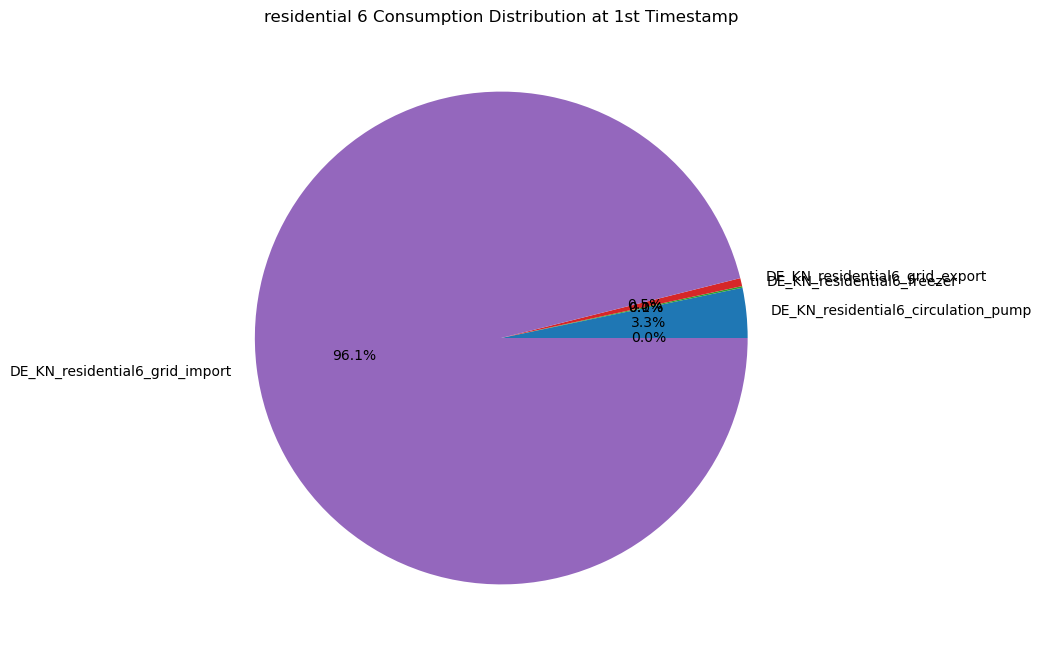

In [24]:
residential1_df.iloc[0, 2:8] = pd.to_numeric(residential1_df.iloc[0, 2:8], errors='coerce')
residential1_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('residential 1 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()


residential2_df.iloc[0, 2:8] = pd.to_numeric(residential2_df.iloc[0, 2:8], errors='coerce')
residential2_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('residential 2 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()

residential3_df.iloc[0, 2:8] = pd.to_numeric(residential3_df.iloc[0, 2:8], errors='coerce')
residential3_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('residential 3 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()

residential4_df.iloc[0, 2:8] = pd.to_numeric(residential4_df.iloc[0, 2:8], errors='coerce')
residential4_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('residential 4 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()


residential5_df.iloc[0, 2:8] = pd.to_numeric(residential5_df.iloc[0, 2:8], errors='coerce')
residential5_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('residential 5 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()

residential6_df.iloc[0, 2:8] = pd.to_numeric(residential6_df.iloc[0, 2:8], errors='coerce')
residential6_df.iloc[0, 2:8].plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('residential 6 Consumption Distribution at 1st Timestamp')
plt.ylabel('')
plt.show()


In [25]:
# --------------- Assuminging residential DataFrames already exist: residential1_df ... residential6_df ---------------

# Putting them into a list for easy looping
residential_dfs = [
    residential1_df.copy(),
    residential2_df.copy(),
    residential3_df.copy(),
    residential4_df.copy(),
    residential5_df.copy(),
    residential6_df.copy()
]

# --------------- Converting 'utc_timestamp' to datetime, drop invalid values, and add 'hour', 'day', 'month' columns ---------------

for i, df in enumerate(residential_dfs, start=1):
    df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'], errors='coerce')
    print(f"Residential {i}: Before dropping NaT — {df['utc_timestamp'].isna().sum()} invalid timestamps")

    df.dropna(subset=['utc_timestamp'], inplace=True)
    print(f"Residential {i}: After dropping NaT — {df['utc_timestamp'].isna().sum()} remaining")

    df['hour'] = df['utc_timestamp'].dt.hour
    df['day'] = df['utc_timestamp'].dt.date
    df['month'] = df['utc_timestamp'].dt.month

    residential_dfs[i-1] = df  # Update list

# --------------- Defining columns to group by for each residential DataFrame ---------------

residential_cols = []
for i, df in enumerate(residential_dfs, start=1):
    cols = [col for col in df.columns if col.startswith(f'DE_KN_residential{i}')]
    residential_cols.append(cols)
    print(f"Residential {i} group columns: {cols}")

# --------------- Grouping by Hourly, Daily, Monthly for each residential DataFrame ---------------

residential_hourly = []
residential_daily  = []
residential_monthly = []

for i, df in enumerate(residential_dfs):
    cols = residential_cols[i]

    hourly  = df.groupby('hour')[cols].mean()
    daily   = df.groupby('day')[cols].mean()
    monthly = df.groupby('month')[cols].mean()

    residential_hourly.append(hourly)
    residential_daily.append(daily)
    residential_monthly.append(monthly)

# --------------- Displaying Results ---------------

for i in range(6):
    print(f"\nHourly Analysis for Residential {i+1}")
    display(residential_hourly[i].head())

for i in range(6):
    print(f"\nDaily Analysis for Residential {i+1}")
    display(residential_daily[i].head())

for i in range(6):
    print(f"\nMonthly Analysis for Residential {i+1}")
    display(residential_monthly[i].head())

Residential 1: Before dropping NaT — 0 invalid timestamps
Residential 1: After dropping NaT — 0 remaining
Residential 2: Before dropping NaT — 0 invalid timestamps
Residential 2: After dropping NaT — 0 remaining
Residential 3: Before dropping NaT — 0 invalid timestamps
Residential 3: After dropping NaT — 0 remaining
Residential 4: Before dropping NaT — 0 invalid timestamps
Residential 4: After dropping NaT — 0 remaining
Residential 5: Before dropping NaT — 0 invalid timestamps
Residential 5: After dropping NaT — 0 remaining
Residential 6: Before dropping NaT — 0 invalid timestamps
Residential 6: After dropping NaT — 0 remaining
Residential 1 group columns: ['DE_KN_residential1_dishwasher', 'DE_KN_residential1_freezer', 'DE_KN_residential1_grid_import', 'DE_KN_residential1_heat_pump', 'DE_KN_residential1_pv', 'DE_KN_residential1_washing_machine']
Residential 2 group columns: ['DE_KN_residential2_circulation_pump', 'DE_KN_residential2_dishwasher', 'DE_KN_residential2_freezer', 'DE_KN_res

DE_KN_residential1_dishwasher  DE_KN_residential1_freezer  \
hour                                                              
0                        190.032428                  282.958341   
1                        190.033097                  282.969629   
2                        190.033114                  282.980880   
3                        190.033131                  282.992094   
4                        190.033148                  283.003220   

      DE_KN_residential1_grid_import  DE_KN_residential1_heat_pump  \
hour                                                                 
0                        6262.233657                   6632.159400   
1                        6262.385609                   6632.301831   
2                        6262.537134                   6632.477008   
3                        6262.690808                   6632.681554   
4                        6262.868515                   6633.264114   

      DE_KN_residential1_pv  DE_KN_residential1_washing_machine  
hour                                                             
0              11891.775458                          220.058035  
1              11891.775458                          220.058165  
2              11891.775458                          220.058286  
3              11891.775500                          220.058409  
4              11891.782980                          220.058535


Hourly Analysis for Residential 2


DE_KN_residential2_circulation_pump  DE_KN_residential2_dishwasher  \
hour                                                                       
0                              571.382864                     383.253249   
1                              571.392630                     383.253455   
2                              571.403012                     383.253663   
3                              571.428654                     383.253862   
4                              571.473032                     383.254104   

      DE_KN_residential2_freezer  DE_KN_residential2_grid_import  \
hour                                                               
0                     111.420743                     3126.880796   
1                     111.424407                     3126.934186   
2                     111.428040                     3126.987193   
3                     111.431699                     3127.051553   
4                     111.435333                     3127.138006   

      DE_KN_residential2_washing_machine  
hour                                      
0                             244.544590  
1                             244.544644  
2                             244.544702  
3                             244.544762  
4                             244.544938


Hourly Analysis for Residential 3


DE_KN_residential3_circulation_pump  DE_KN_residential3_dishwasher  \
hour                                                                       
0                             1062.576698                     825.671757   
1                             1062.615232                     825.676862   
2                             1062.655682                     825.679914   
3                             1062.697464                     825.683701   
4                             1062.739844                     825.686894   

      DE_KN_residential3_freezer  DE_KN_residential3_grid_export  \
hour                                                               
0                     292.902167                     3846.438377   
1                     292.911897                     3846.438377   
2                     292.921263                     3846.438377   
3                     292.930611                     3846.438377   
4                     292.939996                     3846.439827   

      DE_KN_residential3_grid_import  DE_KN_residential3_pv  \
hour                                                          
0                        3164.305243            5742.725337   
1                        3164.412847            5742.775234   
2                        3164.503879            5742.962081   
3                        3164.581108            5742.962264   
4                        3164.657158            5742.971987   

      DE_KN_residential3_refrigerator  DE_KN_residential3_washing_machine  
hour                                                                       
0                          358.828012                         1179.554895  
1                          358.841366                         1179.570175  
2                          358.854118                         1179.578892  
3                          358.866749                         1179.582788  
4                          358.879856                         1179.587024


Hourly Analysis for Residential 4


DE_KN_residential4_dishwasher  DE_KN_residential4_ev  \
hour                                                         
0                         91.513357            1240.709359   
1                         91.513364            1240.714630   
2                         91.513367            1240.717305   
3                         91.513368            1240.718395   
4                         91.513369            1240.718656   

      DE_KN_residential4_freezer  DE_KN_residential4_grid_export  \
hour                                                               
0                     196.517787                    10203.736647   
1                     196.526988                    10203.736647   
2                     196.535843                    10203.736647   
3                     196.544935                    10203.736653   
4                     196.553882                    10203.738783   

      DE_KN_residential4_grid_import  DE_KN_residential4_heat_pump  \
hour                                                                 
0                        5534.126743                   2989.174643   
1                        5534.392952                   2989.286528   
2                        5534.661822                   2989.401528   
3                        5534.929852                   2989.517045   
4                        5535.189470                   2989.629948   

      DE_KN_residential4_pv  DE_KN_residential4_refrigerator  \
hour                                                           
0              13130.185748                       128.318399   
1              13130.185748                       128.322948   
2              13130.185748                       128.327708   
3              13130.185906                       128.332287   
4              13130.195627                       128.336581   

      DE_KN_residential4_washing_machine  
hour                                      
0                             102.417998  
1                             102.418002  
2                             102.418003  
3                             102.418003  
4                             102.418003


Hourly Analysis for Residential 5


DE_KN_residential5_dishwasher  DE_KN_residential5_grid_import  \
hour                                                                  
0                        309.797130                     3755.487730   
1                        309.806262                     3755.646877   
2                        309.809580                     3755.787312   
3                        309.810006                     3755.911603   
4                        309.810411                     3756.039812   

      DE_KN_residential5_refrigerator  DE_KN_residential5_washing_machine  
hour                                                                       
0                          366.421170                          239.537905  
1                          366.436188                          239.537974  
2                          366.450729                          239.538028  
3                          366.465176                          239.538163  
4                          366.479586                          239.540815


Hourly Analysis for Residential 6


DE_KN_residential6_circulation_pump  DE_KN_residential6_dishwasher  \
hour                                                                       
0                              486.256355                      58.697311   
1                              486.277637                      58.697385   
2                              486.298198                      58.697450   
3                              486.319086                      58.697841   
4                              486.340149                      58.701075   

      DE_KN_residential6_freezer  DE_KN_residential6_grid_export  \
hour                                                               
0                      95.960133                     1778.814080   
1                      95.963522                     1778.815099   
2                      95.966773                     1778.816062   
3                      95.969951                     1778.816990   
4                      95.973106                     1778.819291   

      DE_KN_residential6_grid_import  DE_KN_residential6_pv  \
hour                                                          
0                        4135.492297           10582.814924   
1                        4135.643643           10582.814924   
2                        4135.780106           10582.814924   
3                        4135.908915           10582.814926   
4                        4136.041365           10582.817228   

      DE_KN_residential6_washing_machine  
hour                                      
0                              47.537771  
1                              47.537791  
2                              47.537804  
3                              47.537816  
4                              47.537827


Daily Analysis for Residential 1


DE_KN_residential1_dishwasher  DE_KN_residential1_freezer  \
day                                                                     
2014-12-11                            0.0                       0.001   
2014-12-12                            0.0                       0.001   
2014-12-13                            0.0                       0.001   
2014-12-14                            0.0                       0.001   
2014-12-15                            0.0                       0.001   

            DE_KN_residential1_grid_import  DE_KN_residential1_heat_pump  \
day                                                                        
2014-12-11                           0.003                           0.0   
2014-12-12                           0.003                           0.0   
2014-12-13                           0.003                           0.0   
2014-12-14                           0.003                           0.0   
2014-12-15                           0.003                           0.0   

            DE_KN_residential1_pv  DE_KN_residential1_washing_machine  
day                                                                    
2014-12-11                   0.01                                 0.0  
2014-12-12                   0.01                                 0.0  
2014-12-13                   0.01                                 0.0  
2014-12-14                   0.01                                 0.0  
2014-12-15                   0.01                                 0.0


Daily Analysis for Residential 2


DE_KN_residential2_circulation_pump  \
day                                               
2014-12-11                                0.001   
2014-12-12                                0.001   
2014-12-13                                0.001   
2014-12-14                                0.001   
2014-12-15                                0.001   

            DE_KN_residential2_dishwasher  DE_KN_residential2_freezer  \
day                                                                     
2014-12-11                            0.0                         0.0   
2014-12-12                            0.0                         0.0   
2014-12-13                            0.0                         0.0   
2014-12-14                            0.0                         0.0   
2014-12-15                            0.0                         0.0   

            DE_KN_residential2_grid_import  DE_KN_residential2_washing_machine  
day                                                                             
2014-12-11                             0.0                                 0.0  
2014-12-12                             0.0                                 0.0  
2014-12-13                             0.0                                 0.0  
2014-12-14                             0.0                                 0.0  
2014-12-15                             0.0                                 0.0


Daily Analysis for Residential 3


DE_KN_residential3_circulation_pump  \
day                                               
2014-12-11                             0.193518   
2014-12-12                             1.316137   
2014-12-13                             3.133419   
2014-12-14                             4.910451   
2014-12-15                             6.545563   

            DE_KN_residential3_dishwasher  DE_KN_residential3_freezer  \
day                                                                     
2014-12-11                       0.007726                    0.090158   
2014-12-12                       1.187262                    0.517813   
2014-12-13                       2.562814                    1.199899   
2014-12-14                       4.124059                    1.884617   
2014-12-15                       5.473883                    2.570499   

            DE_KN_residential3_grid_export  DE_KN_residential3_grid_import  \
day                                                                          
2014-12-11                             0.0                           0.007   
2014-12-12                             0.0                           0.007   
2014-12-13                             0.0                           0.007   
2014-12-14                             0.0                           0.007   
2014-12-15                             0.0                           0.007   

            DE_KN_residential3_pv  DE_KN_residential3_refrigerator  \
day                                                                  
2014-12-11                    0.0                              0.0   
2014-12-12                    0.0                              0.0   
2014-12-13                    0.0                              0.0   
2014-12-14                    0.0                              0.0   
2014-12-15                    0.0                              0.0   

            DE_KN_residential3_washing_machine  
day                                             
2014-12-11                            0.000000  
2014-12-12                            0.000841  
2014-12-13                            0.001815  
2014-12-14                            1.429551  
2014-12-15                            3.212842


Daily Analysis for Residential 4


DE_KN_residential4_dishwasher  DE_KN_residential4_ev  \
day                                                                
2014-12-11                            0.0                  0.022   
2014-12-12                            0.0                  0.022   
2014-12-13                            0.0                  0.022   
2014-12-14                            0.0                  0.022   
2014-12-15                            0.0                  0.022   

            DE_KN_residential4_freezer  DE_KN_residential4_grid_export  \
day                                                                      
2014-12-11                         0.0                             0.0   
2014-12-12                         0.0                             0.0   
2014-12-13                         0.0                             0.0   
2014-12-14                         0.0                             0.0   
2014-12-15                         0.0                             0.0   

            DE_KN_residential4_grid_import  DE_KN_residential4_heat_pump  \
day                                                                        
2014-12-11                           0.002                         0.002   
2014-12-12                           0.002                         0.002   
2014-12-13                           0.002                         0.002   
2014-12-14                           0.002                         0.002   
2014-12-15                           0.002                         0.002   

            DE_KN_residential4_pv  DE_KN_residential4_refrigerator  \
day                                                                  
2014-12-11                    0.0                              0.0   
2014-12-12                    0.0                              0.0   
2014-12-13                    0.0                              0.0   
2014-12-14                    0.0                              0.0   
2014-12-15                    0.0                              0.0   

            DE_KN_residential4_washing_machine  
day                                             
2014-12-11                                 0.0  
2014-12-12                                 0.0  
2014-12-13                                 0.0  
2014-12-14                                 0.0  
2014-12-15                                 0.0


Daily Analysis for Residential 5


DE_KN_residential5_dishwasher  DE_KN_residential5_grid_import  \
day                                                                         
2014-12-11                            0.0                           0.003   
2014-12-12                            0.0                           0.003   
2014-12-13                            0.0                           0.003   
2014-12-14                            0.0                           0.003   
2014-12-15                            0.0                           0.003   

            DE_KN_residential5_refrigerator  \
day                                           
2014-12-11                              0.0   
2014-12-12                              0.0   
2014-12-13                              0.0   
2014-12-14                              0.0   
2014-12-15                              0.0   

            DE_KN_residential5_washing_machine  
day                                             
2014-12-11                                 0.0  
2014-12-12                                 0.0  
2014-12-13                                 0.0  
2014-12-14                                 0.0  
2014-12-15                                 0.0


Daily Analysis for Residential 6


DE_KN_residential6_circulation_pump  \
day                                               
2014-12-11                                0.031   
2014-12-12                                0.031   
2014-12-13                                0.031   
2014-12-14                                0.031   
2014-12-15                                0.031   

            DE_KN_residential6_dishwasher  DE_KN_residential6_freezer  \
day                                                                     
2014-12-11                            0.0                       0.001   
2014-12-12                            0.0                       0.001   
2014-12-13                            0.0                       0.001   
2014-12-14                            0.0                       0.001   
2014-12-15                            0.0                       0.001   

            DE_KN_residential6_grid_export  DE_KN_residential6_grid_import  \
day                                                                          
2014-12-11                           0.005                            0.91   
2014-12-12                           0.005                            0.91   
2014-12-13                           0.005                            0.91   
2014-12-14                           0.005                            0.91   
2014-12-15                           0.005                            0.91   

            DE_KN_residential6_pv  DE_KN_residential6_washing_machine  
day                                                                    
2014-12-11                    0.0                                 0.0  
2014-12-12                    0.0                                 0.0  
2014-12-13                    0.0                                 0.0  
2014-12-14                    0.0                                 0.0  
2014-12-15                    0.0                                 0.0


Monthly Analysis for Residential 1


DE_KN_residential1_dishwasher  DE_KN_residential1_freezer  \
month                                                              
1                         179.236824                  269.472845   
2                         182.707327                  277.170882   
3                         187.138969                  286.328713   
4                         190.308676                  291.422979   
5                         174.925684                  263.552803   

       DE_KN_residential1_grid_import  DE_KN_residential1_heat_pump  \
month                                                                 
1                         5928.855358                   6308.782120   
2                         6090.639784                   6675.504251   
3                         6267.856767                   6972.083778   
4                         6361.474119                   7079.017109   
5                         5813.052861                   6416.912152   

       DE_KN_residential1_pv  DE_KN_residential1_washing_machine  
month                                                             
1               11065.585500                          207.131116  
2               11130.713150                          212.786726  
3               11363.697433                          220.214391  
4               11556.369521                          223.820128  
5               10655.340205                          204.611025


Monthly Analysis for Residential 2


DE_KN_residential2_circulation_pump  DE_KN_residential2_dishwasher  \
month                                                                       
1                               534.426368                     358.139695   
2                               556.735022                     365.952972   
3                               579.546094                     378.458738   
4                               598.443808                     390.376961   
5                               554.194681                     359.874419   

       DE_KN_residential2_freezer  DE_KN_residential2_grid_import  \
month                                                               
1                      103.111741                     2977.767030   
2                      104.973690                     3051.922840   
3                      106.838916                     3105.259964   
4                      109.171558                     3152.491843   
5                      106.278390                     2919.178545   

       DE_KN_residential2_washing_machine  
month                                      
1                              234.912099  
2                              241.320173  
3                              246.815196  
4                              251.556782  
5                              220.165412


Monthly Analysis for Residential 3


DE_KN_residential3_circulation_pump  DE_KN_residential3_dishwasher  \
month                                                                       
1                               995.967419                     763.354626   
2                              1035.019277                     787.124765   
3                              1081.012086                     811.983057   
4                              1124.035849                     835.463703   
5                              1009.596449                     780.960708   

       DE_KN_residential3_freezer  DE_KN_residential3_grid_export  \
month                                                               
1                      267.465260                     3662.848685   
2                      271.236272                     3652.625931   
3                      276.593636                     3751.223177   
4                      285.022783                     3927.343742   
5                      276.560207                     2925.156311   

       DE_KN_residential3_grid_import  DE_KN_residential3_pv  \
month                                                          
1                         2979.740681            5447.525202   
2                         3039.183729            5447.086263   
3                         3169.727898            5613.382292   
4                         3294.159834            5927.231208   
5                         2830.542987            4528.105553   

       DE_KN_residential3_refrigerator  DE_KN_residential3_washing_machine  
month                                                                       
1                           336.636434                         1110.405841  
2                           344.198346                         1142.418114  
3                           354.117661                         1179.812545  
4                           363.599806                         1210.892702  
5                           329.908436                         1085.658755


Monthly Analysis for Residential 4


DE_KN_residential4_dishwasher  DE_KN_residential4_ev  \
month                                                         
1                          86.848743            1194.977549   
2                          89.982908            1225.727768   
3                          93.960757            1264.981460   
4                          96.546684            1306.041320   
5                          87.785031            1129.290320   

       DE_KN_residential4_freezer  DE_KN_residential4_grid_export  \
month                                                               
1                      189.623660                     9653.552110   
2                      193.898038                     9697.776076   
3                      199.234740                     9958.891789   
4                      204.045117                    10324.607014   
5                      174.092306                     8732.720450   

       DE_KN_residential4_grid_import  DE_KN_residential4_heat_pump  \
month                                                                 
1                         5436.000922                   2855.200185   
2                         5787.324311                   3072.076531   
3                         6009.070867                   3228.631034   
4                         6101.969950                   3262.335698   
5                         5191.676297                   2927.800340   

       DE_KN_residential4_pv  DE_KN_residential4_refrigerator  \
month                                                           
1               12468.805037                       123.317221   
2               12591.328883                       124.966938   
3               12958.325176                       127.750026   
4               13420.787108                       130.013984   
5               11372.857483                       117.514055   

       DE_KN_residential4_washing_machine  
month                                      
1                               96.152104  
2                              100.247501  
3                              104.284655  
4                              106.643421  
5                               96.911810


Monthly Analysis for Residential 5


DE_KN_residential5_dishwasher  DE_KN_residential5_grid_import  \
month                                                                  
1                         296.863575                     3658.081304   
2                         308.594008                     3831.051834   
3                         323.262798                     4040.184789   
4                         334.700712                     4213.629997   
5                         281.339244                     3286.322479   

       DE_KN_residential5_refrigerator  DE_KN_residential5_washing_machine  
month                                                                       
1                           344.534479                          229.428007  
2                           353.272207                          237.360701  
3                           365.886764                          247.814530  
4                           377.171480                          257.944821  
5                           337.070059                          216.203945


Monthly Analysis for Residential 6


DE_KN_residential6_circulation_pump  DE_KN_residential6_dishwasher  \
month                                                                       
1                               465.400096                      55.487570   
2                               486.675756                      57.093464   
3                               512.706173                      59.275597   
4                               532.349928                      60.795271   
5                               446.813686                      54.653885   

       DE_KN_residential6_freezer  DE_KN_residential6_grid_export  \
month                                                               
1                       89.098088                     1667.469216   
2                       92.947528                     1657.345563   
3                       97.372399                     1677.093562   
4                      101.711368                     1715.530351   
5                       94.363321                     1386.114891   

       DE_KN_residential6_grid_import  DE_KN_residential6_pv  \
month                                                          
1                         3967.210588            9966.638860   
2                         4189.151369           10038.012288   
3                         4392.416307           10426.573018   
4                         4523.679274           10940.687513   
5                         3963.700340            9171.690671   

       DE_KN_residential6_washing_machine  
month                                      
1                               44.171845  
2                               46.414692  
3                               48.784160  
4                               50.329209  
5                               44.898121

C:\Users\oppor\AppData\Local\Temp\ipykernel_11736\2278197231.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'], errors='coerce')
C:\Users\oppor\AppData\Local\Temp\ipykernel_11736\2278197231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['utc_timestamp'], inplace=True)
C:\Users\oppor\AppData\Local\Temp\ipykernel_11736\2278197231.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

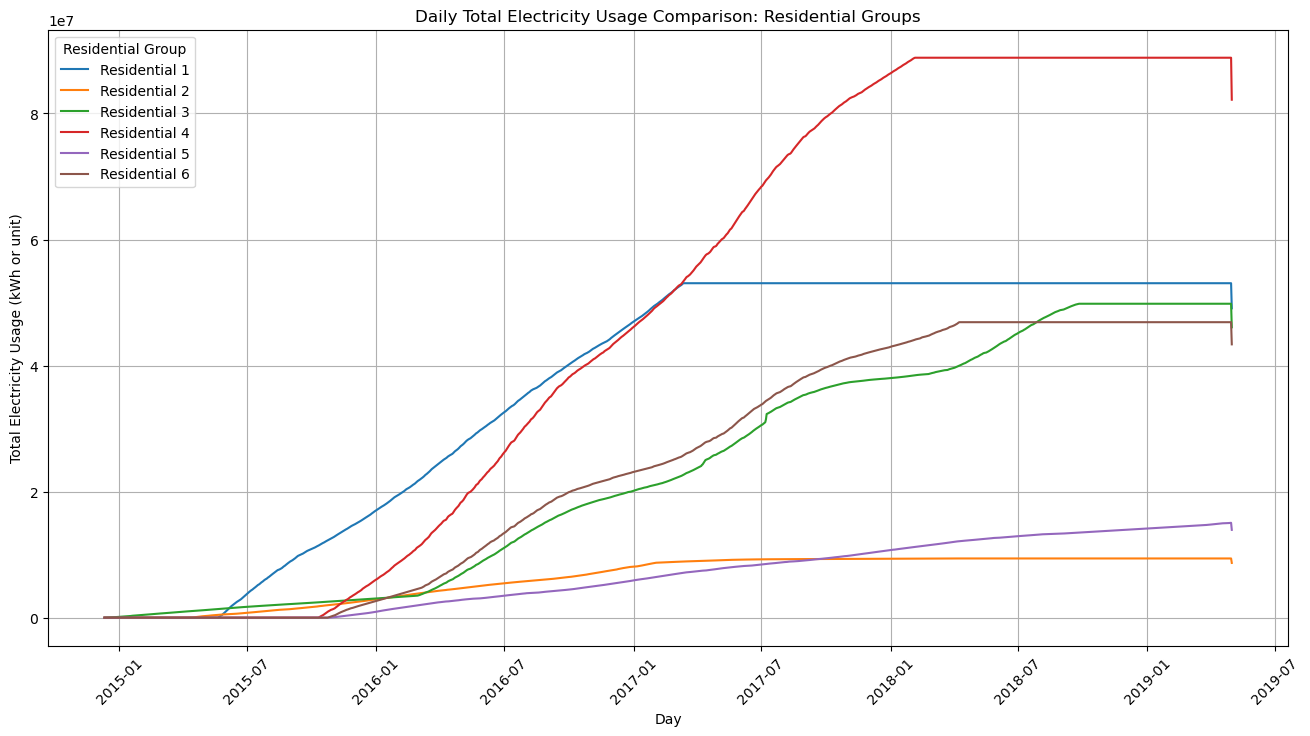

In [26]:
# --------------- Ensuring 'utc_timestamp' is datetime + add 'day' ---------------
for df in [residential1_df, residential2_df, residential3_df, residential4_df, residential5_df, residential6_df]:
    df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'], errors='coerce')
    df.dropna(subset=['utc_timestamp'], inplace=True)
    df['day'] = df['utc_timestamp'].dt.date

# --------------- Defining residential columns ---------------
residential1_cols = [col for col in residential1_df.columns if col.startswith('DE_KN_residential1')]
residential2_cols = [col for col in residential2_df.columns if col.startswith('DE_KN_residential2')]
residential3_cols = [col for col in residential3_df.columns if col.startswith('DE_KN_residential3')]
residential4_cols = [col for col in residential4_df.columns if col.startswith('DE_KN_residential4')]
residential5_cols = [col for col in residential5_df.columns if col.startswith('DE_KN_residential5')]
residential6_cols = [col for col in residential6_df.columns if col.startswith('DE_KN_residential6')]

# --------------- Calculating total usage per record ---------------
residential1_df['total_usage'] = residential1_df[residential1_cols].sum(axis=1)
residential2_df['total_usage'] = residential2_df[residential2_cols].sum(axis=1)
residential3_df['total_usage'] = residential3_df[residential3_cols].sum(axis=1)
residential4_df['total_usage'] = residential4_df[residential4_cols].sum(axis=1)
residential5_df['total_usage'] = residential5_df[residential5_cols].sum(axis=1)
residential6_df['total_usage'] = residential6_df[residential6_cols].sum(axis=1)

# --------------- Groupping by 'day' and sum total_usage ---------------
residential1_daily = residential1_df.groupby('day')['total_usage'].sum().reset_index().assign(group='Residential 1')
residential2_daily = residential2_df.groupby('day')['total_usage'].sum().reset_index().assign(group='Residential 2')
residential3_daily = residential3_df.groupby('day')['total_usage'].sum().reset_index().assign(group='Residential 3')
residential4_daily = residential4_df.groupby('day')['total_usage'].sum().reset_index().assign(group='Residential 4')
residential5_daily = residential5_df.groupby('day')['total_usage'].sum().reset_index().assign(group='Residential 5')
residential6_daily = residential6_df.groupby('day')['total_usage'].sum().reset_index().assign(group='Residential 6')

# --------------- Combining all into a single DataFrame ---------------
daily_usage_residential = pd.concat([
    residential1_daily,
    residential2_daily,
    residential3_daily,
    residential4_daily,
    residential5_daily,
    residential6_daily
])

# --------------- Plotting ---------------
plt.figure(figsize=(16,8))
sns.lineplot(data=daily_usage_residential, x='day', y='total_usage', hue='group')
plt.title('Daily Total Electricity Usage Comparison: Residential Groups')
plt.xlabel('Day')
plt.ylabel('Total Electricity Usage (kWh or unit)')
plt.xticks(rotation=45)
plt.legend(title='Residential Group')
plt.grid(True)

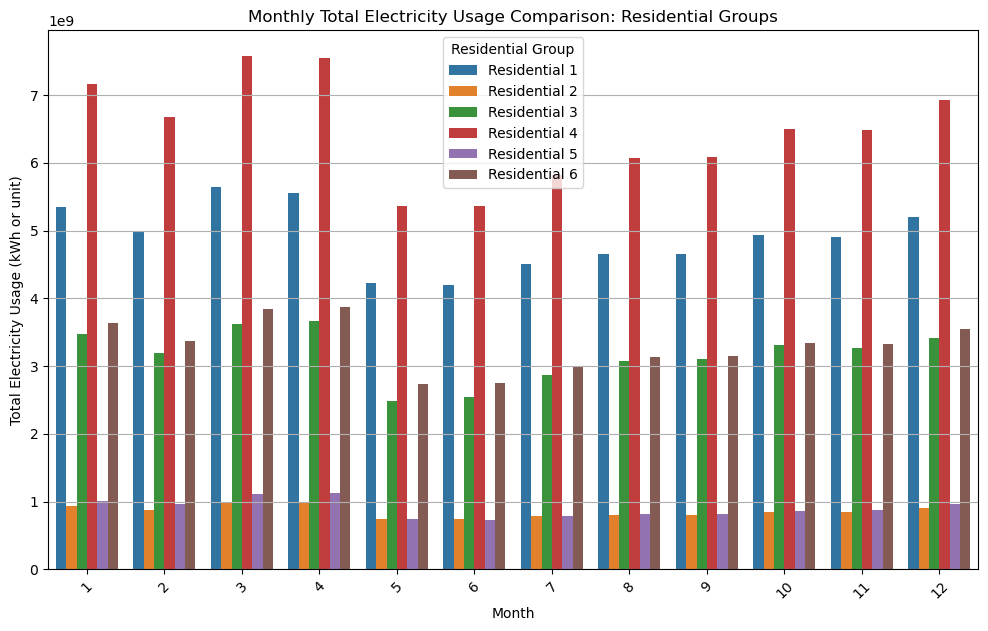

In [27]:
# -------- Ensuring 'utc_timestamp' is datetime + add 'month' --------

pd.options.mode.chained_assignment = None

for df in [residential1_df, residential2_df, residential3_df, residential4_df, residential5_df, residential6_df]:
    df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'], errors='coerce')
    df.dropna(subset=['utc_timestamp'], inplace=True)
    df['month'] = df['utc_timestamp'].dt.month

# -------- Defining residential columns --------
residential1_cols = [col for col in residential1_df.columns if col.startswith('DE_KN_residential1')]
residential2_cols = [col for col in residential2_df.columns if col.startswith('DE_KN_residential2')]
residential3_cols = [col for col in residential3_df.columns if col.startswith('DE_KN_residential3')]
residential4_cols = [col for col in residential4_df.columns if col.startswith('DE_KN_residential4')]
residential5_cols = [col for col in residential5_df.columns if col.startswith('DE_KN_residential5')]
residential6_cols = [col for col in residential6_df.columns if col.startswith('DE_KN_residential6')]

# -------- Totaling Using per Record --------
residential1_df['total_usage'] = residential1_df[residential1_cols].sum(axis=1)
residential2_df['total_usage'] = residential2_df[residential2_cols].sum(axis=1)
residential3_df['total_usage'] = residential3_df[residential3_cols].sum(axis=1)
residential4_df['total_usage'] = residential4_df[residential4_cols].sum(axis=1)
residential5_df['total_usage'] = residential5_df[residential5_cols].sum(axis=1)
residential6_df['total_usage'] = residential6_df[residential6_cols].sum(axis=1)

# -------- Grouping by 'month' and sum total_usage --------
residential1_monthly = residential1_df.groupby('month')['total_usage'].sum().reset_index().assign(group='Residential 1')
residential2_monthly = residential2_df.groupby('month')['total_usage'].sum().reset_index().assign(group='Residential 2')
residential3_monthly = residential3_df.groupby('month')['total_usage'].sum().reset_index().assign(group='Residential 3')
residential4_monthly = residential4_df.groupby('month')['total_usage'].sum().reset_index().assign(group='Residential 4')
residential5_monthly = residential5_df.groupby('month')['total_usage'].sum().reset_index().assign(group='Residential 5')
residential6_monthly = residential6_df.groupby('month')['total_usage'].sum().reset_index().assign(group='Residential 6')

# -------- Combining all into a single DataFrame --------
monthly_usage_residential = pd.concat([
    residential1_monthly, 
    residential2_monthly, 
    residential3_monthly, 
    residential4_monthly, 
    residential5_monthly, 
    residential6_monthly
])

# -------- Plotting --------
plt.figure(figsize=(12,7))
sns.barplot(data=monthly_usage_residential, x='month', y='total_usage', hue='group')
plt.title('Monthly Total Electricity Usage Comparison: Residential Groups')
plt.xlabel('Month')
plt.ylabel('Total Electricity Usage (kWh or unit)')
plt.legend(title='Residential Group')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


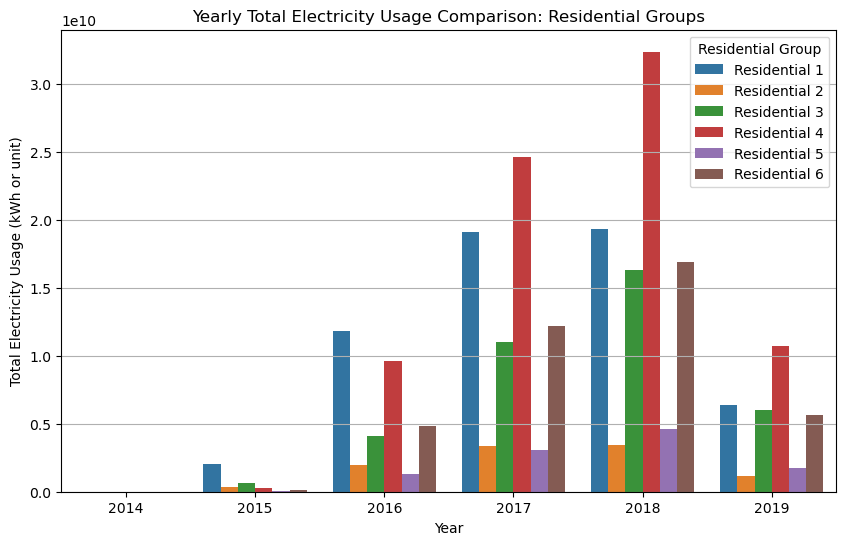

In [28]:
# -------- Adding 'year' column from timestamp --------
residential1_df.loc[:, 'year'] = residential1_df['utc_timestamp'].dt.year
residential2_df.loc[:, 'year'] = residential2_df['utc_timestamp'].dt.year
residential3_df.loc[:, 'year'] = residential3_df['utc_timestamp'].dt.year
residential4_df.loc[:, 'year'] = residential4_df['utc_timestamp'].dt.year
residential5_df.loc[:, 'year'] = residential5_df['utc_timestamp'].dt.year
residential6_df.loc[:, 'year'] = residential6_df['utc_timestamp'].dt.year

# -------- Grouping by 'year' and sum total_usage --------
residential1_yearly = residential1_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 1')
residential2_yearly = residential2_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 2')
residential3_yearly = residential3_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 3')
residential4_yearly = residential4_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 4')
residential5_yearly = residential5_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 5')
residential6_yearly = residential6_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 6')

# -------- Combining all into a single DataFrame --------
yearly_usage_residential = pd.concat([
    residential1_yearly,
    residential2_yearly,
    residential3_yearly,
    residential4_yearly,
    residential5_yearly,
    residential6_yearly
])

# -------- Plotting --------
plt.figure(figsize=(10,6))
sns.barplot(data=yearly_usage_residential, x='year', y='total_usage', hue='group')
plt.title('Yearly Total Electricity Usage Comparison: Residential Groups')
plt.xlabel('Year')
plt.ylabel('Total Electricity Usage (kWh or unit)')
plt.legend(title='Residential Group')
plt.grid(axis='y')
plt.show()


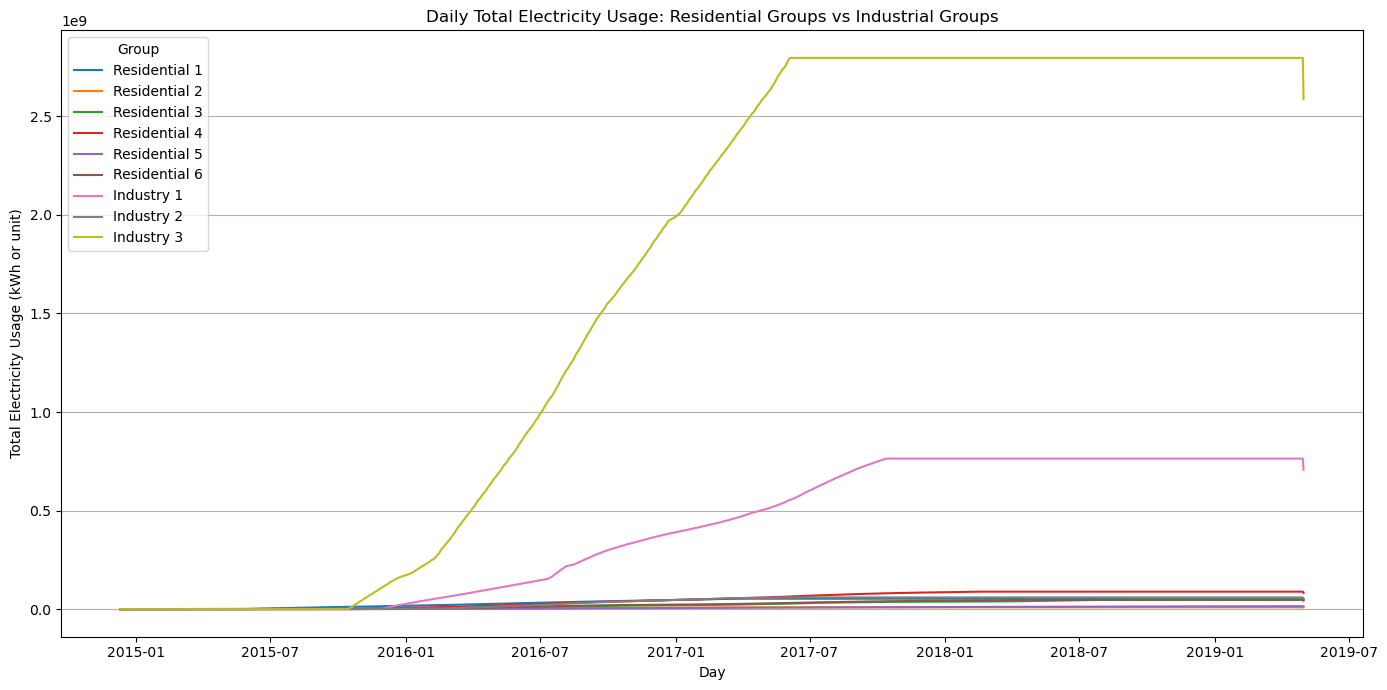

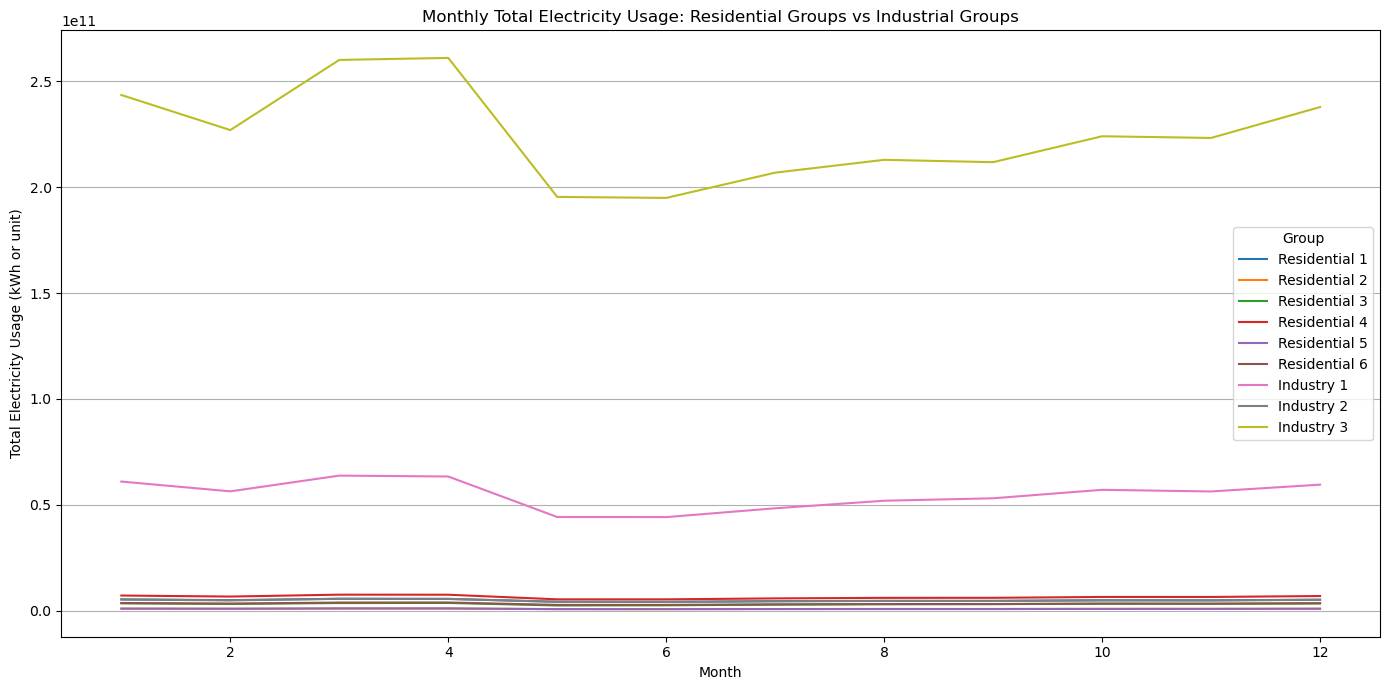

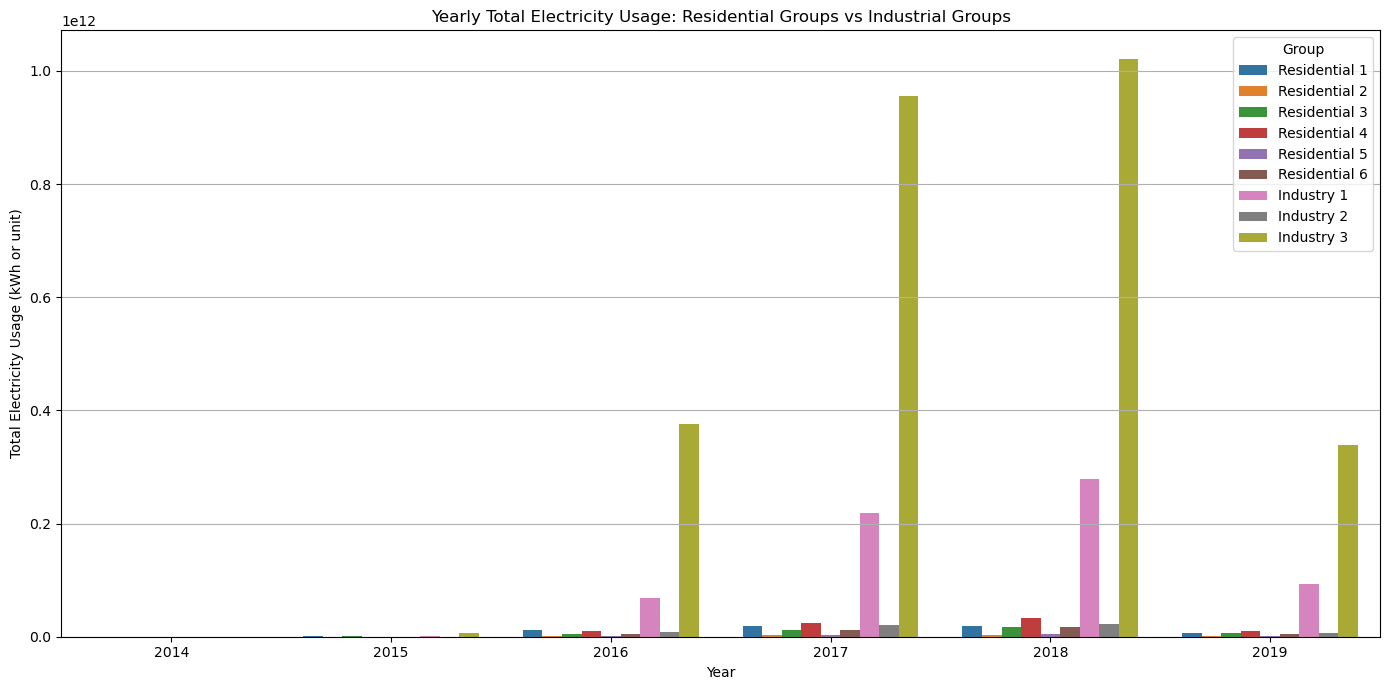

In [29]:
# -------- Adding 'year', 'month', and 'day' columns from timestamp --------
for df in [residential1_df, residential2_df, residential3_df, residential4_df, residential5_df, residential6_df]:
    df['year'] = df['utc_timestamp'].dt.year
    df['month'] = df['utc_timestamp'].dt.month
    df['day'] = df['utc_timestamp'].dt.date

for df in [industrial1_df, industrial2_df, industrial3_df]:
    df['year'] = df['utc_timestamp'].dt.year
    df['month'] = df['utc_timestamp'].dt.month
    df['day'] = df['utc_timestamp'].dt.date

# -------- Groupping by 'day', 'month', and 'year' and sum total_usage --------

# Residential groups
res1_daily = residential1_df.groupby('day')['total_usage'].sum().reset_index().assign(group='Residential 1')
res2_daily = residential2_df.groupby('day')['total_usage'].sum().reset_index().assign(group='Residential 2')
res3_daily = residential3_df.groupby('day')['total_usage'].sum().reset_index().assign(group='Residential 3')
res4_daily = residential4_df.groupby('day')['total_usage'].sum().reset_index().assign(group='Residential 4')
res5_daily = residential5_df.groupby('day')['total_usage'].sum().reset_index().assign(group='Residential 5')
res6_daily = residential6_df.groupby('day')['total_usage'].sum().reset_index().assign(group='Residential 6')

# Monthly usage
res1_monthly = residential1_df.groupby('month')['total_usage'].sum().reset_index().assign(group='Residential 1')
res2_monthly = residential2_df.groupby('month')['total_usage'].sum().reset_index().assign(group='Residential 2')
res3_monthly = residential3_df.groupby('month')['total_usage'].sum().reset_index().assign(group='Residential 3')
res4_monthly = residential4_df.groupby('month')['total_usage'].sum().reset_index().assign(group='Residential 4')
res5_monthly = residential5_df.groupby('month')['total_usage'].sum().reset_index().assign(group='Residential 5')
res6_monthly = residential6_df.groupby('month')['total_usage'].sum().reset_index().assign(group='Residential 6')

# Yearly usage
res1_yearly = residential1_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 1')
res2_yearly = residential2_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 2')
res3_yearly = residential3_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 3')
res4_yearly = residential4_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 4')
res5_yearly = residential5_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 5')
res6_yearly = residential6_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 6')

# Industrial groups
ind1_daily = industrial1_df.groupby('day')['total_usage'].sum().reset_index().assign(group='Industry 1')
ind2_daily = industrial2_df.groupby('day')['total_usage'].sum().reset_index().assign(group='Industry 2')
ind3_daily = industrial3_df.groupby('day')['total_usage'].sum().reset_index().assign(group='Industry 3')

# Monthly usage
ind1_monthly = industrial1_df.groupby('month')['total_usage'].sum().reset_index().assign(group='Industry 1')
ind2_monthly = industrial2_df.groupby('month')['total_usage'].sum().reset_index().assign(group='Industry 2')
ind3_monthly = industrial3_df.groupby('month')['total_usage'].sum().reset_index().assign(group='Industry 3')

# Yearly usage
ind1_yearly = industrial1_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Industry 1')
ind2_yearly = industrial2_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Industry 2')
ind3_yearly = industrial3_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Industry 3')

# -------- Combining all into a single DataFrame --------
all_daily_usage = pd.concat([
    res1_daily, res2_daily, res3_daily, res4_daily, res5_daily, res6_daily,
    ind1_daily, ind2_daily, ind3_daily
])

all_monthly_usage = pd.concat([
    res1_monthly, res2_monthly, res3_monthly, res4_monthly, res5_monthly, res6_monthly,
    ind1_monthly, ind2_monthly, ind3_monthly
])

all_yearly_usage = pd.concat([
    res1_yearly, res2_yearly, res3_yearly, res4_yearly, res5_yearly, res6_yearly,
    ind1_yearly, ind2_yearly, ind3_yearly
])

# -------- Plotting Daily Usage --------
plt.figure(figsize=(14,7))
sns.lineplot(data=all_daily_usage, x='day', y='total_usage', hue='group')
plt.title('Daily Total Electricity Usage: Residential Groups vs Industrial Groups')
plt.xlabel('Day')
plt.ylabel('Total Electricity Usage (kWh or unit)')
plt.legend(title='Group')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# -------- Plotting Monthly Usage --------
plt.figure(figsize=(14,7))
sns.lineplot(data=all_monthly_usage, x='month', y='total_usage', hue='group')
plt.title('Monthly Total Electricity Usage: Residential Groups vs Industrial Groups')
plt.xlabel('Month')
plt.ylabel('Total Electricity Usage (kWh or unit)')
plt.legend(title='Group')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# -------- Plotting Yearly Usage --------
plt.figure(figsize=(14,7))
sns.barplot(data=all_yearly_usage, x='year', y='total_usage', hue='group')
plt.title('Yearly Total Electricity Usage: Residential Groups vs Industrial Groups')
plt.xlabel('Year')
plt.ylabel('Total Electricity Usage (kWh or unit)')
plt.legend(title='Group')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


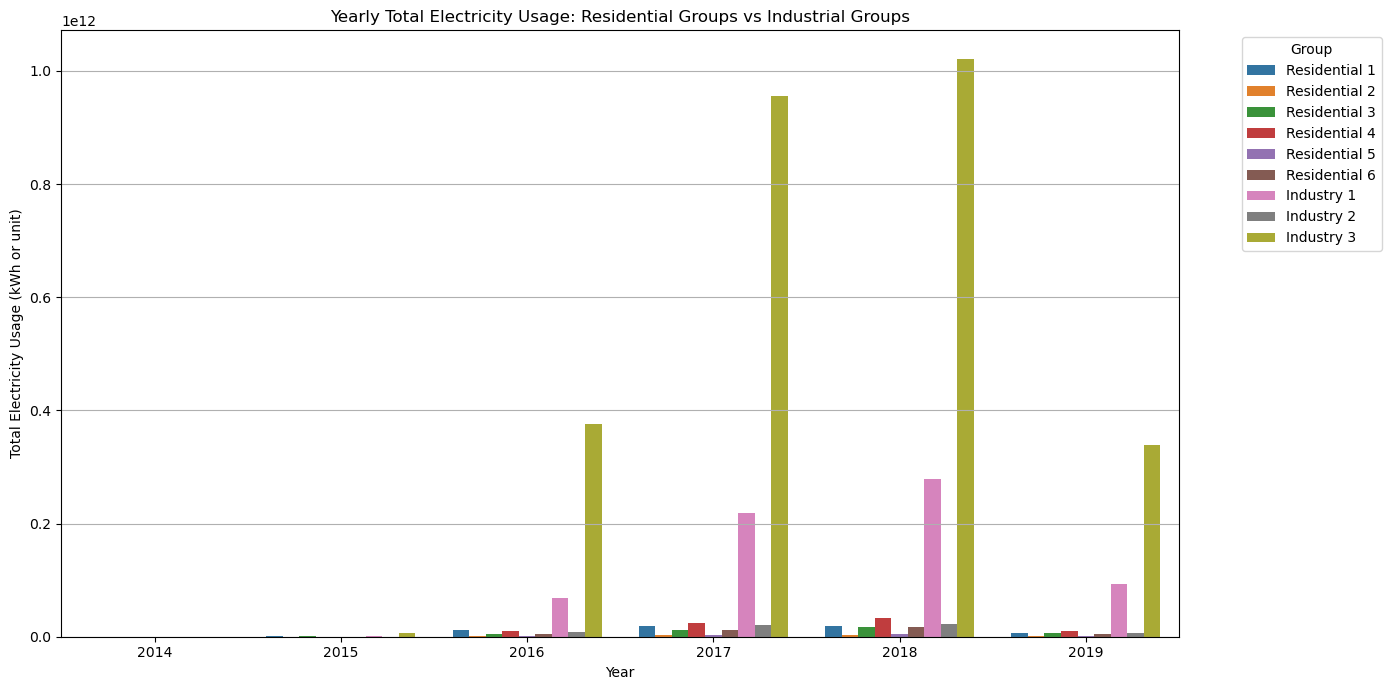

In [30]:
# -------- Adding 'year' column from timestamp --------
for df in [residential1_df, residential2_df, residential3_df, residential4_df, residential5_df, residential6_df]:
    df.loc[:, 'year'] = df['utc_timestamp'].dt.year

for df in [industrial1_df, industrial2_df, industrial3_df]:
    df.loc[:, 'year'] = df['utc_timestamp'].dt.year

# -------- Groupping by 'year' and sum total_usage --------
# Residential groups
res1_yearly = residential1_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 1')
res2_yearly = residential2_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 2')
res3_yearly = residential3_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 3')
res4_yearly = residential4_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 4')
res5_yearly = residential5_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 5')
res6_yearly = residential6_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Residential 6')

# Industrial groups
ind1_yearly = industrial1_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Industry 1')
ind2_yearly = industrial2_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Industry 2')
ind3_yearly = industrial3_df.groupby('year')['total_usage'].sum().reset_index().assign(group='Industry 3')

# -------- Combining all into a single DataFrame --------
all_yearly_usage = pd.concat([
    res1_yearly, res2_yearly, res3_yearly, res4_yearly, res5_yearly, res6_yearly,
    ind1_yearly, ind2_yearly, ind3_yearly
])

# -------- Plotting --------
plt.figure(figsize=(14,7))
sns.barplot(data=all_yearly_usage, x='year', y='total_usage', hue='group')
plt.title('Yearly Total Electricity Usage: Residential Groups vs Industrial Groups')
plt.xlabel('Year')
plt.ylabel('Total Electricity Usage (kWh or unit)')
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [17]:
##model train 
# Example features & target
features = df1.drop(columns=['utc_timestamp', 'cet_cest_timestamp', 'DE_KN_residential1_grid_import'])
target = df1['DE_KN_residential1_grid_import']

# Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'MAE: {mae}, R2 Score: {r2}')

MAE: 0.0017820872865143072, R2 Score: 0.999999999991761


In [23]:
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MAE: 0.0017820872865143072
MSE: 9.968498393880664e-05
RMSE: 0.009984236772974019
R2 Score: 0.999999999991761


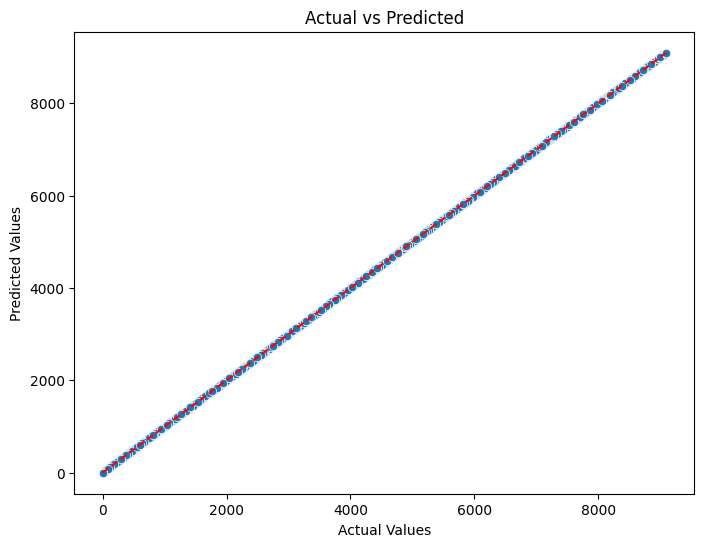

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()

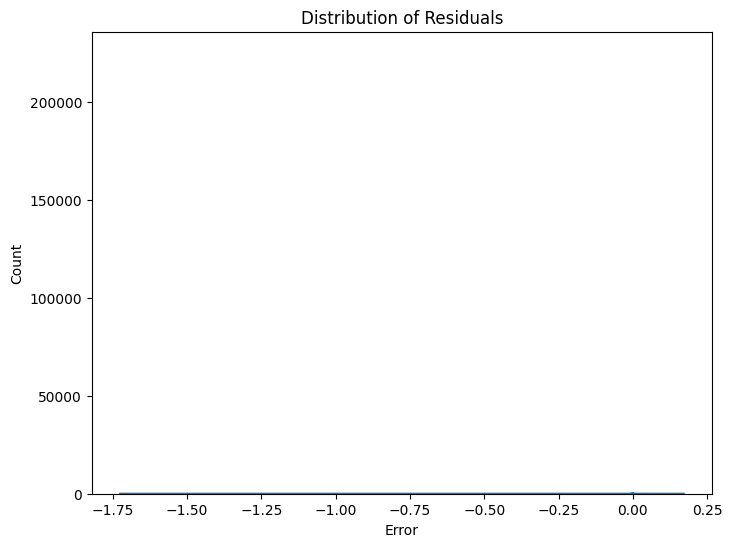

In [27]:
residuals = y_test - predictions

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Error')
plt.show()

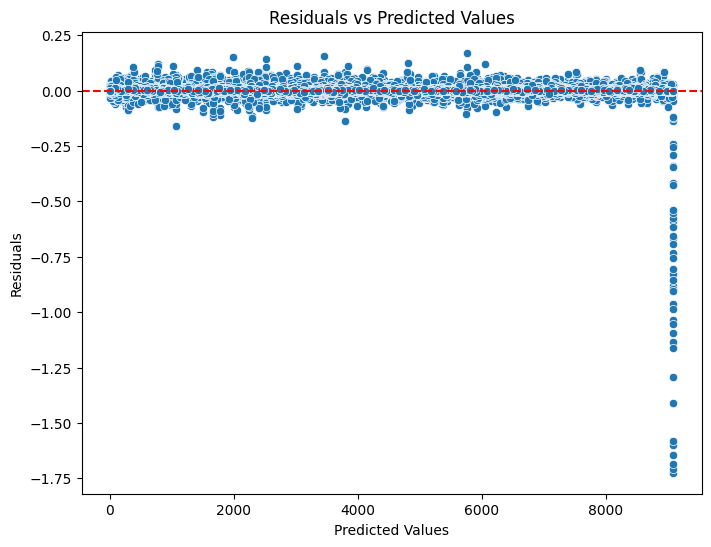

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()